# Credit Card EDA Case Study


## Our Approach for this EDA Case Study :-
- Importing importanat libraries
- Reading application dataset
- Data Understanding and its description
- Missing value analysis and its treatment accordingly
- Correlation matrix and heatmap
- Target variable analysis with other variables
- Univariate Analysis
- Analysing numerical columns
- Outliers detection 
- Bivariate analysis
- Reading previous application dataset and its basic analysis
- Merging both dataset 
- Analysis of merged dataset and key inferences

## Importing Libraries for EDA

In [1]:
#Libraraies for numerical and dataframe operations
import pandas as pd
import numpy as np 

#Libraries for plotting
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

#Library for ignoring any warning in EDA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#For displaying all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Loading Application Dataset 

In [3]:
#we are defining "app" as our application dataset
app = pd.read_csv("//Users//abhisheksharma//Desktop//Credit Card EDA//application_data.csv")

app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
#Overview of all columns in application dataset
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

### Extracting info and data types of the application dataset

In [5]:
#info of all columns of application dataset
app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

There are 16 columns of 'object' datatype and 106 columns of 'float-int' datatype are present in application dataset

### Shape of the application dataset

In [6]:
#shape of the application dataset
app.shape

(307511, 122)

Application dataset contains 307511 rows and 122 columns

### Extracting Statistical Inferences about numeric columns

In [7]:
#Description of appplication dataset for 'float-int' data type columns
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### Extracting Statistical Inferences about non-numeric columns

In [8]:
#Description of appplication dataset for 'object' data type columns
app.describe(include='object') 

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

### Null count of each column in application dataset

In [9]:
#counting null values in each column of application dataset
app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Finding unique values in each column of application dataset

In [10]:
# Total no. of unique values in each column
app.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

## Identifying and handling missing values in application dataset

In [11]:
#listing missing values in percentage terms in each column in descending order

app_missing = app.count()/len(app)
app_missing = (1-app_missing)*100
app_missing.sort_values(ascending=False).head(122)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

##### We observe that 49 columns are there, which have more than 35% missing values.

In [12]:
#Extracting all columns of float-int type
numeric_features = app.select_dtypes(include=[np.number])
numeric_features.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [13]:
#Shape of numeric_features dataset
numeric_features.shape

(307511, 106)

So, There are 106 columns which have numeric data.

In [14]:
#Extracting all columns of object type
non_numeric_features = app.select_dtypes(include='object')
non_numeric_features.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [15]:
#Shape of non_numeric_features dataset
non_numeric_features.shape

(307511, 16)

So, There are 16 columns which have non-numeric data.

## Correlation among the Variables of application Dataset

In [16]:
#correlation matrix
corrval = app.corr() #or you can use corrval = numeric_features.corr() 
                     #since correlation is performed on numeric columns

corrval


SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000 -0.002108     -0.001129   
TARGET                         -0.002108  1.000000      0.019187   
CNT_CHILDREN                   -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL               -0.001820 -0.003982      0.012882   
AMT_CREDIT                     -0.000343 -0.030369      0.002145   
AMT_ANNUITY                    -0.000433 -0.012817      0.021374   
AMT_GOODS_PRICE                -0.000232 -0.039645     -0.001827   
REGION_POPULATION_RELATIVE      0.000849 -0.037227     -0.025573   
DAYS_BIRTH                     -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                   0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION              -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH                -0.000384  0.051457     -0.028019   
OWN_CAR_AGE                     0.001818  0.037612      0.008494   
FLAG_MOBIL                      0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                 -0.001337  0.045982      0.240714   
FLAG_WORK_PHONE                -0.000415  0.028524      0.055630   
FLAG_CONT_MOBILE                0.002815  0.000370     -0.000794   
FLAG_PHONE                      0.002753 -0.023806     -0.029906   
FLAG_EMAIL                      0.000281 -0.001758      0.022619   
CNT_FAM_MEMBERS                -0.002895  0.009308      0.879161   
REGION_RATING_CLIENT           -0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY    -0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START         0.000350 -0.024166     -0.007292   
REG_REGION_NOT_LIVE_REGION     -0.000283  0.005576     -0.013319   
REG_REGION_NOT_WORK_REGION      0.001097  0.006942      0.008185   
LIVE_REGION_NOT_WORK_REGION     0.002903  0.002819      0.014835   
REG_CITY_NOT_LIVE_CITY         -0.001885  0.044395      0.020072   
REG_CITY_NOT_WORK_CITY         -0.001582  0.050994      0.070650   
LIVE_CITY_NOT_WORK_CITY         0.000067  0.032518      0.069957   
EXT_SOURCE_1                    0.000082 -0.155317     -0.138470   
EXT_SOURCE_2                    0.002342 -0.160472     -0.018015   
EXT_SOURCE_3                    0.000222 -0.178919     -0.042710   
APARTMENTS_AVG                  0.001556 -0.029498     -0.013222   
BASEMENTAREA_AVG               -0.002070 -0.022746     -0.008464   
YEARS_BEGINEXPLUATATION_AVG     0.001551 -0.009728      0.006902   
YEARS_BUILD_AVG                 0.005900 -0.022149      0.030172   
COMMONAREA_AVG                 -0.001463 -0.018550      0.000140   
ELEVATORS_AVG                   0.004862 -0.034199     -0.007060   
ENTRANCES_AVG                  -0.002879 -0.019172     -0.008341   
FLOORSMAX_AVG                   0.004851 -0.044003     -0.009705   
FLOORSMIN_AVG                   0.003083 -0.033614     -0.008753   
LANDAREA_AVG                    0.001465 -0.010885     -0.003121   
LIVINGAPARTMENTS_AVG            0.003119 -0.025031     -0.008648   
LIVINGAREA_AVG                  0.001770 -0.032997     -0.010116   
NONLIVINGAPARTMENTS_AVG        -0.002575 -0.003176      0.004051   
NONLIVINGAREA_AVG               0.003042 -0.013578      0.000028   
APARTMENTS_MODE                 0.001961 -0.027284     -0.012105   
BASEMENTAREA_MODE              -0.001411 -0.019952     -0.008513   
YEARS_BEGINEXPLUATATION_MODE    0.001890 -0.009036      0.006199   
YEARS_BUILD_MODE                0.005245 -0.022068      0.029549   
COMMONAREA_MODE                -0.001058 -0.016340      0.000440   
ELEVATORS_MODE                  0.005017 -0.032131     -0.006397   
ENTRANCES_MODE                 -0.002844 -0.017387     -0.006880   
FLOORSMAX_MODE                  0.004386 -0.043226     -0.009550   
FLOORSMIN_MODE                  0.002081 -0.032698     -0.008044   
LANDAREA_MODE                   0.001548 -0.010174     -0.002212   
LIVINGAPARTMENTS_MODE           0.003589 -0.023393     -0.007955   
LIVINGAREA_MODE                 0.002156 -0.030685     -0.009517   
NONLIVINGAPARTMENT

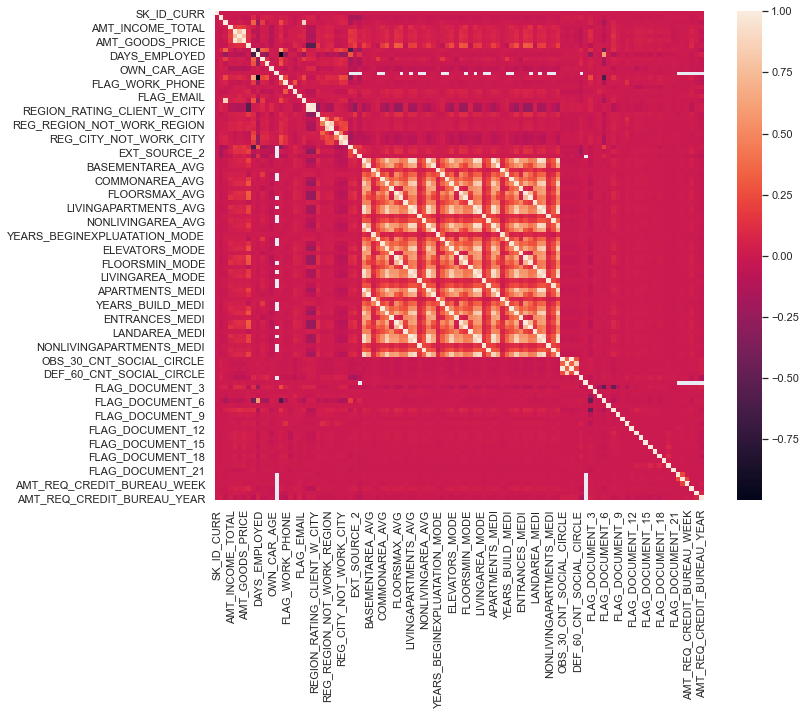

In [17]:
#correlation plot
visual = plt.figure(figsize = (12,9))
sns.heatmap(corrval, vmax=1, square=True)
plt.show()

#### After analysis of correlation matrix, we found that columns which have more than 35% missing values are not highly correlated with our Target variable so we can directly drop them as per our findings -
1) >35% missing values 
2) Very low correlation with Target Variable. 

So, we will form new dataset "treat" after dropping these columns and from here on we will perform all EDA on "treat" dataset only.

## Forming new dataset "treat" after dropping columns having more than 35% missing values

In [18]:
treat = app.loc[:, app_missing<35]

treat.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [19]:
#shape of treat dataset
treat.shape

(307511, 73)

After dropping columns, our treat dataset has 73 columns now

## Missing value treatment

We observe that there are lot of columns with missing values. There are some columns which has missing values around or more than 35%. Other columns has significantly less missing value. Also, the columns for which has missing values are around or more than 35% are mostly either mean, median or mode. So, there is no way one can replace these missing data. So, we will not consider these columns for analysis. We will consider other columns for analysis. Let's analyse the other columns. 

Since, we have already made new dataset after dropping columns which have more than 35% missing values. So, now our task is to treat missing values in this new dataset. For which we will treat those columns only for which missing values are >1% but <35%.

We will leave the null values in other columns unchanged as they are relatively small in percentage (<1%). If we did have to deal with them, we could impute the numerical columns with median and categorical with mode.


In [20]:
#Extracting columns having more than 1% missing values
100*treat.isnull().mean()[100*treat.isnull().mean() > 1]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

Missing values can be dealt in multiple ways - Imputation, deletion, prediction, or leaving them as it is.
Each of them have their pros and cons. We shall why we would choose one method over the other in our coming codes. 

### Column: OCCUPATION_TYPE

As we see, OCCUPATION_TYPE column has 31% missing data, which is also a huge number. So, it would be approprite to remove this column, but if we go through this column, this seems to look important. So, we will use this column.

In [21]:
treat['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

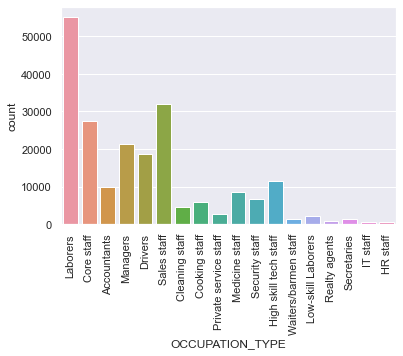

In [22]:
#countplot of OCCUPATION_TYPE column
sns.countplot(x= 'OCCUPATION_TYPE', data = treat)
plt.xticks(rotation=90)
plt.show()

##### Insight :-
As we see that this column has considerable perentage of missing values, that is 31%. Since it is a categorrical column, we can only replace it with mode value. But, replacing all of these 31% missing values with "Laborers" class will not be fair. So, we will leave it as it is and will not do any missing value treatment here. 

### Column: EXT_SOURCE_3

In [23]:
treat['EXT_SOURCE_3'].head(20)

0     0.139376
1          NaN
2     0.729567
3          NaN
4          NaN
5     0.621226
6     0.492060
7     0.540654
8     0.751724
9          NaN
10    0.363945
11    0.652897
12    0.176653
13    0.770087
14         NaN
15    0.678568
16    0.062103
17         NaN
18    0.556727
19    0.477649
Name: EXT_SOURCE_3, dtype: float64

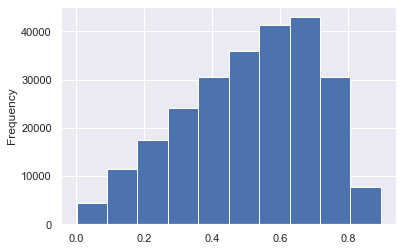

In [24]:
# Plotting the distribution plot for EXT_SOURCE_3
treat['EXT_SOURCE_3'].plot.hist()
plt.show()

In [25]:
#Mean of EXT_SOURCE_3
treat['EXT_SOURCE_3'].mean()

0.5108529061800121

In [26]:
#Mode of EXT_SOURCE_3
treat['EXT_SOURCE_3'].mode()

0    0.7463
dtype: float64

##### Insight  :-
This data is a skewed normal distribution. This column has considerable perentage of missing values, that is 19%. Since it is a numeric column, we can replace it with mean or median value. But, replacing all of these 19% missing values with a fixed rating may impact our inference as we have seen EXT_SOURCE ratings are highly negatively correlated with our target feature and thus an important variable to analyse. So, we will leave it as it is and will not do any missing value treatment here.


### Column: AMT_REQ_CREDIT_BUREAU_HOUR, DAY, WEEK, MON, QRT, YEAR

AMT_REQ_CREDIT_BUREAU_HOUR
0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


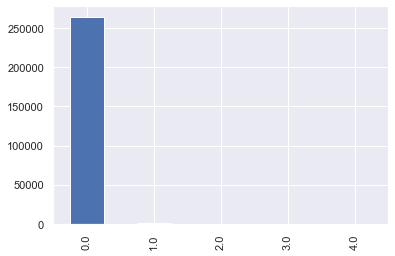

value counts : 0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
Mean : 0.006402448193930645
Mode : 0    0.0
dtype: float64
******************************************************************
AMT_REQ_CREDIT_BUREAU_DAY
0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


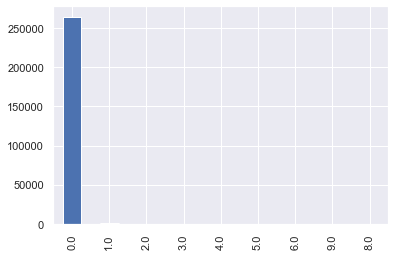

value counts : 0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
Mean : 0.0070002105326475985
Mode : 0    0.0
dtype: float64
******************************************************************
AMT_REQ_CREDIT_BUREAU_WEEK
0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


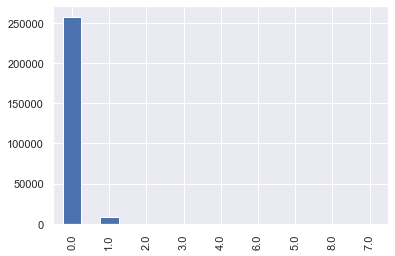

value counts : 0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
Mean : 0.0343619356973142
Mode : 0    0.0
dtype: float64
******************************************************************
AMT_REQ_CREDIT_BUREAU_MON
0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


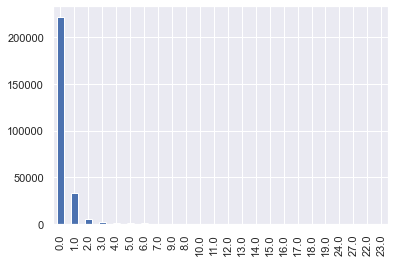

value counts : 0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
Mean : 0.26739526000781977
Mode : 0    0.0
dtype: float64
******************************************************************
AMT_REQ_CREDIT_BUREAU_QRT
0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    1.0
6    1.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


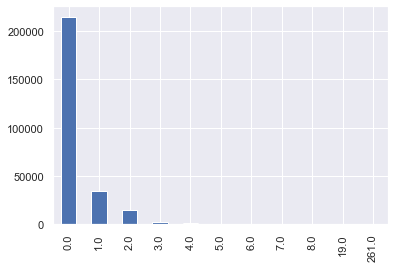

value counts : 0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64
Mean : 0.26547414959848414
Mode : 0    0.0
dtype: float64
******************************************************************
AMT_REQ_CREDIT_BUREAU_YEAR
0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
5    1.0
6    2.0
7    0.0
8    1.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


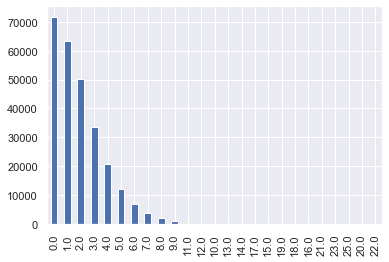

value counts : 0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64
Mean : 1.899974435321363
Mode : 0    0.0
dtype: float64
******************************************************************


In [27]:
#Plotting countplot for above columns and finding their mean & mode

for i in ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']:
    print(i)
    print(treat[i].head(10))
    treat[i].value_counts().plot.bar()
    plt.show()
    print("value counts :", treat[i].value_counts())
    print("Mean :", treat[i].mean())
    print("Mode :", treat[i].mode())
    print("******************************************************************")
    

#### Insight :-
These columns have discrete values ranging from 0-261 in some cases. However, in every column 0 is most common value, which means no enquiries were made to the CREDIT_BUREAU. Hence, we can impute the null values with mode/median. Mean will give us a decimal, so imputing with mean is ruled out. Also, these columns show no variation so we can ignore them also in our further analysis. 

##### Since, mode values in all above columns is 0. So, we will impute missing values in these columns with 0.

In [28]:
#Filling missing values in above columns with 0
for i in ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']:
    treat[i] = treat[i].fillna(value =0)

In [29]:
#checking missing values again
100*treat.isnull().sum()/len(treat.isnull())

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

##### Now, only EXT_SOURCE_3 and OCCUPATION_TYPE have missing values greater than 0.5%. Rest coulmns are okay

In [30]:
#columns of treat dataset
treat.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'D

### Column: DAYS_BIRTH, EMPLOYED, REGISTRATION, ID_PUBLISH


This column has represents the clients birth in number of days relative to the application. So, we are converting into year for conciseness and better understanding. As the days are given as negative values, we have used -round() to convert it into positive values. We will do the same transformation for other dates. 

In [31]:
#Changing days to years
for i in ['DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']:
    print(treat[i].head())
    treat[i] = -round(treat[i]/365, 0)
    print(treat[i].head())
    print("******************************************************************")

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64
0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64
******************************************************************
0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64
0    2.0
1    3.0
2    1.0
3    8.0
4    8.0
Name: DAYS_EMPLOYED, dtype: float64
******************************************************************
0   -3648.0
1   -1186.0
2   -4260.0
3   -9833.0
4   -4311.0
Name: DAYS_REGISTRATION, dtype: float64
0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64
******************************************************************
0   -2120
1    -291
2   -2531
3   -2437
4   -3458
Name: DAYS_ID_PUBLISH, dtype: int64
0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64
******************************************************************


### Column: ORGANIZATION_TYPE


In [32]:
#value count of ORGANIZATION_TYPE
treat.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

There are 55000 XNA values in Organisation type. XNA implies not available. We must not impute or delete these values as it might result in loss of massive information. So we leave them as it is. 

### Box plot for DAYS_BIRTH, EMPLOYED, REGISTRATION, ID_PUBLISH for any outlier

DAYS_BIRTH


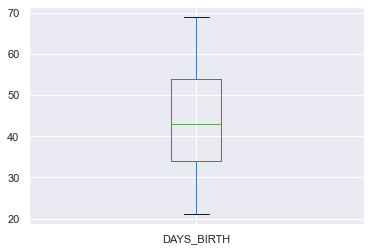

******************************************************************
DAYS_EMPLOYED


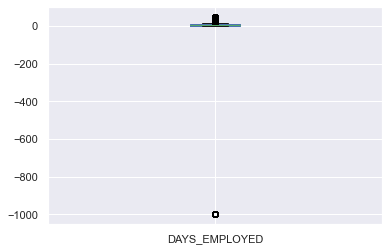

******************************************************************
DAYS_REGISTRATION


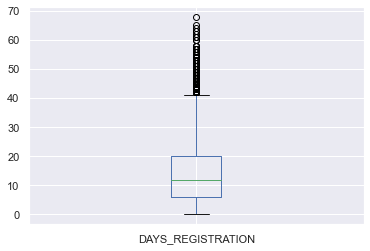

******************************************************************
DAYS_ID_PUBLISH


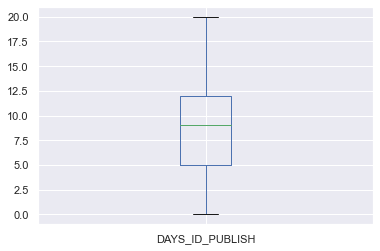

******************************************************************


In [33]:
for i in ['DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']:
    print(i)
    treat[i].plot.box()
    plt.show()
    print("******************************************************************")


#### Insight : 
DAYS_EMPLOYED has a big outlier corresponding to -1000 years. In fact there are 55000 such rows with -1000 as their value. This may be a systematic data entry error or an indication to show the value is missing. 

In [34]:
# We can replace these values with NA

treat.DAYS_EMPLOYED = treat.DAYS_EMPLOYED.replace(-1001.0, np.nan)

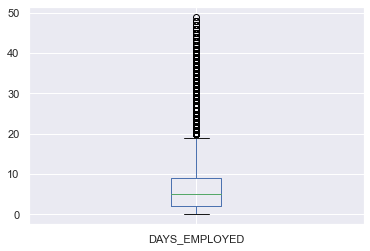

In [35]:
#plotting DAYS_EMPLOYED box plot again after treating outlier
treat['DAYS_EMPLOYED'].plot.box()

### Target

#### Total users

In [36]:
treat['TARGET'].count()

307511

#### Client with payment difficulties

In [37]:
(treat['TARGET']==1).sum()

24825

#### Other clients


In [38]:
(treat['TARGET']==0).sum()

282686

#### Ratio
Too much data imbalance

In [39]:
(treat['TARGET']==0).sum()/(treat['TARGET']==1).sum()

11.387150050352467

In [40]:
#Value count of Target in terms of percentage
100*treat['TARGET'].value_counts(normalize = True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

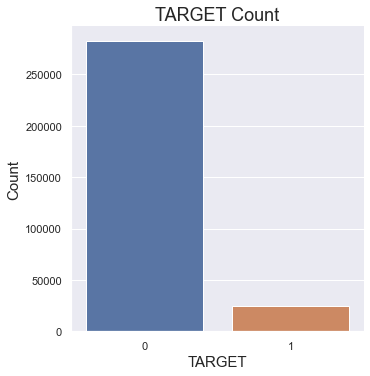

In [41]:
#Factor plot of Target Count
sns.factorplot(x ="TARGET",kind='count',data=treat,size=5)
plt.title("TARGET Count", fontsize=18)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [42]:
#columns of object type
treat.select_dtypes("object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [43]:
#columns of int type
treat.select_dtypes("int").columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [44]:
#columns of float type
treat.select_dtypes("float").columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [45]:
# These columns have discrete values so we can convert them into Int type from float
change = ["CNT_FAM_MEMBERS",'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [46]:
for i in change:
    treat[i] = treat[i].astype(int, errors = "ignore")

## Derived Important Metrics

#### Column : REGION_POPULATION_RELATIVE -> POPULATION_OF_REGION

In [47]:
#Statistical inferences for bucketing
print(treat.REGION_POPULATION_RELATIVE.describe())

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


In [48]:
# Population density buckets 

treat.loc[:,'POPULATION_OF_REGION'] = pd.qcut(treat.loc[:,'REGION_POPULATION_RELATIVE'],q=[0,0.25,0.75,1],
labels=['Low','Medium','High'])

treat.POPULATION_OF_REGION.head()


0    Medium
1       Low
2    Medium
3       Low
4    Medium
Name: POPULATION_OF_REGION, dtype: category
Categories (3, object): [Low < Medium < High]

In [49]:
#Statistical inferences of POPULATION_OF_REGION
treat.POPULATION_OF_REGION.describe()


count     307511
unique         3
top       Medium
freq      161005
Name: POPULATION_OF_REGION, dtype: object

#### Column : AMT_ANNUITY and AMT_INCOME_TOTAL -> ANNUITY_TO_INCOME


In [50]:
# ANNUITY TO INCOME RATIO

treat.loc[:,'ANNUITY_TO_INCOME'] = treat.AMT_ANNUITY/treat.AMT_INCOME_TOTAL 

treat.ANNUITY_TO_INCOME.head()

0    0.121978
1    0.132217
2    0.100000
3    0.219900
4    0.179963
Name: ANNUITY_TO_INCOME, dtype: float64

In [51]:
#Statistical inferences of ANNUITY_TO_INCOME
treat.ANNUITY_TO_INCOME.describe()

count    307499.000000
mean          0.180930
std           0.094574
min           0.000224
25%           0.114782
50%           0.162833
75%           0.229067
max           1.875965
Name: ANNUITY_TO_INCOME, dtype: float64

ANNUITY_TO_INCOME can provide some better insights

#### Column : DAYS_BIRTH -> AGE_BUCKETS


In [52]:
# bucketing of age 

bins = [0,25,35,45,55,65,75,100]
labels = ["<25","25-35","35-45","45-55","55-65","65-75","75+"]
treat["AGE_BUCKETS"] = pd.cut(treat["DAYS_BIRTH"], labels = labels, bins = bins)
treat["AGE_BUCKETS"].head()

0    25-35
1    45-55
2    45-55
3    45-55
4    45-55
Name: AGE_BUCKETS, dtype: category
Categories (7, object): [<25 < 25-35 < 35-45 < 45-55 < 55-65 < 65-75 < 75+]

In [53]:
#Statistical inferences of AGE_BUCKETS
treat["AGE_BUCKETS"].describe()

count     307511
unique         6
top        35-45
freq       83882
Name: AGE_BUCKETS, dtype: object

#### Column : AMT_INCOME_TOTAL -> Range of  INCOME_OF_PERSON 


In [54]:
# Income buckets 

treat.loc[:,'INCOME_OF_PERSON'] = pd.qcut(treat.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.25,0.75,1],
labels=['Low','Medium','High'])

treat.INCOME_OF_PERSON.head()

0    Medium
1      High
2       Low
3    Medium
4    Medium
Name: INCOME_OF_PERSON, dtype: category
Categories (3, object): [Low < Medium < High]

In [55]:
#Statistical inferences of INCOME_OF_PERSON
treat.INCOME_OF_PERSON.describe()

count     307511
unique         3
top       Medium
freq      135395
Name: INCOME_OF_PERSON, dtype: object

#### Column : AMT_ANNUITY -> amt_annuity_categorical 


In [56]:
#converting numerical to categorical - Annuity

def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <=50000:
        return 'medium'
    elif x > 50000 and x <=100000:
        return 'high'
    else:
        return 'very high'

treat['amt_annuity_categorical'] = treat['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))

In [57]:
treat['amt_annuity_categorical'].head()

0    medium
1    medium
2       low
3    medium
4    medium
Name: amt_annuity_categorical, dtype: object

In [58]:
#Statistical inferences of amt_annuity_categorical
treat['amt_annuity_categorical'].describe()

count     307511
unique         4
top       medium
freq      179697
Name: amt_annuity_categorical, dtype: object

#### Column : AMT_CREDIT -> Range of  CREDIT_OF_PERSON 


In [59]:
# Credit buckets 

treat.loc[:,'CREDIT_OF_PERSON'] = pd.qcut(treat.loc[:,'AMT_CREDIT'],q=[0,0.25,0.75,1],
labels=['Low','Medium','High'])

treat.CREDIT_OF_PERSON.head()

0    Medium
1      High
2       Low
3    Medium
4    Medium
Name: CREDIT_OF_PERSON, dtype: category
Categories (3, object): [Low < Medium < High]

In [60]:
#Statistical inferences of CREDIT_OF_PERSON
treat.CREDIT_OF_PERSON.describe()

count     307511
unique         3
top       Medium
freq      153214
Name: CREDIT_OF_PERSON, dtype: object

### Distance plot for columns used for deriving new metrics

REGION_POPULATION_RELATIVE


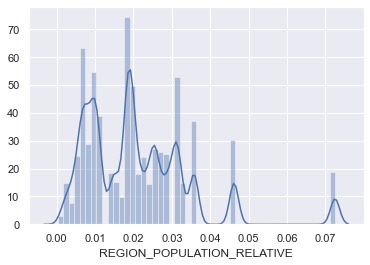

******************************************************************
ANNUITY_TO_INCOME


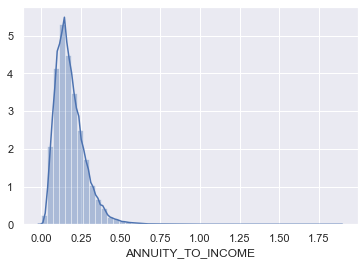

******************************************************************
DAYS_BIRTH


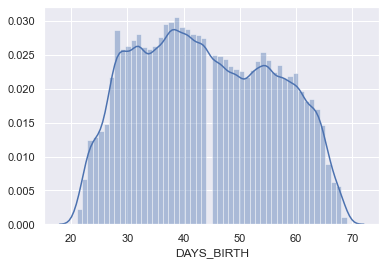

******************************************************************
AMT_INCOME_TOTAL


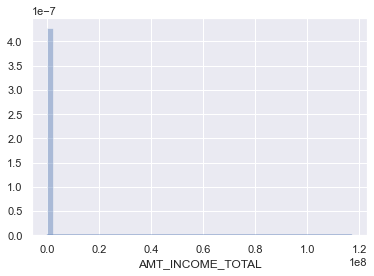

******************************************************************
AMT_ANNUITY


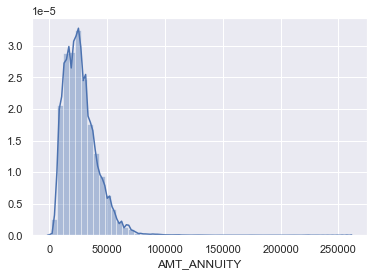

******************************************************************
AMT_CREDIT


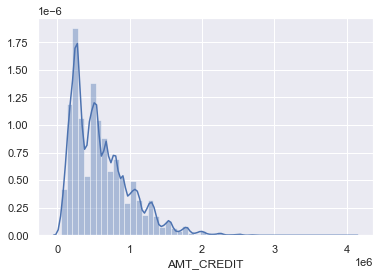

******************************************************************


In [61]:
for i in ['REGION_POPULATION_RELATIVE', 'ANNUITY_TO_INCOME',
       'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT']:
    print(i)
    sns.distplot(treat[i].dropna())
    plt.show()
    print("******************************************************************")


### Countplot for derived metrics columns

POPULATION_OF_REGION


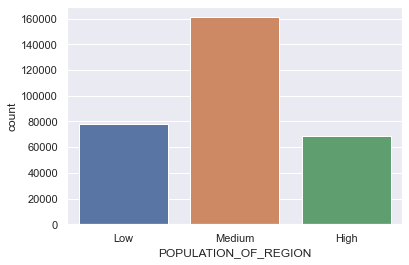

******************************************************************
AGE_BUCKETS


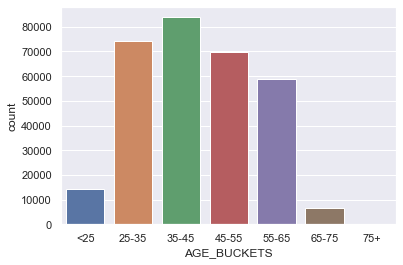

******************************************************************
INCOME_OF_PERSON


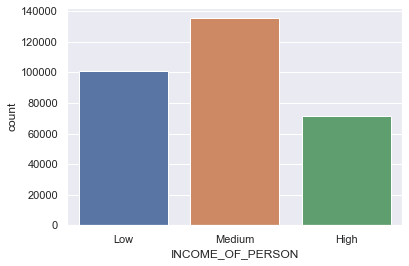

******************************************************************
amt_annuity_categorical


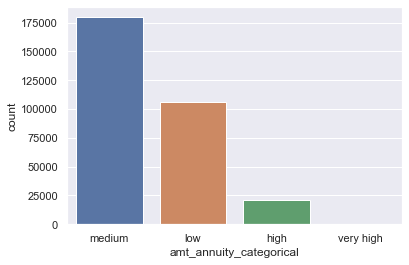

******************************************************************
CREDIT_OF_PERSON


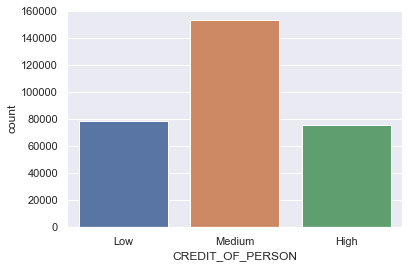

******************************************************************


In [62]:
for i in ['POPULATION_OF_REGION', 'AGE_BUCKETS', 'INCOME_OF_PERSON', 
          'amt_annuity_categorical', 'CREDIT_OF_PERSON']:
    print(i)
    sns.countplot(x= i, data = treat)
    plt.show()
    print("******************************************************************")
   

As we can see derived categorical metrics provide following insights :-
    - Mostly people are of 35-45 years age 
    - Mostly people are in middle income and middle credit range

## Now, we will analyse numerical and categorical data

### Let's start with categorical data


### Analysing categorical data
Since due to data imbalance, we will separate out the treat with a target equal to 0 and treat with a target equal to 1. And we will analyse them individually and try to find any relationship if it exists. 

In [63]:
treat_0 = treat.loc[treat['TARGET'] == 0]
treat_1 = treat.loc[treat['TARGET'] == 1]

#### Here, we will use 3 different plots for analysis : -
- Pie plot : For plotting the all the values present in a column in terms of percentage. So, the sum of those data types in percentage terms will be 100. 
- Countplot 1 : Here, we will plot the count of the different categories. So, Target=0 will have higher count than Target=1. 
- Countplot 2 : To plot this dataset, we have first divided the dataset into 2 subsets, Target=0 and Target=1. Then again divided the individual Target=0 and Target=1 into different categories. Then, plotted these categories in terms of percentage. So, we can find that the values for Target=0 and Target=1 are mostly equal.

In [65]:
#Function for above plots 
def plotter(treat, treat_0, treat_1, column):
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    treat[column].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = treat, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((treat_0[column].value_counts())/len(treat_0))
    df['1']= ((treat_1[column].value_counts())/len(treat_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    plt.tight_layout() # Or equivalently, we can use "fig.tight_layout()" also
    plt.show()

In [66]:
#Extracting categorical data
treat_categorical = treat.select_dtypes(include=['object']).columns


## Univariate Analysis of the Categorical data

Plotting  NAME_CONTRACT_TYPE


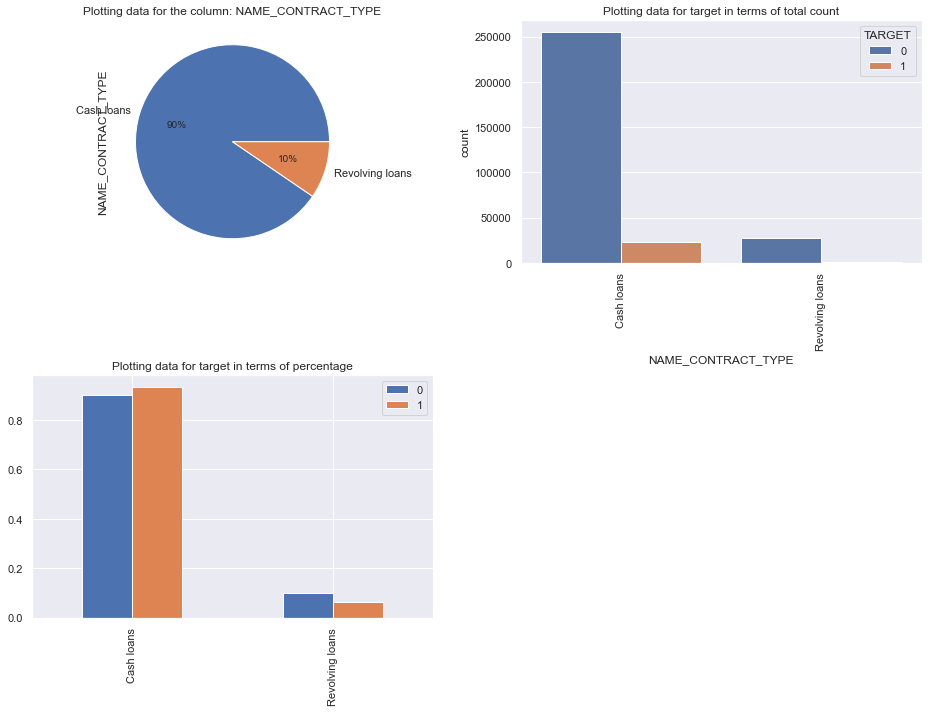

------------------------***************************************--------------------------
Plotting  CODE_GENDER


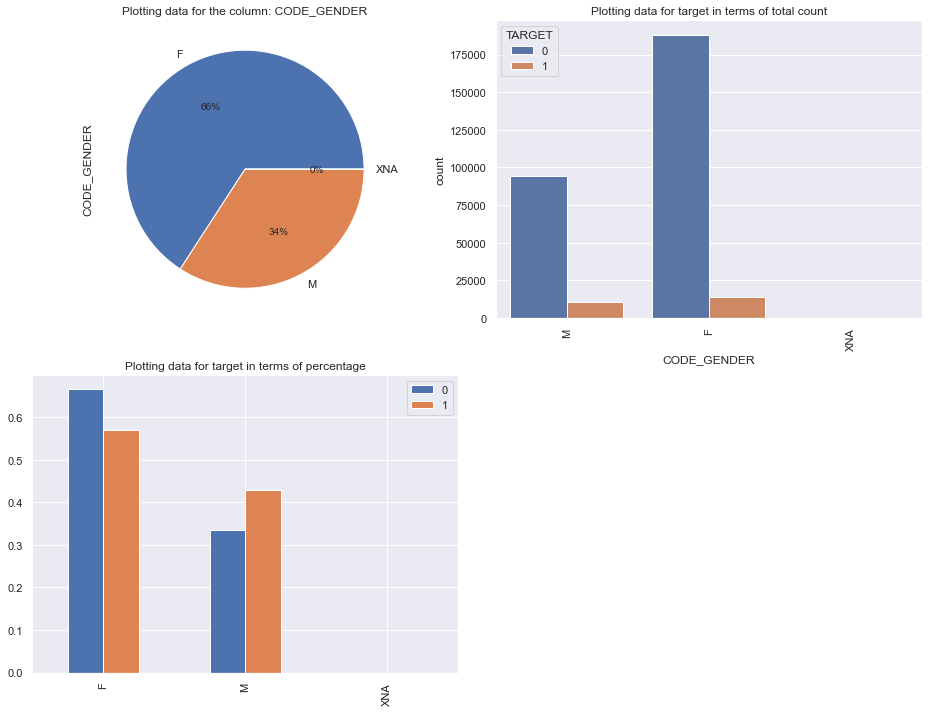

------------------------***************************************--------------------------
Plotting  FLAG_OWN_CAR


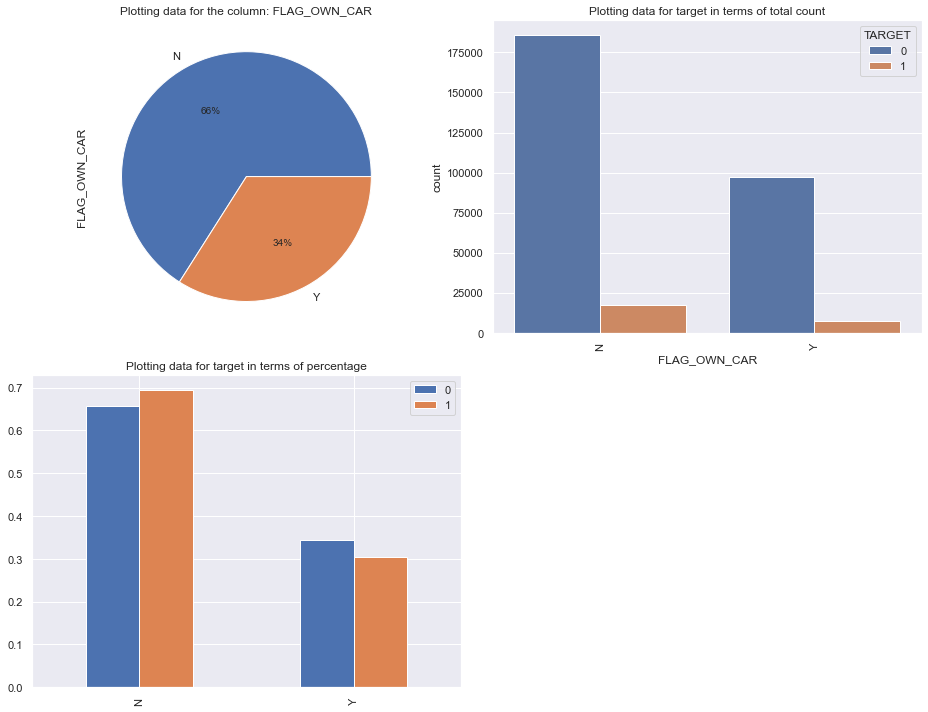

------------------------***************************************--------------------------
Plotting  FLAG_OWN_REALTY


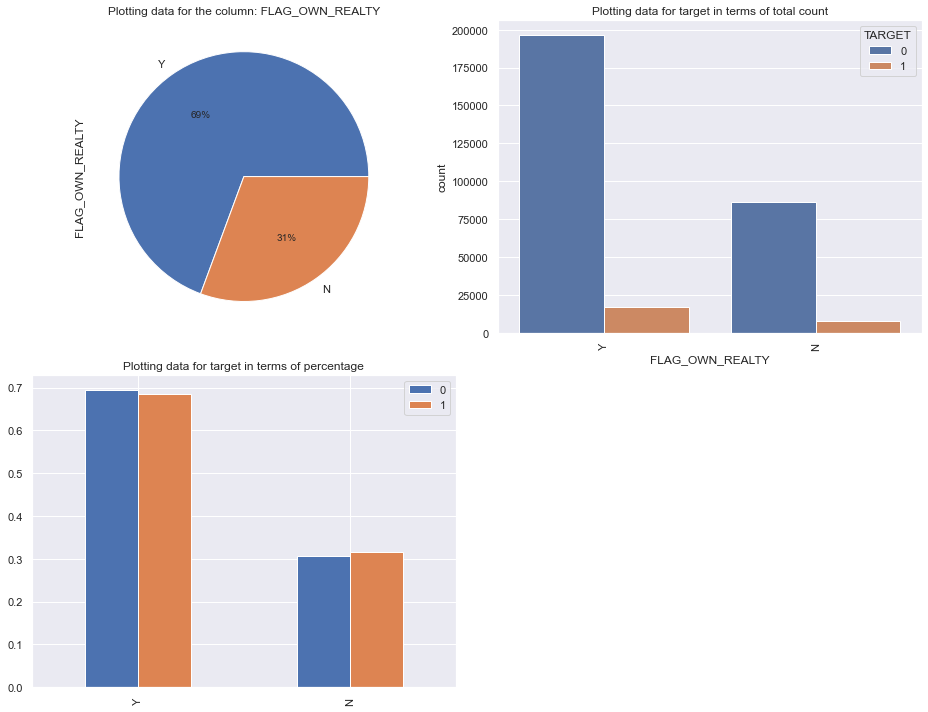

------------------------***************************************--------------------------
Plotting  NAME_TYPE_SUITE


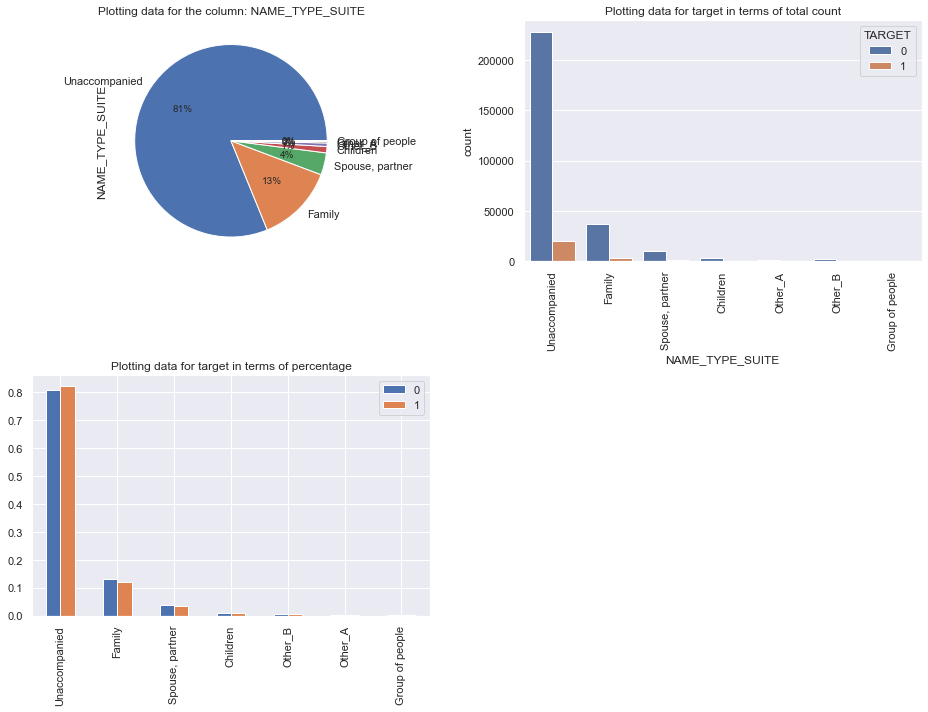

------------------------***************************************--------------------------
Plotting  NAME_INCOME_TYPE


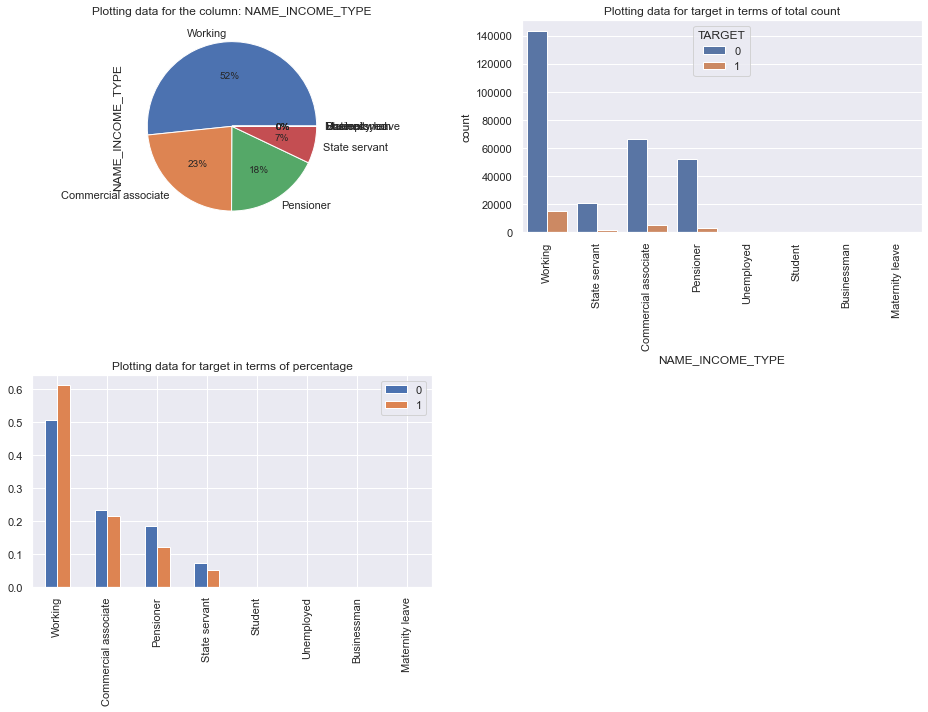

------------------------***************************************--------------------------
Plotting  NAME_EDUCATION_TYPE


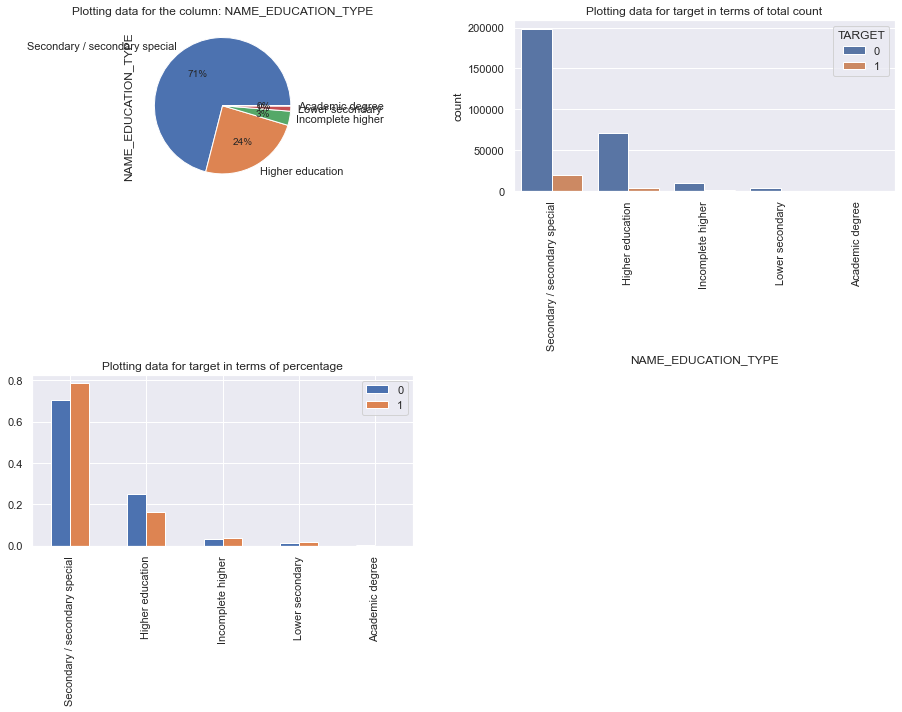

------------------------***************************************--------------------------
Plotting  NAME_FAMILY_STATUS


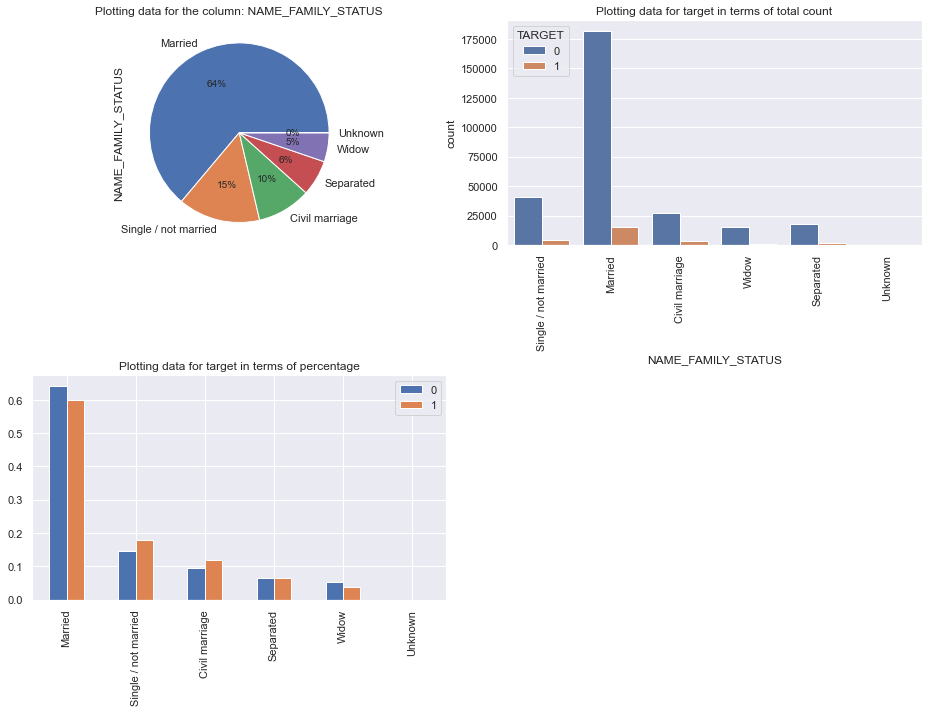

------------------------***************************************--------------------------
Plotting  NAME_HOUSING_TYPE


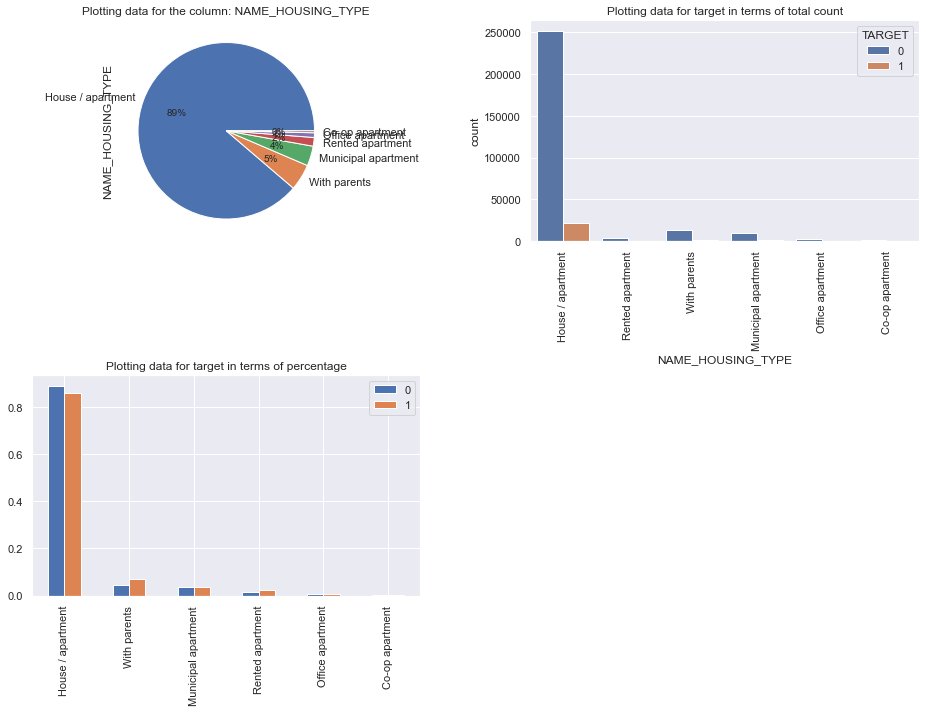

------------------------***************************************--------------------------
Plotting  OCCUPATION_TYPE


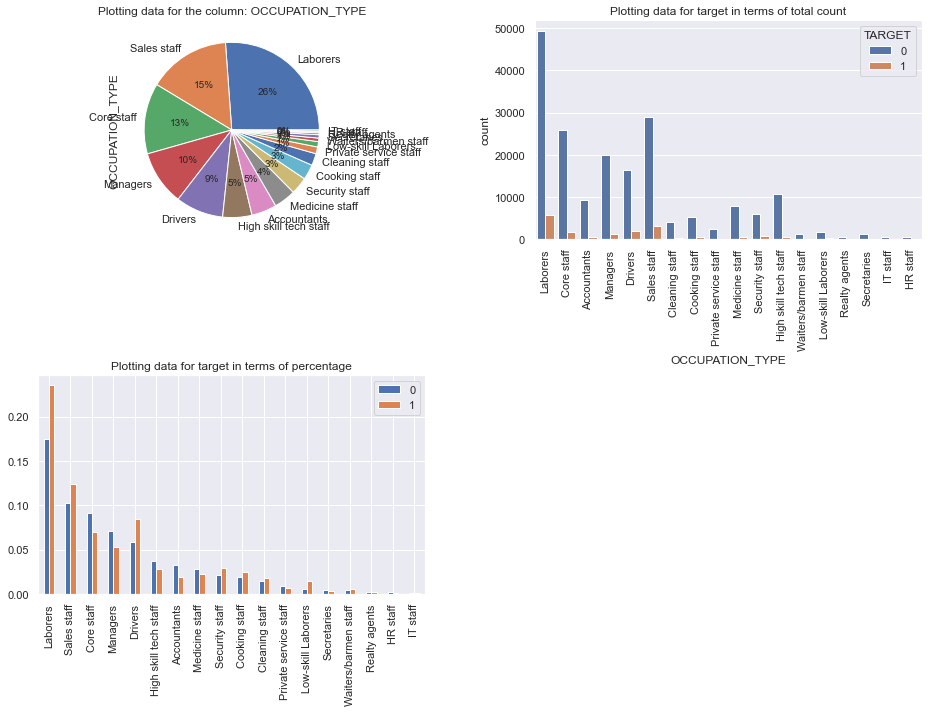

------------------------***************************************--------------------------
Plotting  WEEKDAY_APPR_PROCESS_START


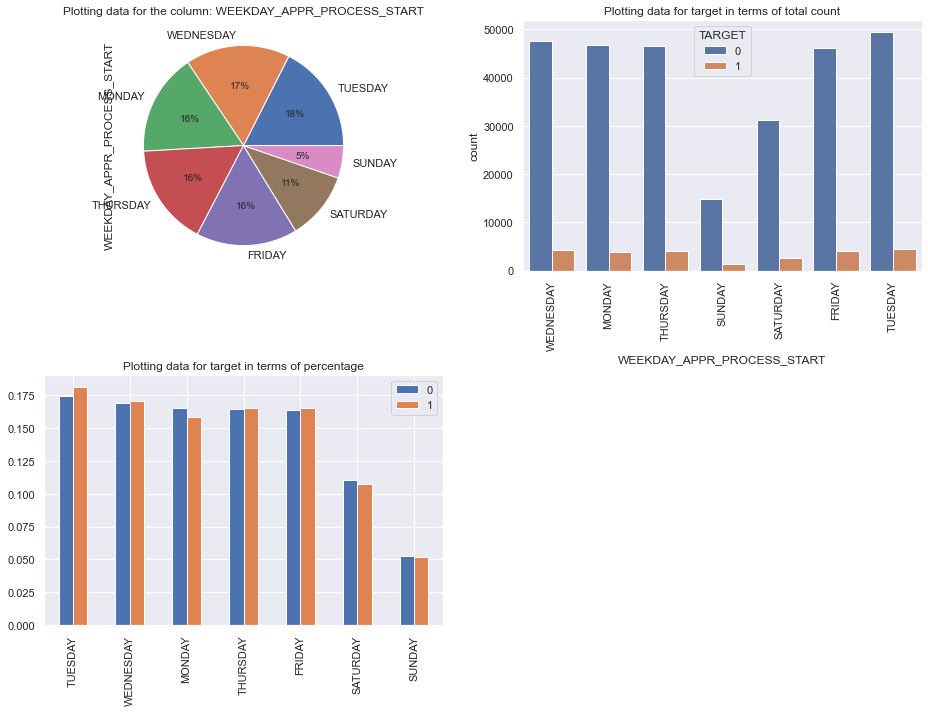

------------------------***************************************--------------------------
Plotting  ORGANIZATION_TYPE


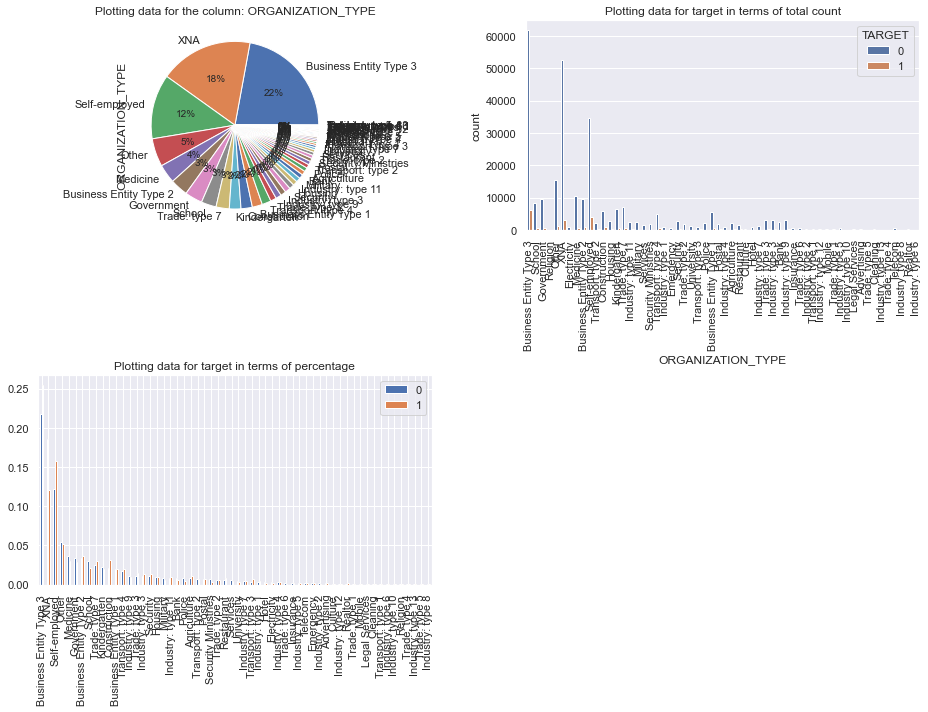

------------------------***************************************--------------------------
Plotting  amt_annuity_categorical


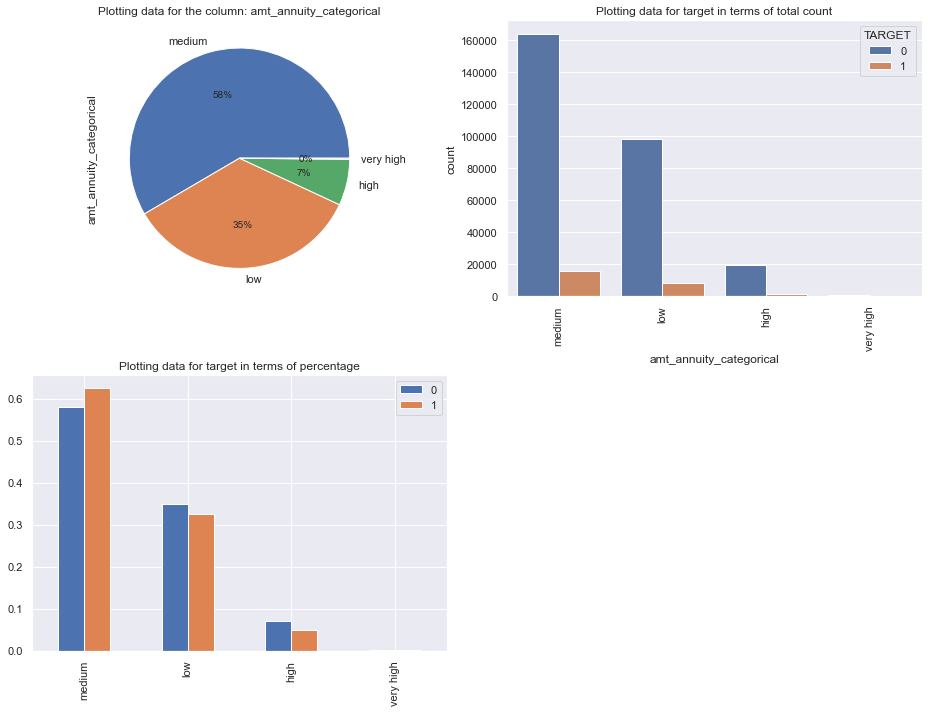

------------------------***************************************--------------------------


In [67]:
for column in treat_categorical:
    print("Plotting ", column)
    plotter(treat, treat_0, treat_1, column)
    print('------------------------***************************************--------------------------')

### Plotting the data :-

Example : 
For column "NAME_CONTRACT_TYPE", in the first plot, 90% 'cash_loans' are there and 10% 'Revolving_loans' are there. In the second plot, the numnber of 'cash_loans' is ~250,000 and ~2500 for 'cash_loans' for Target=0. Similarly for Target=1. In the last plot, since we have plotted the dataset in terms of percentage, so, sum of 'blue' colour for 'cash_loans' and 'Revolving_loans' for Target=0 is 1. Similarly, sum of orange' colour for 'cash_loans' and 'Revolving_loans' for Target=1 is 1.

#### The variable which seems to be important are :-

- CODE_GENDER: Less number of males(hist plot) take loan but the defaulters are higher in case of males(dist plot).
- NAME_INCOME_TYPE: Pensioner defaulter is lower than non-defaulter.
- NAME_EDUCATION_TYPE: Most client take loan for secondary education followed by higher education. But the defualt rate in secondary education is much high and for higher education is much low. 
- NAME_FAMILY_STATUS: Most married people apply for loan, and mostly they are not defaulters. Single and civil marriage turns out to be more defaulter.
- OCCUPATION_TYPE: Laborers and different categories of staffs mostly take the loan, but the managers and the high skilled tech staffs are most relaible. 

## Analyzing Numerical columns

### Non-defaulter correlation


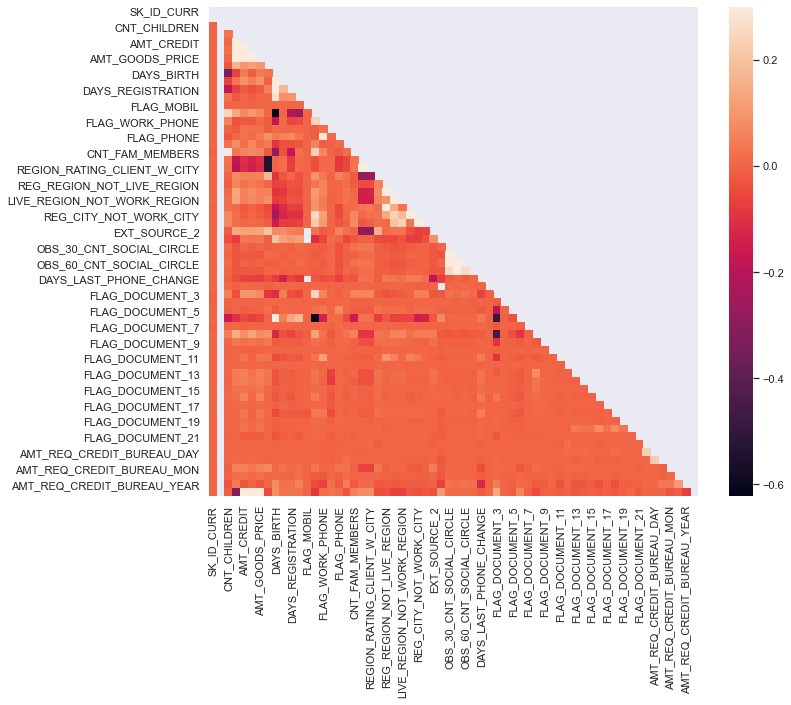

In [68]:
corr = treat_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

####  Finding the top 10 Non-defaulter correlation


In [77]:
correlation_0 = treat_0.corr()
correlation_0 = correlation_0.unstack()
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]
print("Top 10 highly correlated variables")
print(correlation_0.sort_values(ascending=False, kind="quicksort").drop_duplicates().head(10))
print("******************************************************************")
print("Top 10 negatively correlated variables")
print(correlation_0.sort_values(ascending=False, kind="quicksort").drop_duplicates().tail(10))



Top 10 highly correlated variables
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998508
AMT_GOODS_PRICE              AMT_CREDIT                     0.987250
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859332
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830381
AMT_ANNUITY                  AMT_GOODS_PRICE                0.776686
AMT_CREDIT                   AMT_ANNUITY                    0.771309
ANNUITY_TO_INCOME            AMT_ANNUITY                    0.485310
dtype: float64
******************************************************************
Top 10 negatively correlated variables
REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2                  -0.286337
EXT_SOURCE_2                 REGION_RATING_CLIENT          -0.291624
AMT_INCOME_TOTAL

### Defaulter correlation

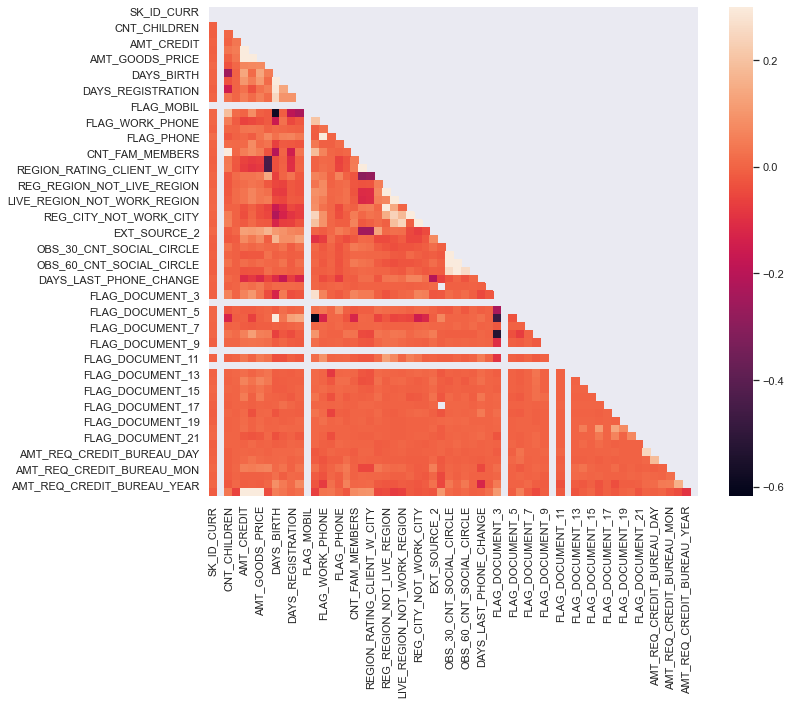

In [78]:
corr = treat_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

####  Finding the top 10 defaulter correlation


In [79]:
correlation_1 = treat_1.corr()
correlation_1 = correlation_1.unstack()
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0]

print("Top 10 highly correlated variables")
print(correlation_1.sort_values(ascending=False, kind="quicksort").drop_duplicates().head(10))
print("******************************************************************")
print("Top 10 negatively correlated variables")
print(correlation_1.sort_values(ascending=False, kind="quicksort").drop_duplicates().tail(10))

Top 10 highly correlated variables
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
AMT_GOODS_PRICE              AMT_CREDIT                     0.983103
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.868994
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778540
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752699
AMT_CREDIT                   AMT_ANNUITY                    0.752195
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION     0.497937
dtype: float64
******************************************************************
Top 10 negatively correlated variables
EXT_SOURCE_2                REGION_RATING_CLIENT          -0.250519
DAYS_BIRTH                  CNT_CHILDREN                  -0.258910
HOUR_APPR_PROCESS_

### Analysing through box plot

In [80]:
#Extracting numerical data
treat_numeric = treat.select_dtypes(include=['int64', 'float64']).columns


### Analysis for the outliers

Plotting the numerical data based on the index and analysing if there are outliers in any of the column. 

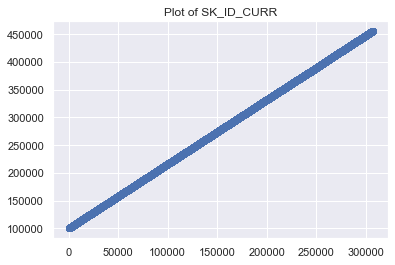

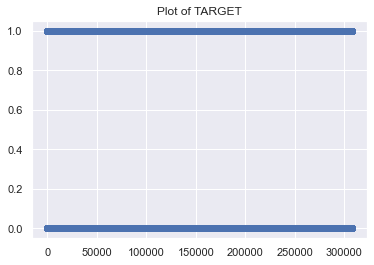

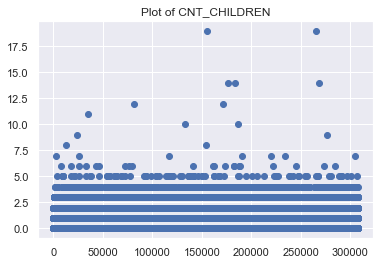

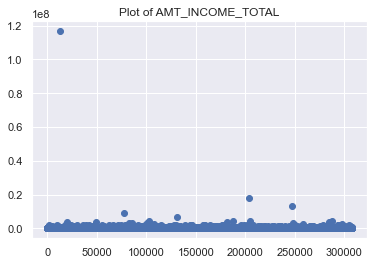

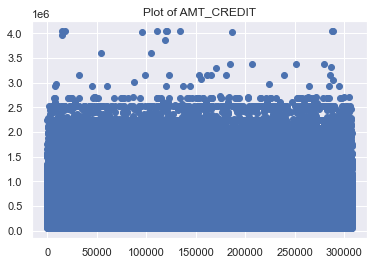

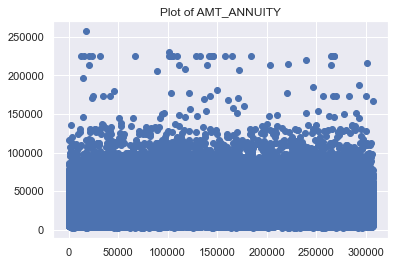

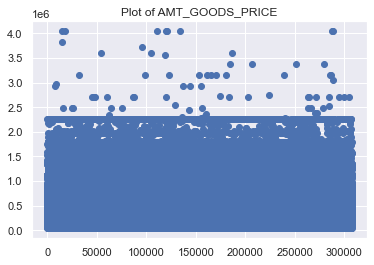

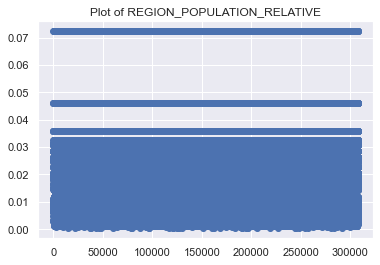

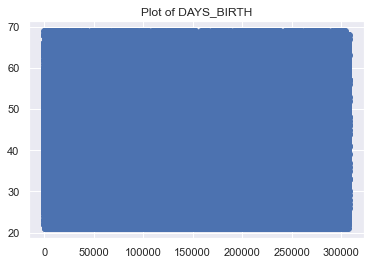

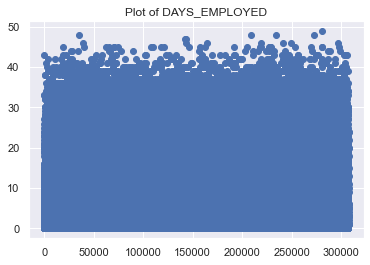

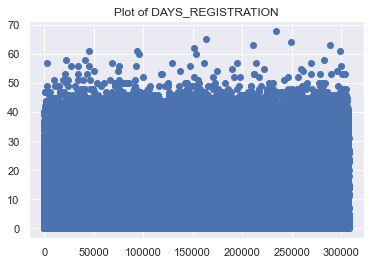

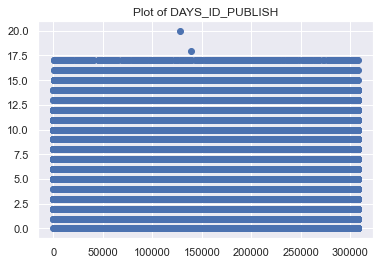

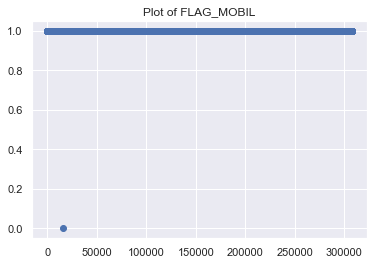

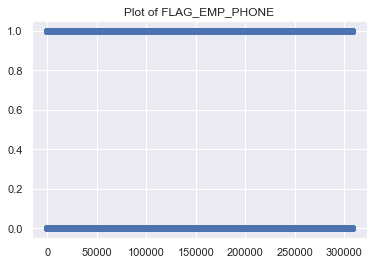

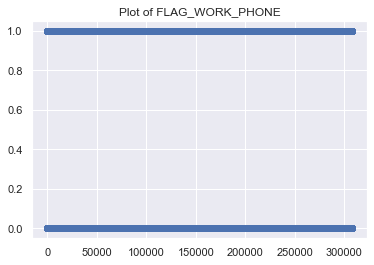

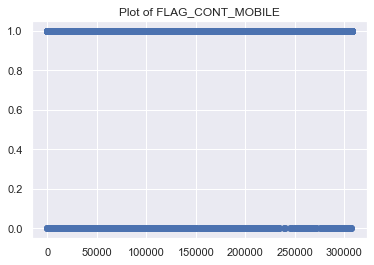

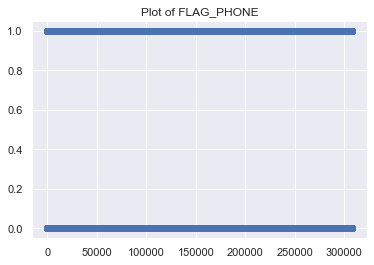

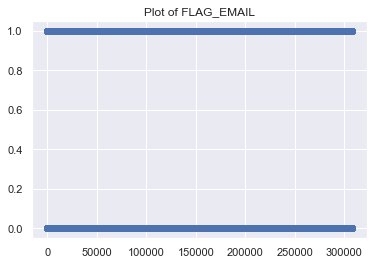

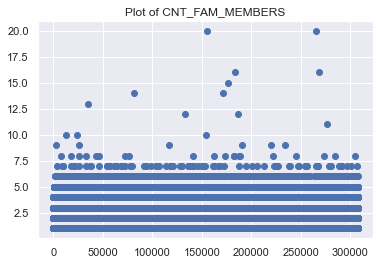

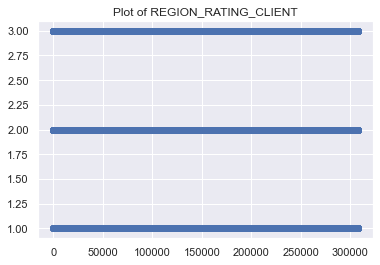

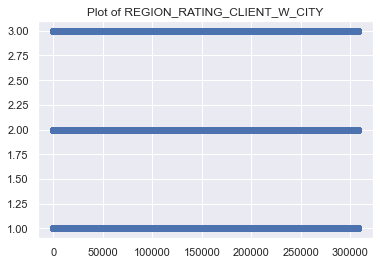

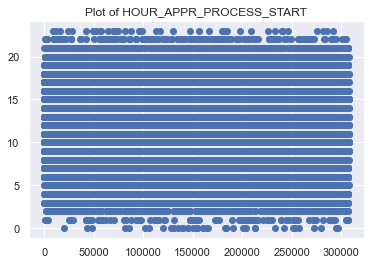

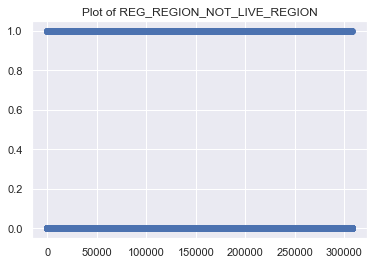

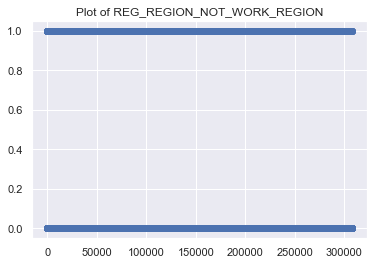

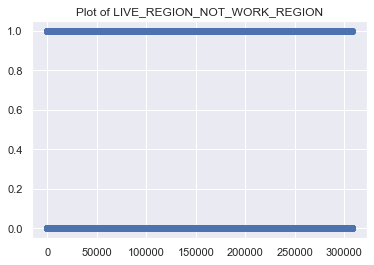

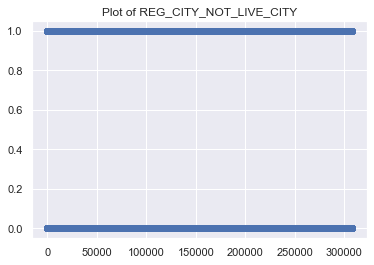

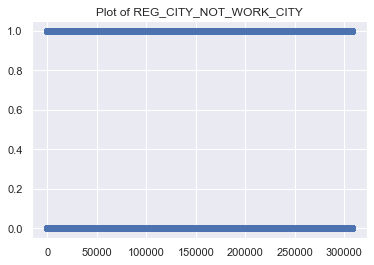

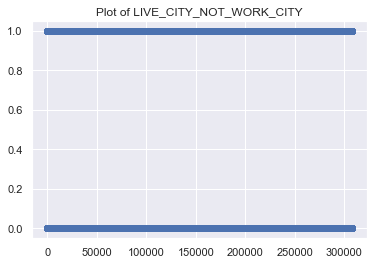

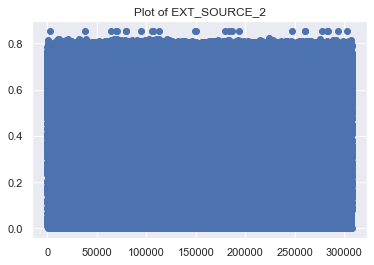

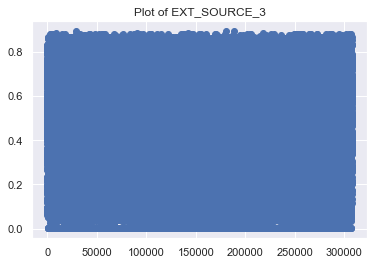

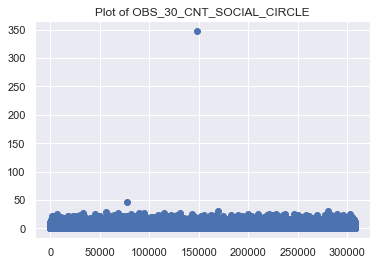

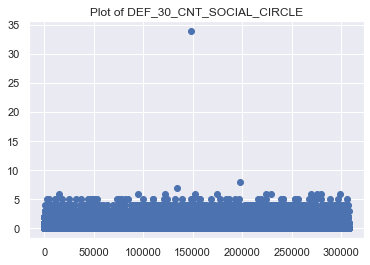

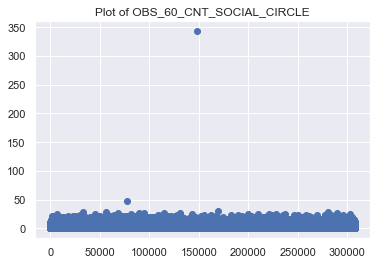

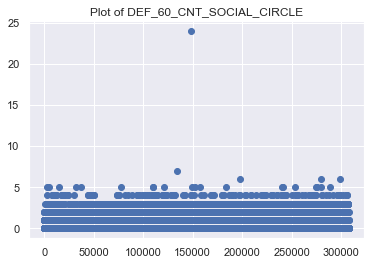

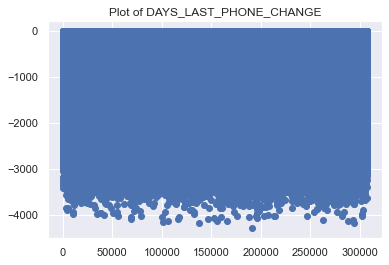

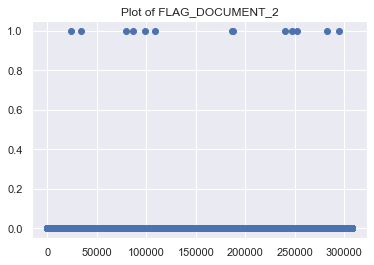

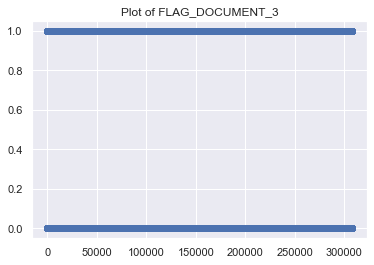

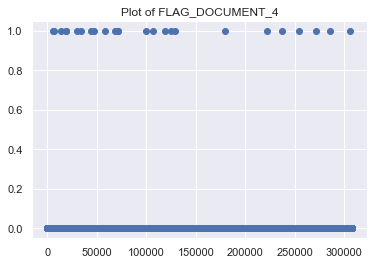

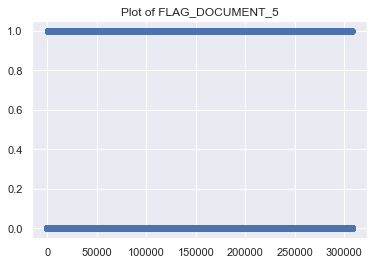

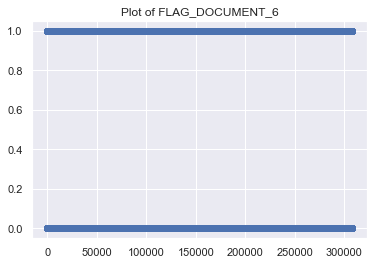

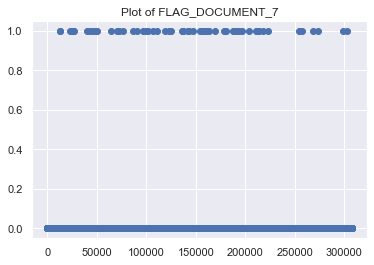

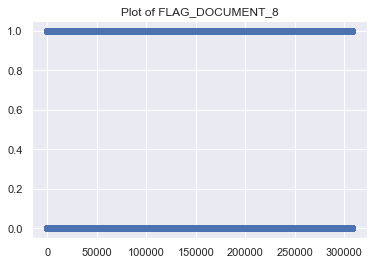

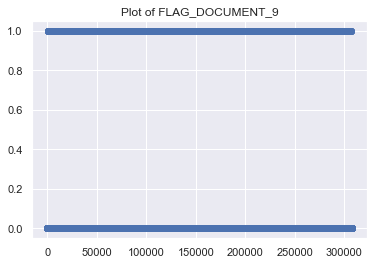

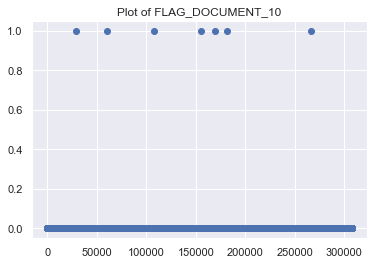

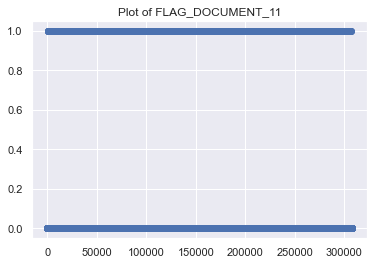

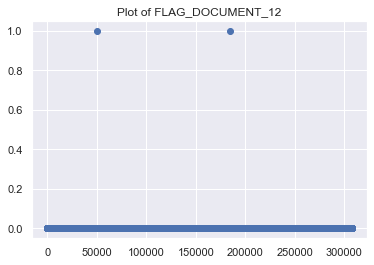

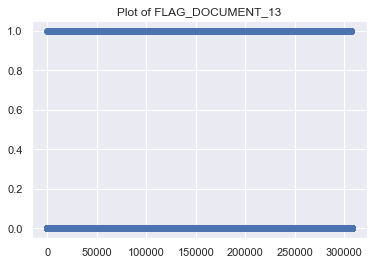

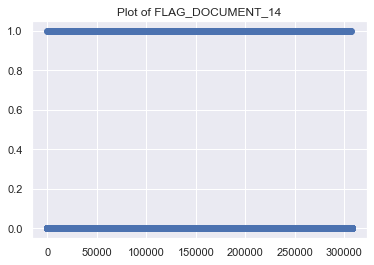

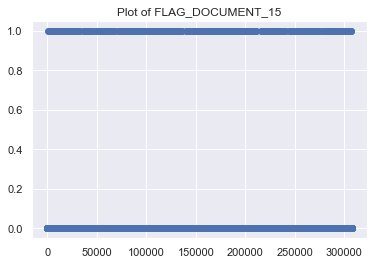

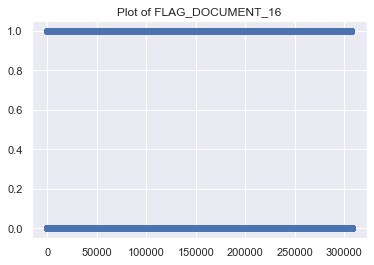

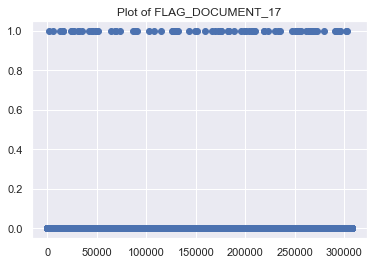

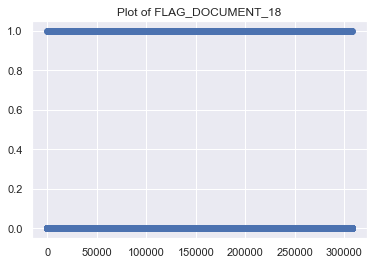

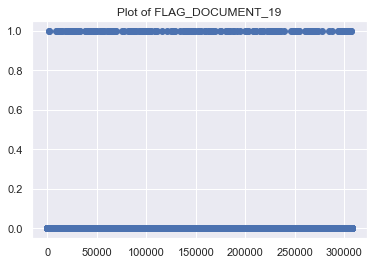

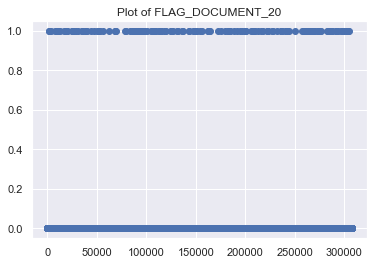

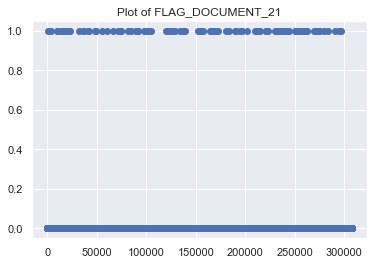

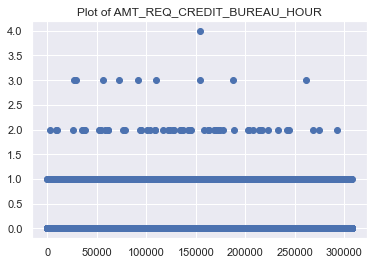

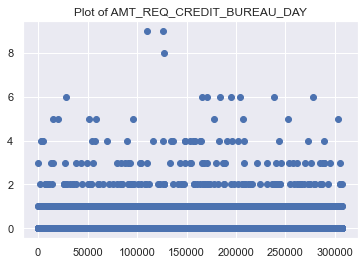

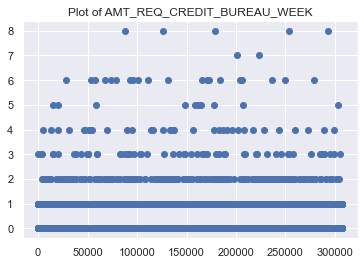

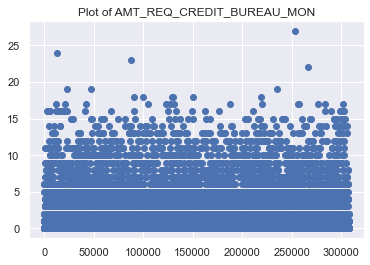

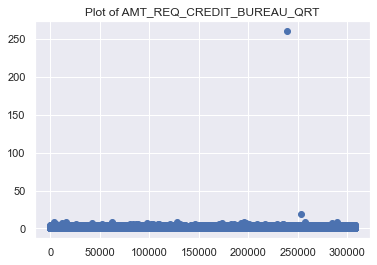

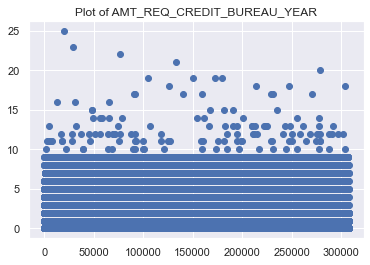

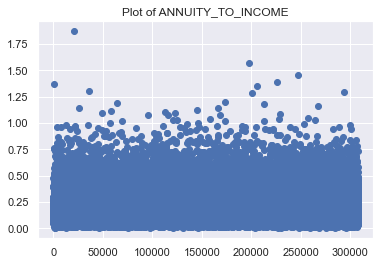

In [81]:
for column in treat_numeric:
    title = "Plot of "+column
    plt.scatter(treat.index, treat[column])
    plt.title(title)
    plt.show()

The analysis of the outliers is mainly based on the bussiness problem. And if the data does not have any error, removing the extreme value will be based on the bussiness need. By analysing the different plots, its seems that there are no error in reporting of the data. So, instead of removing those, we will just point out the columns which contain extreme values. 
Some of the columns that need to be analyses are:
- CNT_CHILDREN - Count of children - Some client have >10 childen, which looks like an extreme value. 
- AMT_INCOME_TOTAL - Income of the client - One value with value ~1.2 1e8 seems to be outlier as the value is significantly far away form others and can be removed. 
- FLAG_MOBILE - There may be a case where a client does not have mobile. Not sure whether it qualifies to be an outlier. 

Similary, we can see some other columns such as OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE etc. also. These also have some outliers. 

## Univariate Analysis for numerical data


For univariate analysis of the numerical columns, we will plot the histogram and the distribution plot. 

Plot of SK_ID_CURR


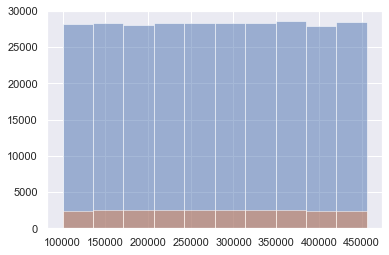

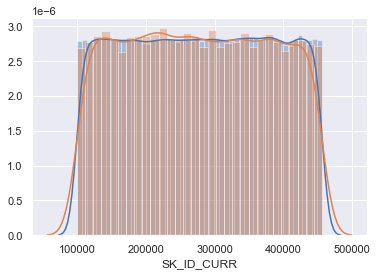

------------------------------------------------------------------------
Plot of TARGET


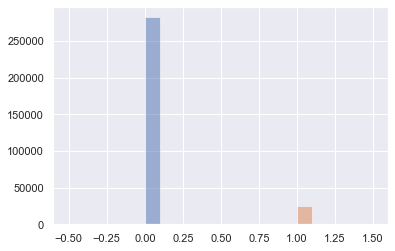

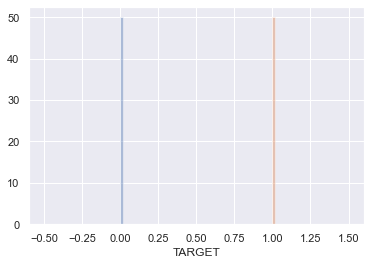

------------------------------------------------------------------------
Plot of CNT_CHILDREN


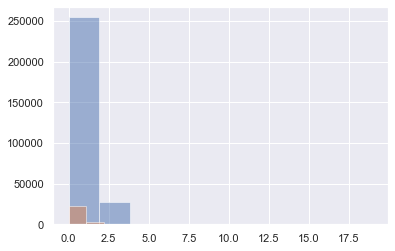

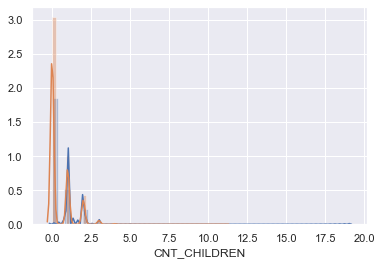

------------------------------------------------------------------------
Plot of AMT_INCOME_TOTAL


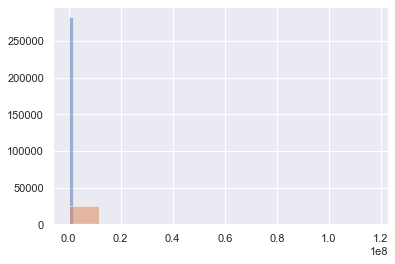

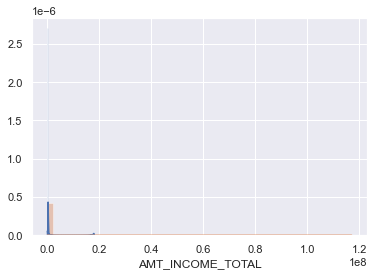

------------------------------------------------------------------------
Plot of AMT_CREDIT


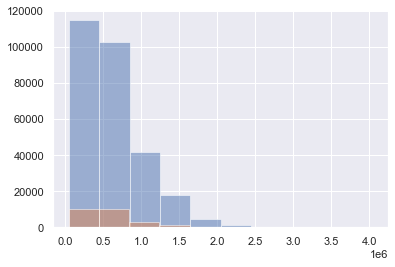

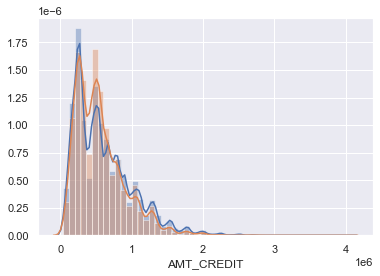

------------------------------------------------------------------------
Plot of AMT_ANNUITY


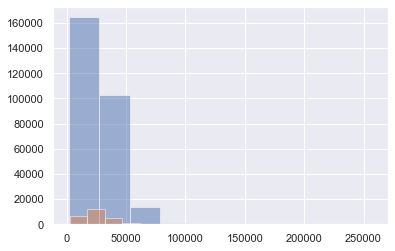

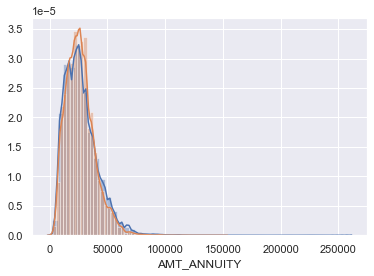

------------------------------------------------------------------------
Plot of AMT_GOODS_PRICE


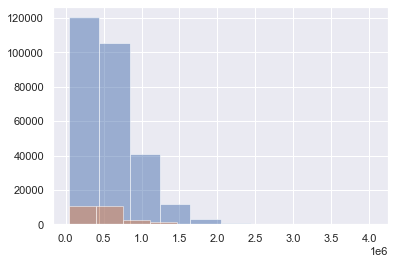

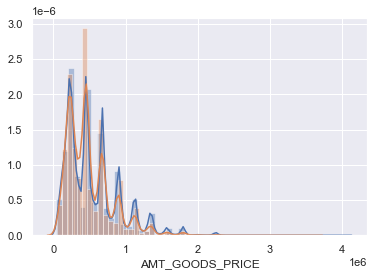

------------------------------------------------------------------------
Plot of REGION_POPULATION_RELATIVE


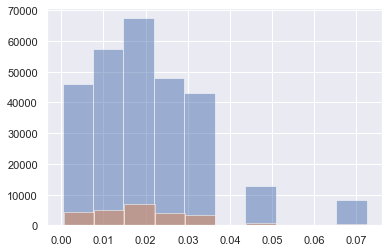

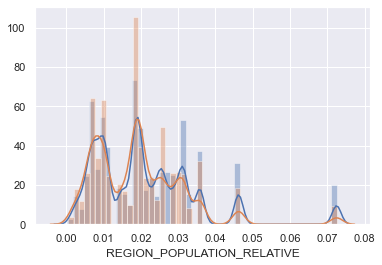

------------------------------------------------------------------------
Plot of DAYS_BIRTH


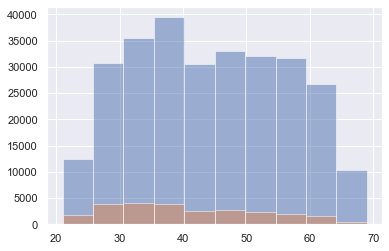

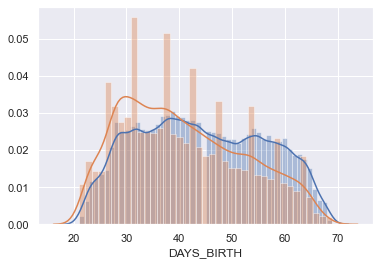

------------------------------------------------------------------------
Plot of DAYS_EMPLOYED


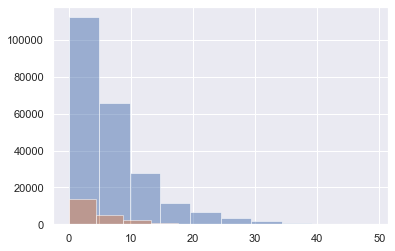

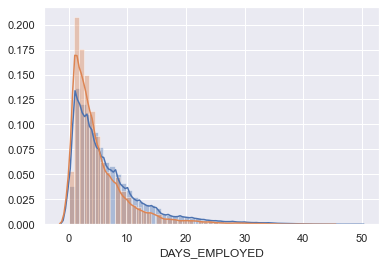

------------------------------------------------------------------------
Plot of DAYS_REGISTRATION


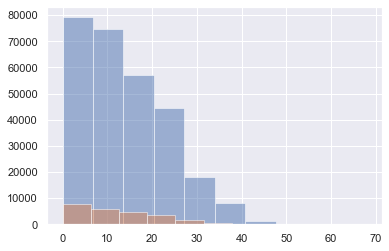

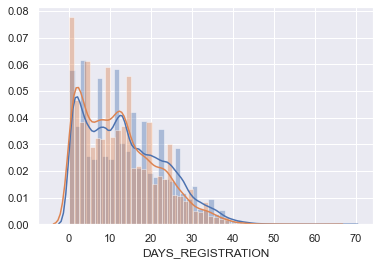

------------------------------------------------------------------------
Plot of DAYS_ID_PUBLISH


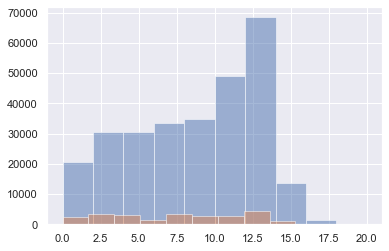

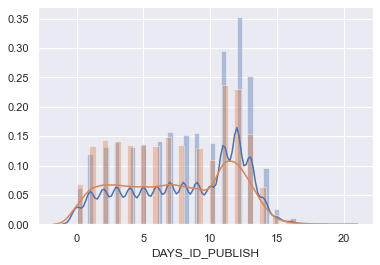

------------------------------------------------------------------------
Plot of FLAG_MOBIL


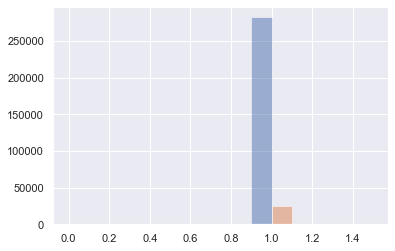

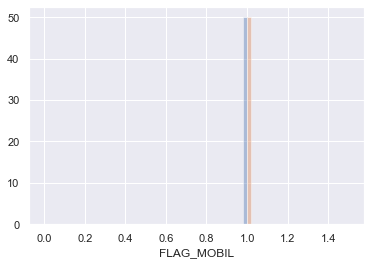

------------------------------------------------------------------------
Plot of FLAG_EMP_PHONE


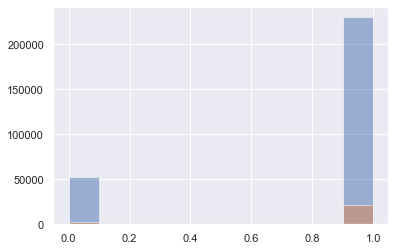

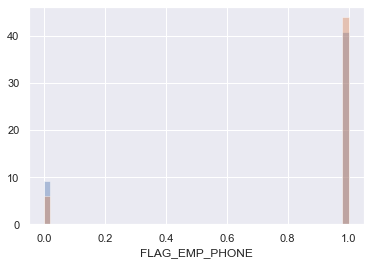

------------------------------------------------------------------------
Plot of FLAG_WORK_PHONE


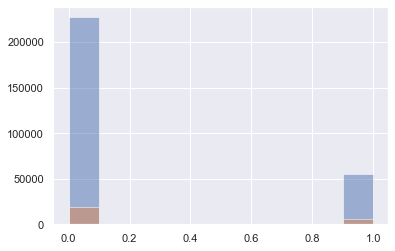

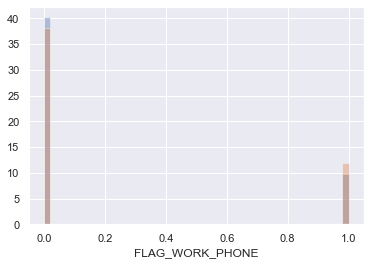

------------------------------------------------------------------------
Plot of FLAG_CONT_MOBILE


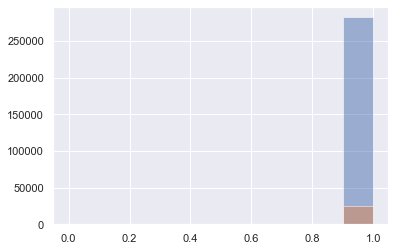

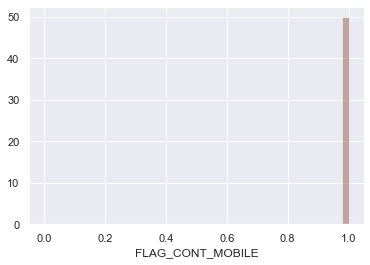

------------------------------------------------------------------------
Plot of FLAG_PHONE


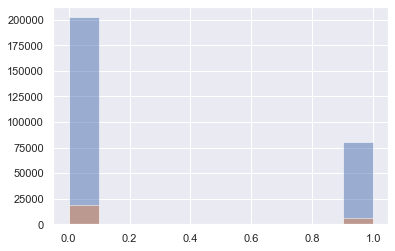

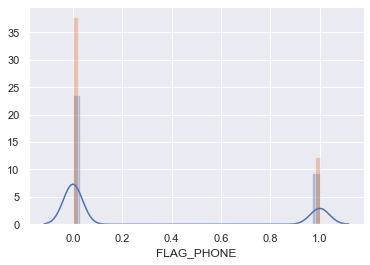

------------------------------------------------------------------------
Plot of FLAG_EMAIL


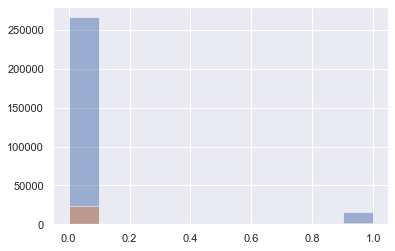

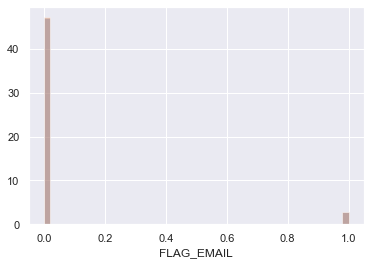

------------------------------------------------------------------------
Plot of CNT_FAM_MEMBERS


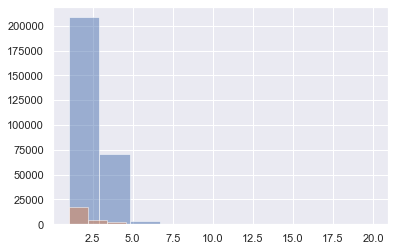

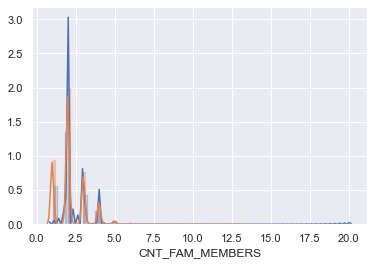

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT


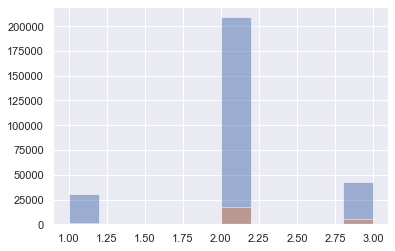

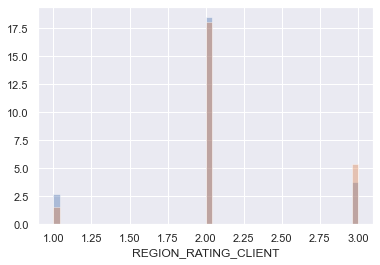

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT_W_CITY


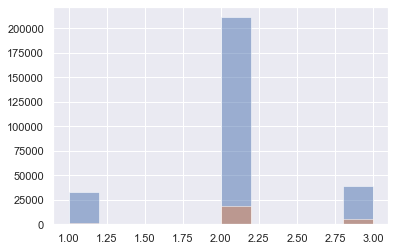

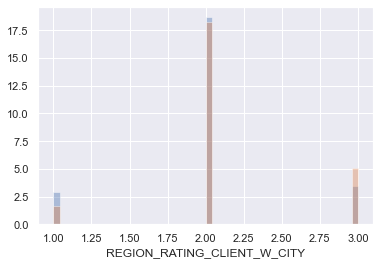

------------------------------------------------------------------------
Plot of HOUR_APPR_PROCESS_START


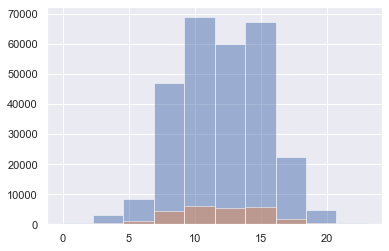

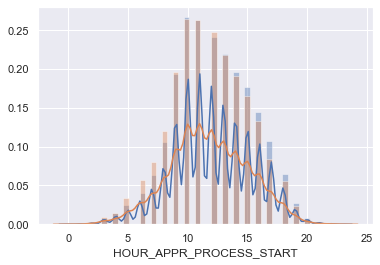

------------------------------------------------------------------------
Plot of REG_REGION_NOT_LIVE_REGION


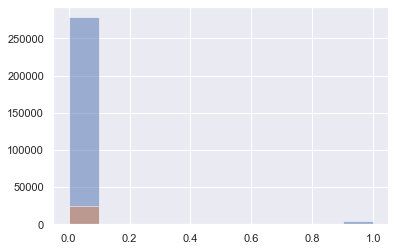

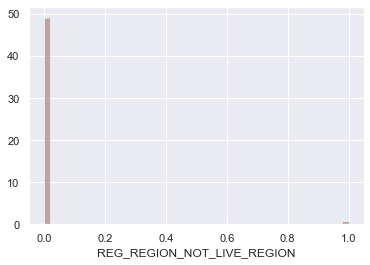

------------------------------------------------------------------------
Plot of REG_REGION_NOT_WORK_REGION


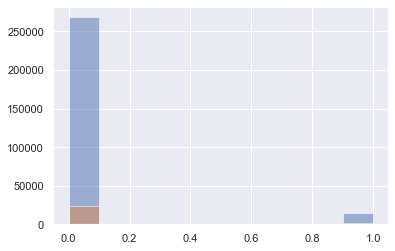

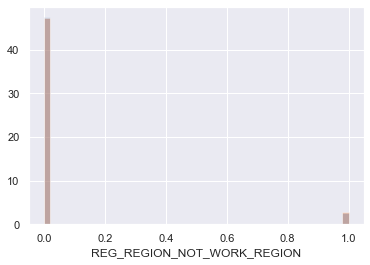

------------------------------------------------------------------------
Plot of LIVE_REGION_NOT_WORK_REGION


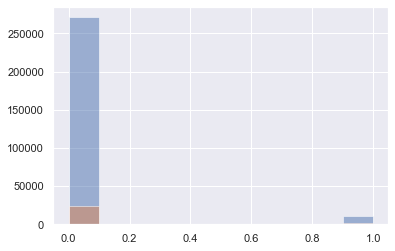

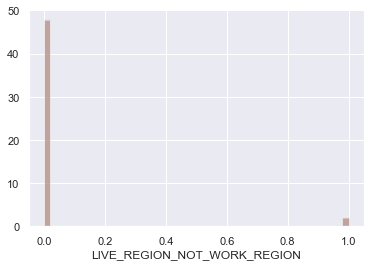

------------------------------------------------------------------------
Plot of REG_CITY_NOT_LIVE_CITY


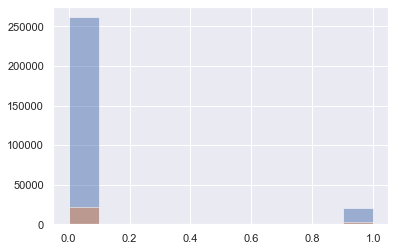

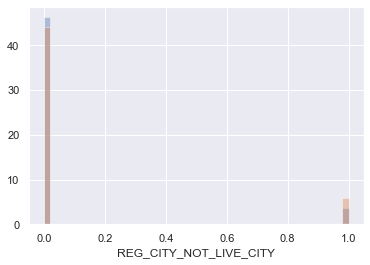

------------------------------------------------------------------------
Plot of REG_CITY_NOT_WORK_CITY


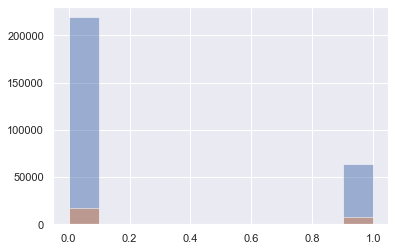

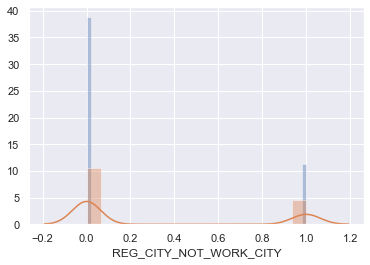

------------------------------------------------------------------------
Plot of LIVE_CITY_NOT_WORK_CITY


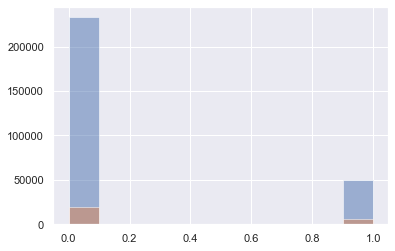

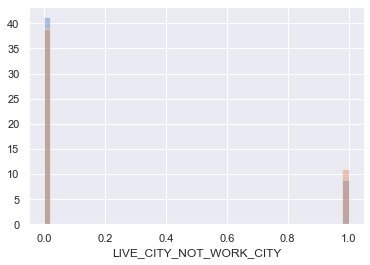

------------------------------------------------------------------------
Plot of EXT_SOURCE_2


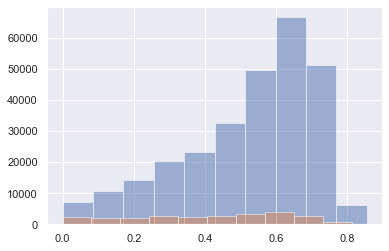

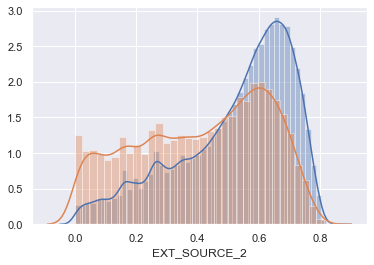

------------------------------------------------------------------------
Plot of EXT_SOURCE_3


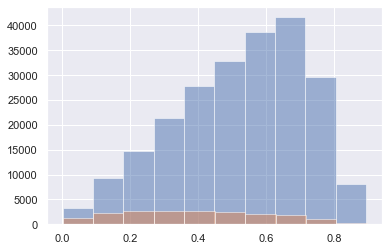

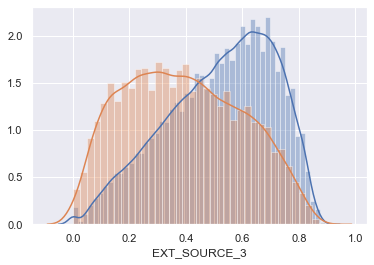

------------------------------------------------------------------------
Plot of OBS_30_CNT_SOCIAL_CIRCLE


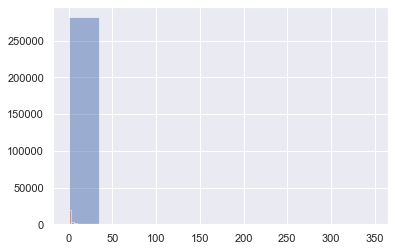

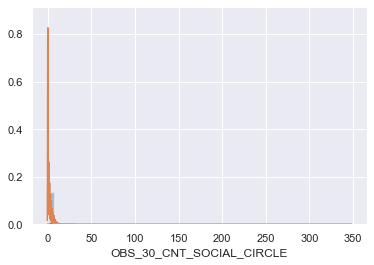

------------------------------------------------------------------------
Plot of DEF_30_CNT_SOCIAL_CIRCLE


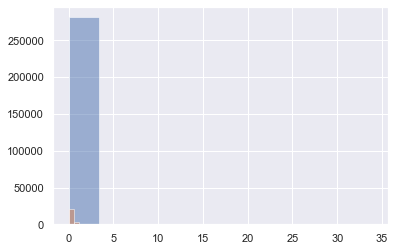

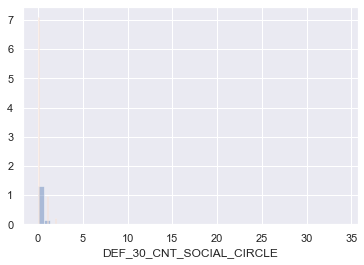

------------------------------------------------------------------------
Plot of OBS_60_CNT_SOCIAL_CIRCLE


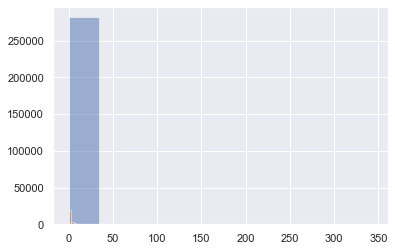

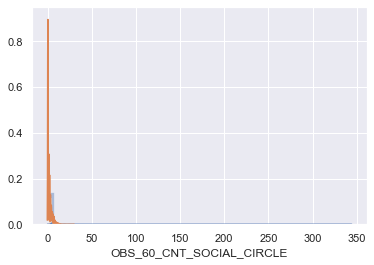

------------------------------------------------------------------------
Plot of DEF_60_CNT_SOCIAL_CIRCLE


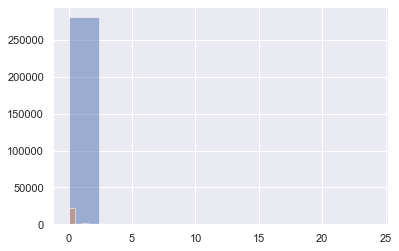

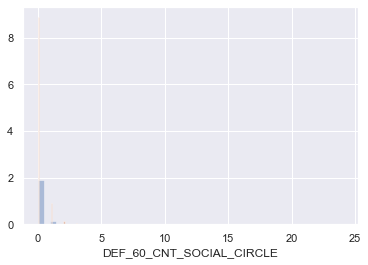

------------------------------------------------------------------------
Plot of DAYS_LAST_PHONE_CHANGE


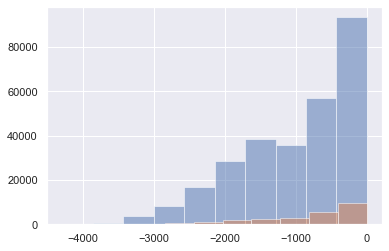

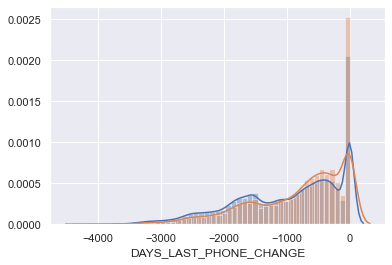

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_2


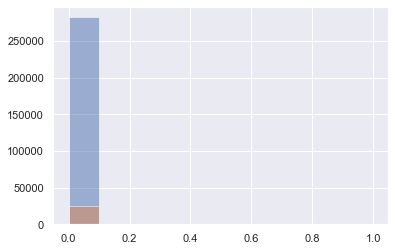

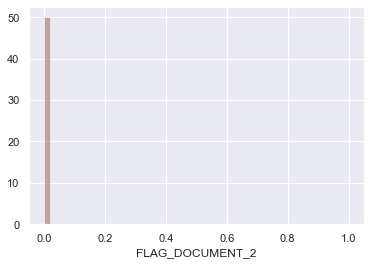

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_3


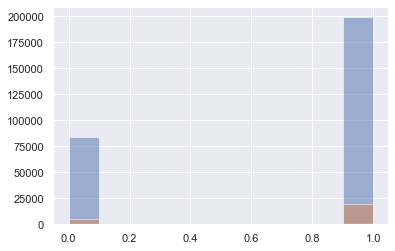

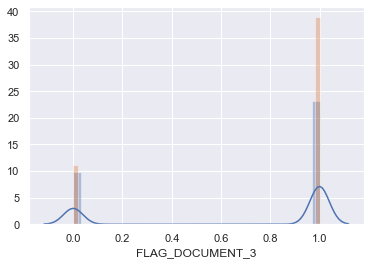

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_4


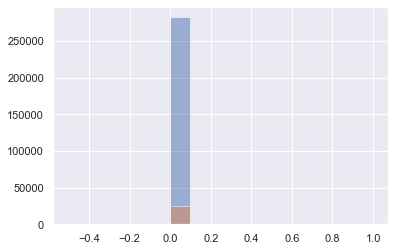

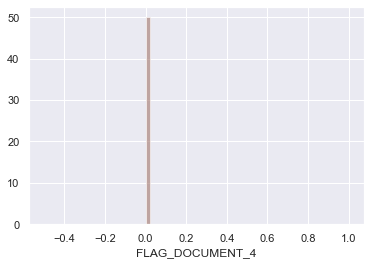

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_5


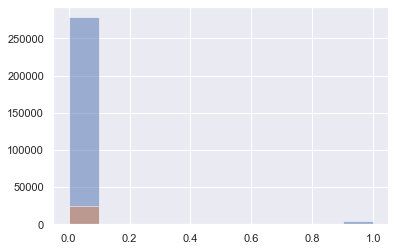

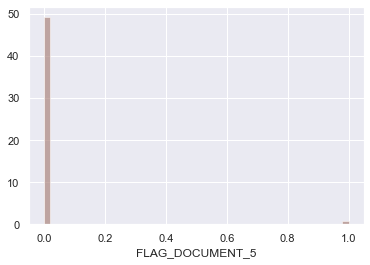

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_6


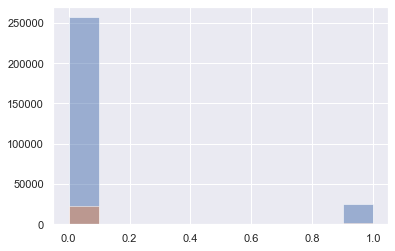

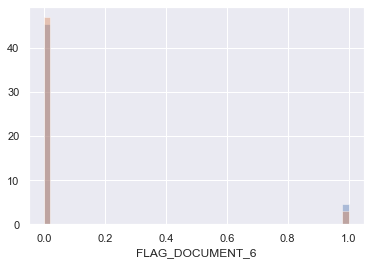

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_7


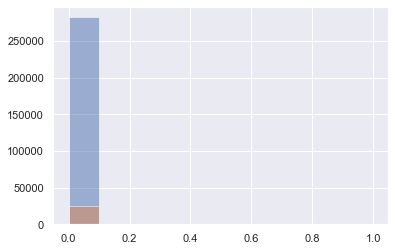

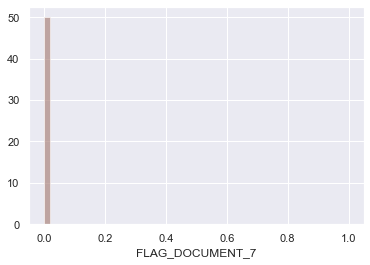

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_8


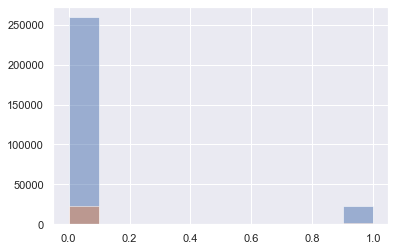

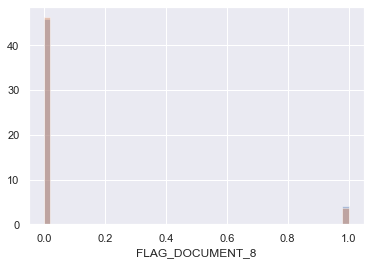

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_9


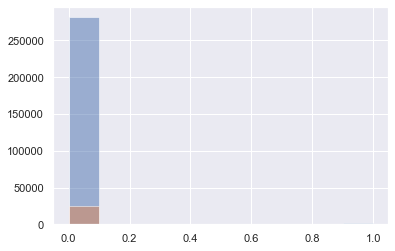

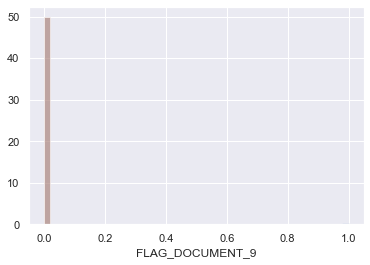

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_10


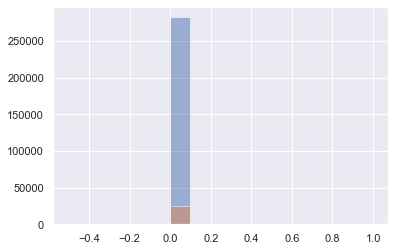

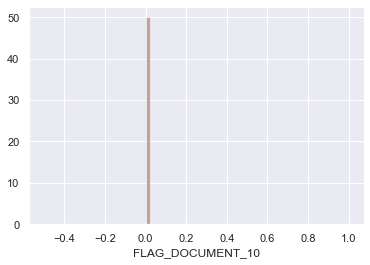

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_11


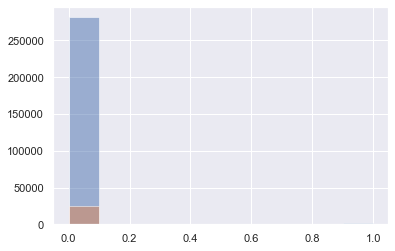

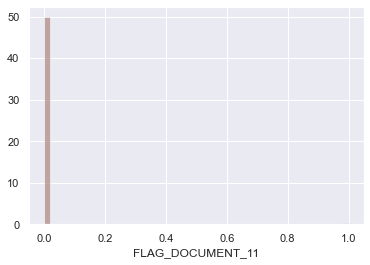

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_12


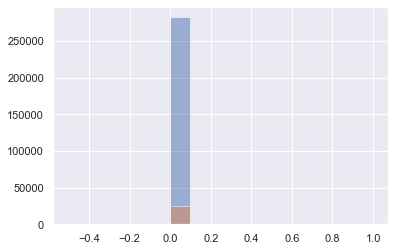

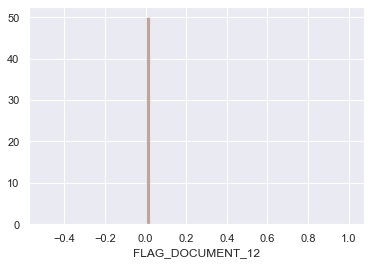

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_13


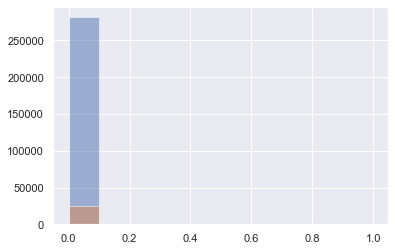

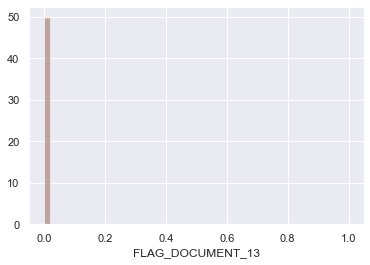

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_14


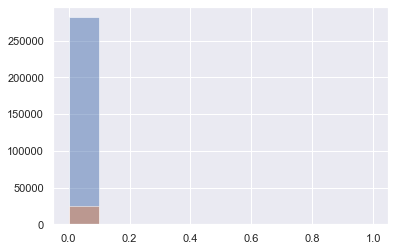

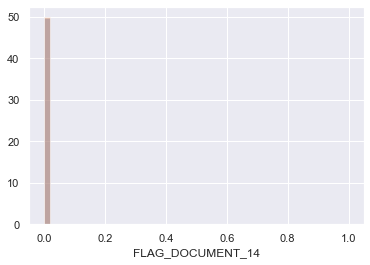

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_15


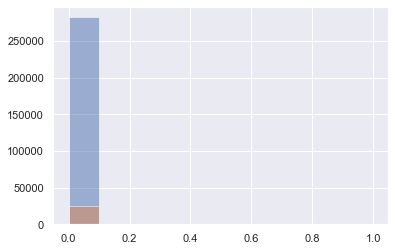

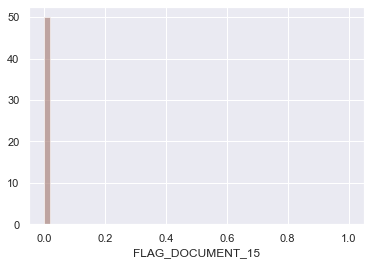

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_16


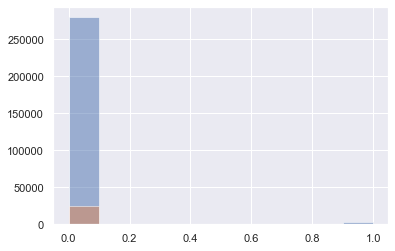

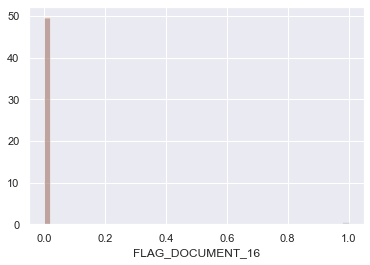

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_17


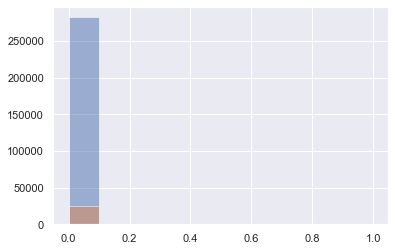

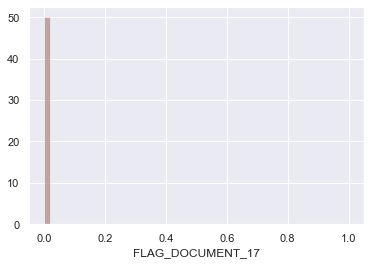

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_18


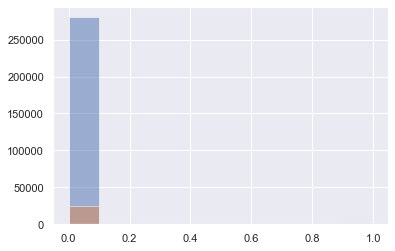

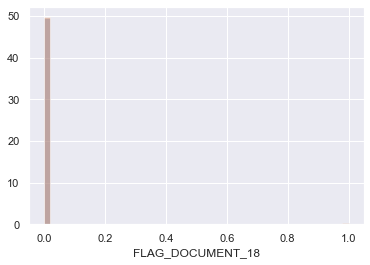

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_19


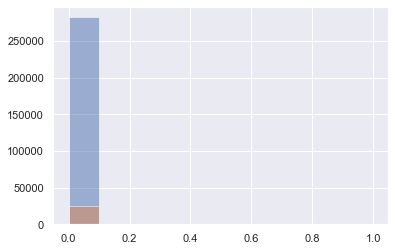

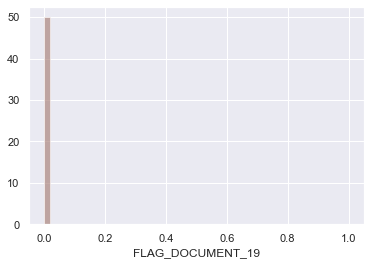

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_20


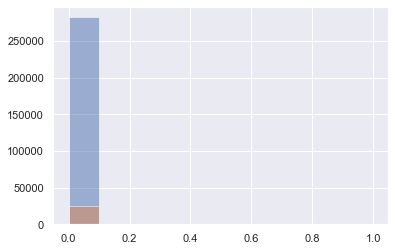

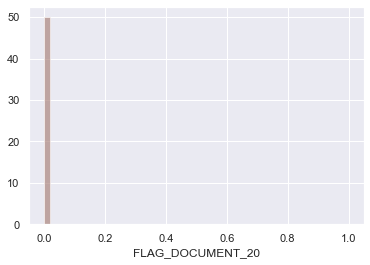

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_21


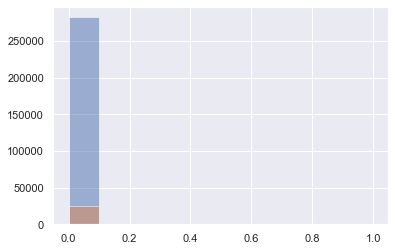

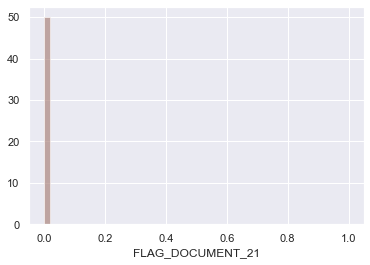

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_HOUR


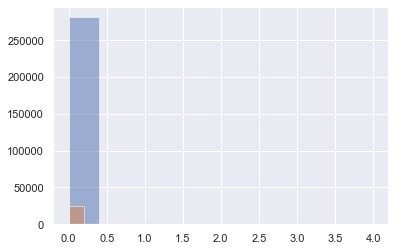

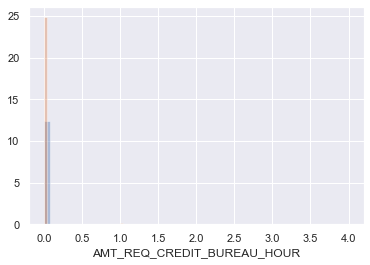

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_DAY


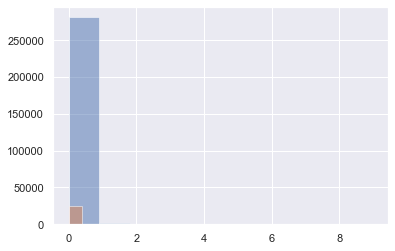

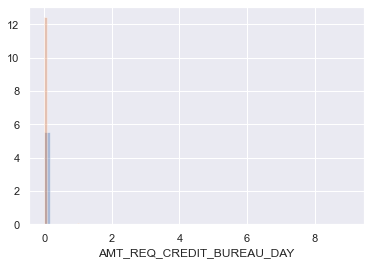

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_WEEK


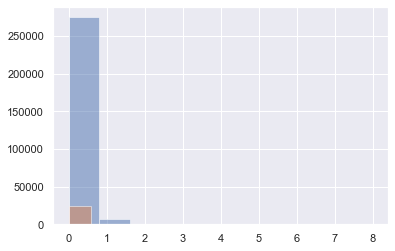

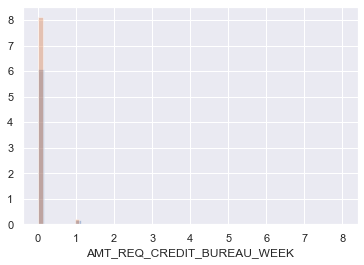

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_MON


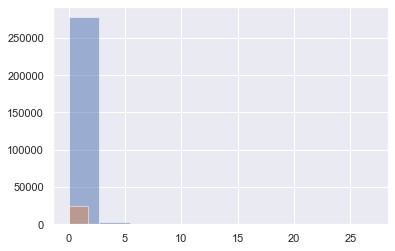

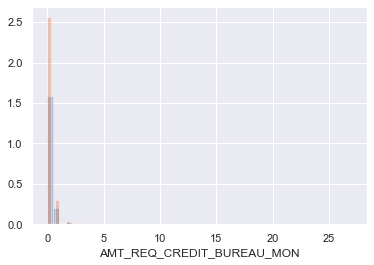

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_QRT


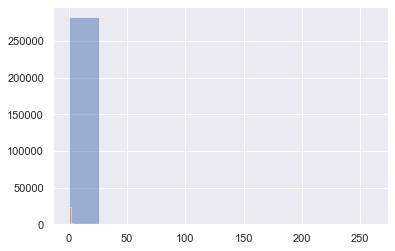

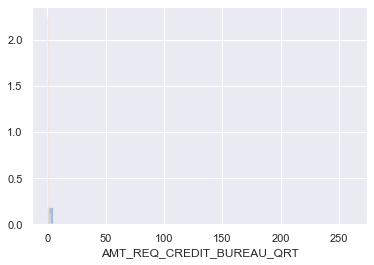

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_YEAR


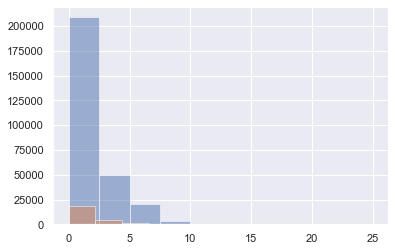

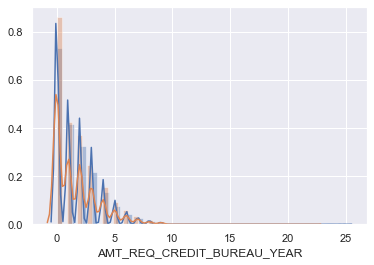

------------------------------------------------------------------------
Plot of ANNUITY_TO_INCOME


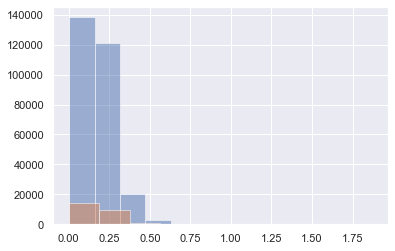

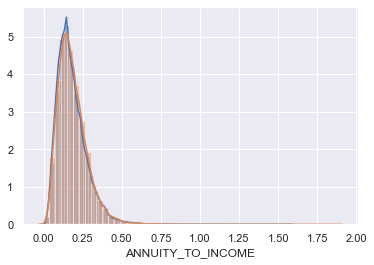

------------------------------------------------------------------------


In [82]:
for column in treat_numeric:
    title = "Plot of "+column
    print(title)
    plt.hist(treat_0[column], alpha=0.5, label='0')
    plt.hist(treat_1[column], alpha=0.5, label='1')
    plt.show()
    
    sns.distplot(treat_0[column].dropna(), label='0')
    sns.distplot(treat_1[column].dropna(), label='1')
    plt.show()
    
    print("------------------------------------------------------------------------")

##### The columns which seems different where both the histogram and distribution plot are different for the target = 0 and target = 1 are :-

- AMT_CREDIT 
- AMT_ANNUITY
- AMT_GOODS_PRICE
- DAYS_BIRTH
- HOURS_APPR_PROCESS_START
- EXT_SOUCE_2
- EXT_SOURCE_3
- AMT_REQ_CREDIT_BUREAU_YEAR

## Loading Previous Application Dataset


In [83]:
#we are defining "pre" as our previous application dataset
pre = pd.read_csv("//Users//abhisheksharma//Desktop//Credit Card EDA//previous_application.csv")

pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [84]:
# Shape of previous application dataset
pre.shape

(1670214, 37)

There are 37 columns and 1670214 rows in previous application dataset

In [85]:
#info about previous application dataset
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [86]:
#Statistical Inferences about previous application dataset
pre.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [87]:
#columns of previous application dataset
pre.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [88]:
#Description of previous appplication dataset for 'object' data type columns
pre.describe(include='object') 

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
count             1670214                    1670214   
unique                  4                          7   
top            Cash loans                    TUESDAY   
freq               747553                     255118   

       FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
count                      1670214                1670214   
unique                           2                     25   
top                              Y                    XAP   
freq                       1661739                 922661   

       NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
count               1670214                1670214            1670214   
unique                    4                      4                  9   
top                Approved  Cash through the bank                XAP   
freq                1036781                1033552            1353093   

       NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
count           849809          1670214             1670214        1670214   
unique               7                4                  28              5   
top      Unaccompanied         Repeater                 XNA            POS   
freq            508970          1231261              950809         691011   

       NAME_PRODUCT_TYPE             CHANNEL_TYPE NAME_SELLER_INDUSTRY  \
count            1670214                  1670214              1670214   
unique                 3                        8                   11   
top                  XNA  Credit and cash offices                  XNA   
freq             1063666                   719968               855720   

       NAME_YIELD_GROUP PRODUCT_COMBINATION  
count           1670214             1669868  
unique                5                  17  
top                 XNA                Cash  
freq             517215              285990

## Hadnling missing values in previous application dataset

In [89]:
#null count of each column in previous appplication dataset
pre.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [90]:
#missing values in %
pre_missing = pre.count()/len(pre)
pre_missing = (1-pre_missing)*100
pre_missing.sort_values(ascending=False).head(20)

RATE_INTEREST_PRIVILEGED      99.643698
RATE_INTEREST_PRIMARY         99.643698
RATE_DOWN_PAYMENT             53.636480
AMT_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE               49.119754
DAYS_TERMINATION              40.298129
NFLAG_INSURED_ON_APPROVAL     40.298129
DAYS_FIRST_DRAWING            40.298129
DAYS_FIRST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION     40.298129
DAYS_LAST_DUE                 40.298129
AMT_GOODS_PRICE               23.081773
AMT_ANNUITY                   22.286665
CNT_PAYMENT                   22.286366
PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
dtype: float64

In [91]:
# We will drop rate interest columns as they have 99% null values 
pre.drop(labels = ["RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY"], axis = 1, inplace = True)

In [92]:
#Analyzing AMT_DOWN_PAYMENT missing values 
pre.AMT_DOWN_PAYMENT.isnull().groupby([pre['NAME_CONTRACT_TYPE']]).sum().astype(int).reset_index(name='count_of_nulls')

NAME_CONTRACT_TYPE  count_of_nulls
0         Cash loans          699619
1     Consumer loans            5110
2    Revolving loans          190769
3                XNA             346

Null values for down payment is the highest for cash loans. This makes sense as the cash loans don't require a down payment. 
Hence we shall impute the down payment with 0 for cash loans and leave the remaining as Nan.

In [93]:
#filling cash loans AMT_DOWN_PAYMENT with 0
pre.loc[pre.NAME_CONTRACT_TYPE == "Cash loans", "AMT_DOWN_PAYMENT"] = pre.loc[pre.NAME_CONTRACT_TYPE == "Cash loans", "AMT_DOWN_PAYMENT"].fillna(0)


In [94]:
#checking cash loans AMT_DOWN_PAYMENT null values
pre[pre.NAME_CONTRACT_TYPE == "Cash loans"]["AMT_DOWN_PAYMENT"].isnull().sum()

0

In [95]:
# We will do the same treatment for RATE_DOWN_PAYMENT 
pre.loc[pre.NAME_CONTRACT_TYPE == "Cash loans", "RATE_DOWN_PAYMENT"] = pre.loc[pre.NAME_CONTRACT_TYPE == "Cash loans", "RATE_DOWN_PAYMENT"].fillna(0)


In [96]:
#checking cash loans RATE_DOWN_PAYMENT with null values
pre[pre.NAME_CONTRACT_TYPE == "Cash loans"]["RATE_DOWN_PAYMENT"].isnull().sum()

0

In [97]:
#Let's study the Contract types "XNA" and see if they are missing at random or not 

pre[pre.NAME_CONTRACT_TYPE == "XNA"]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
6664        2515161      222844                XNA          NaN   
9029        1851920      417884                XNA          NaN   
17038       2389511      148922                XNA          NaN   
24543       2494449      366626                XNA          NaN   
24574       2781877      394843                XNA          NaN   
25030       2785890      154490                XNA          NaN   
39305       2457349      307803                XNA          NaN   
39461       2456391      164367                XNA          NaN   
52461       2447432      426909                XNA          NaN   
61664       2022193      378447                XNA          NaN   
79933       2377334      351258                XNA          NaN   
80232       1470617      244344                XNA          NaN   
81715       1700167      125160                XNA          NaN   
81716       1380195      379439                XNA          NaN   
83438       1777004      285411                XNA          NaN   
84178       2041259      350713                XNA          NaN   
93088       1507440      179845                XNA          NaN   
108822      1906631      116369                XNA          NaN   
110745      1808766      188786                XNA          NaN   
117368      2420029      427664                XNA          NaN   
122153      1796666      220723                XNA          NaN   
128265      1520921      206765                XNA          NaN   
139320      1879353      327642                XNA          NaN   
141381      1304559      298506                XNA          NaN   
145615      2315265      246825                XNA          NaN   
147357      2005558      398907                XNA          NaN   
150224      1037118      252364                XNA          NaN   
152238      1861852      331871                XNA          NaN   
153646      2845046      312474                XNA          NaN   
155171      1843109      233103                XNA          NaN   
168273      1432979      114819                XNA          NaN   
169393      2543973      255797                XNA          NaN   
169822      2795751      379139                XNA          NaN   
170943      2829463      214049                XNA          NaN   
171329      2361387      158777                XNA          NaN   
174636      2311659      168000                XNA          NaN   
175815      1168658      369875                XNA          NaN   
179226      2544424      435377                XNA          NaN   
181429      1610407      287042                XNA          NaN   
186568      2061272      194910                XNA          NaN   
193014      1932947      257459                XNA          NaN   
205845      1545818      422839                XNA          NaN   
206049      1534452      150508                XNA          NaN   
220988      1525316      228674                XNA          NaN   
228860      2420647      132307                XNA          NaN   
238742      1353979      176203                XNA          NaN   
239872      1997596      390845                XNA          NaN   
242081      1353720      203268                XNA          NaN   
248395      1091435      265540                XNA          NaN   
264807      1930127      122123                XNA          NaN   
271559      1325455      154424                XNA          NaN   
280708      2752433      221085                XNA          NaN   
287634      2781359      197877                XNA          NaN   
287760      1704265      270372                XNA          NaN   
298955      2117768      274640                XNA          NaN   
308819      2531676      268072                XNA          NaN   
309636      1228335      118358                XNA          NaN   
317522      1860367      184623                XNA          NaN   
325429      1097267      374946                XNA      

##### Insights :
As we can see that there are 346 rows with XNA values in contract type, corresponding to which most values in other features are 
0 or null. So we can drop these rows as they dont add any value.

In [98]:
pre.drop(labels = list(pre[pre.NAME_CONTRACT_TYPE == "XNA"].index), axis = 0, inplace = True )

In [100]:
#Analysing Insured null counts 

pre.NFLAG_INSURED_ON_APPROVAL.isnull().groupby([pre['NAME_CONTRACT_STATUS']]).sum().astype(int).reset_index(name='count of nulls')



NAME_CONTRACT_STATUS  count of nulls
0             Approved           39632
1             Canceled          316004
2              Refused          290647
3         Unused offer           26436

###### Insights : 
insurance is only available after approval so the value for other contract statuses apart from approved should be flagged as 0 not as Null. 

In [101]:
# Flagging 0 for insured for Canceled,Refused,Unused offer contracts

pre.loc[pre.NAME_CONTRACT_STATUS.isin(["Canceled","Refused","Unused offer"]), "NFLAG_INSURED_ON_APPROVAL"] = pre.loc[pre.NAME_CONTRACT_STATUS.isin(["Canceled","Refused","Unused offer"]), "NFLAG_INSURED_ON_APPROVAL"].fillna(0)



In [102]:
#Let's probe into the nulls of AMT_ANNUITY which account to 22% 

pre.AMT_ANNUITY.isnull().groupby([pre['NAME_CASH_LOAN_PURPOSE']]).sum().astype(int).reset_index(name='count_of_nulls')


NAME_CASH_LOAN_PURPOSE  count_of_nulls
0       Building a house or an annex               0
1               Business development               1
2                    Buying a garage               0
3       Buying a holiday home / land               0
4                      Buying a home               0
5                   Buying a new car               6
6                  Buying a used car              16
7                        Car repairs               0
8                          Education               6
9                  Everyday expenses              22
10                         Furniture               1
11       Gasification / water supply               1
12                             Hobby               0
13                           Journey               4
14                          Medicine               7
15          Money for a third person               0
16                             Other             109
17           Payments on other loans               5
18  Purchase of electronic equipment               6
19          Refusal to name the goal               0
20                           Repairs              67
21                      Urgent needs               7
22          Wedding / gift / holiday               5
23                               XAP           85899
24                               XNA          285727

###### Insights : 
As shown, XAP and XNA values of purpose have the highest corresponding null count for Annuity. This implies that data where purpose is not recorded or available, the annuity might be missing.

In [103]:
#Let's analyze into the nulls of AMT_GOODS_PRICE
pre.AMT_GOODS_PRICE.isnull().groupby([pre['NAME_CASH_LOAN_PURPOSE']]).sum().astype(int).reset_index(name='count_of_nulls')


NAME_CASH_LOAN_PURPOSE  count_of_nulls
0       Building a house or an annex               0
1               Business development               0
2                    Buying a garage               0
3       Buying a holiday home / land               0
4                      Buying a home               0
5                   Buying a new car               0
6                  Buying a used car               0
7                        Car repairs               0
8                          Education               0
9                  Everyday expenses               0
10                         Furniture               0
11       Gasification / water supply               0
12                             Hobby               0
13                           Journey               0
14                          Medicine               0
15          Money for a third person               0
16                             Other               0
17           Payments on other loans               0
18  Purchase of electronic equipment               0
19          Refusal to name the goal               0
20                           Repairs               0
21                      Urgent needs               0
22          Wedding / gift / holiday               0
23                               XAP          101192
24                               XNA          283977

###### Insights : 
As shown, XAP and XNA values of purpose have the highest corresponding null count for Goods price. This implies that data where purpose is not recorded or available, the goods price will be missing.

In [104]:
#Count of XAN and XAP values
len(pre[ (pre.NAME_CASH_LOAN_PURPOSE == 'XNA') | (pre.NAME_CASH_LOAN_PURPOSE == 'XAP')])

1600233

Dealing with XNA and XAP values can take various approaches. We may impute them, try to find them using other data records 
or delete them. But deletion of these values is a bad idea as it will result in loss of necessary information. 
We may not impute them either, as they account to 90% of data values. So we will leave them as it is. 

#### Let's deal with days columns 

In [105]:
for i in ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_TERMINATION']:
    print(pre[i].value_counts().head())
    print("##############################################")


 365243.0    934444
-228.0          123
-224.0          121
-212.0          121
-223.0          119
Name: DAYS_FIRST_DRAWING, dtype: int64
##############################################
 365243.0    40645
-334.0         772
-509.0         760
-208.0         751
-330.0         750
Name: DAYS_FIRST_DUE, dtype: int64
##############################################
 365243.0    211221
-245.0          658
-188.0          650
-239.0          642
-167.0          638
Name: DAYS_LAST_DUE, dtype: int64
##############################################
365243.0    93864
9.0           720
8.0           706
0.0           705
5.0           702
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: int64
##############################################
 365243.0    225913
-233.0          786
-184.0          770
-170.0          770
-163.0          769
Name: DAYS_TERMINATION, dtype: int64
##############################################


Above coulmns have many invalid values i.e. '365243'. 
So we can convert them into Nan as they may represent missing info.

In [106]:
for i in ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_TERMINATION']:
    pre[i] = pre[i].replace(365243, np.nan)
    print(pre[i].value_counts().head())
    print("##############################################")




-228.0    123
-224.0    121
-212.0    121
-223.0    119
-220.0    118
Name: DAYS_FIRST_DRAWING, dtype: int64
##############################################
-334.0    772
-509.0    760
-208.0    751
-330.0    750
-292.0    746
Name: DAYS_FIRST_DUE, dtype: int64
##############################################
-245.0    658
-188.0    650
-239.0    642
-167.0    638
-247.0    629
Name: DAYS_LAST_DUE, dtype: int64
##############################################
9.0     720
8.0     706
0.0     705
5.0     702
10.0    698
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: int64
##############################################
-233.0    786
-184.0    770
-170.0    770
-163.0    769
-169.0    760
Name: DAYS_TERMINATION, dtype: int64
##############################################


Following columns have missing values of more than 40% :-

- NAME_TYPE_SUITE - can be imputed with the mode or most popular value 
- CNT_PAYMENT  - can be imputed with median as it has discreet values 

But, We will not be imputing them for this case study. 


## Outlier Detection and Univariate Analysis of numerical columns of previous application

In [107]:
#Extracting numerical data of previous application dataset
pre_numeric = pre.select_dtypes(include=['int64', 'float64']).columns


### Scatter Plot for detecting any outlier

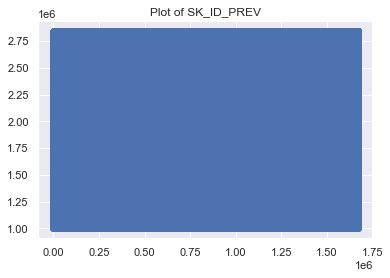

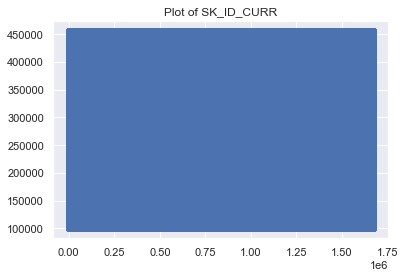

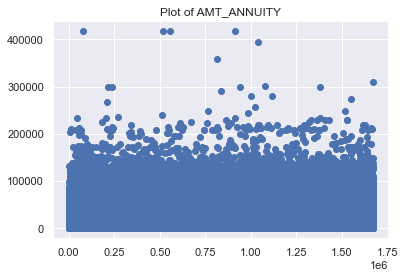

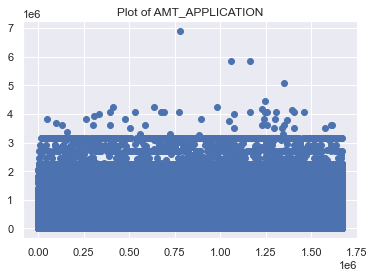

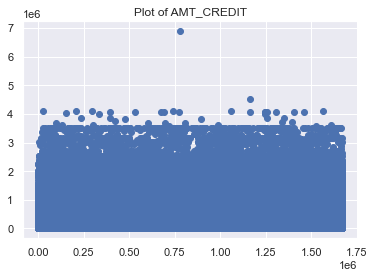

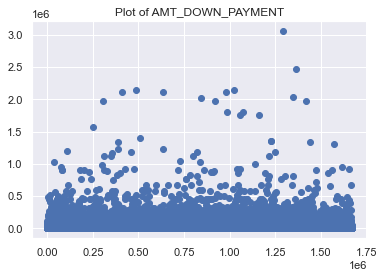

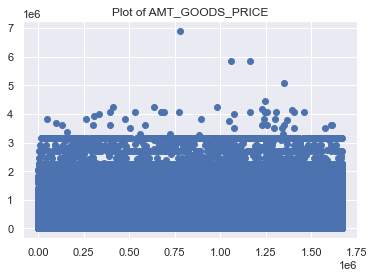

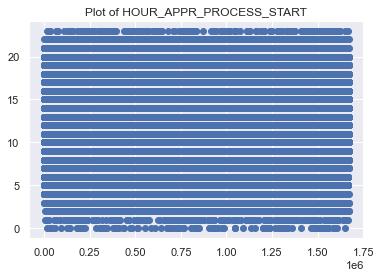

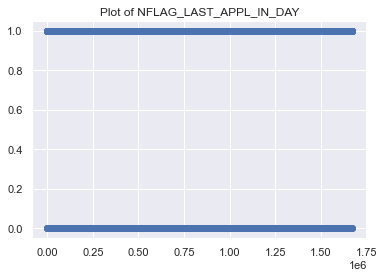

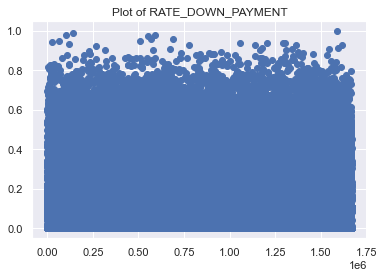

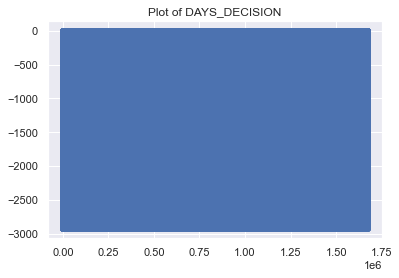

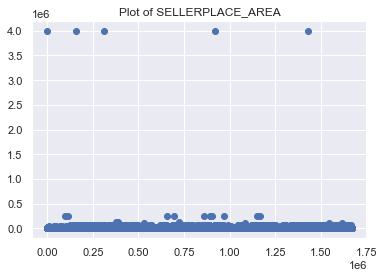

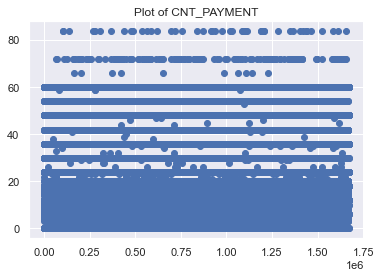

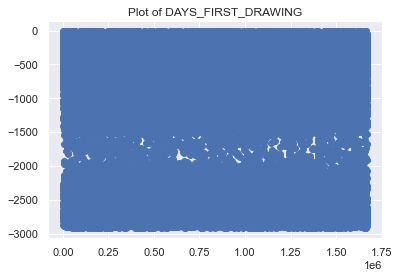

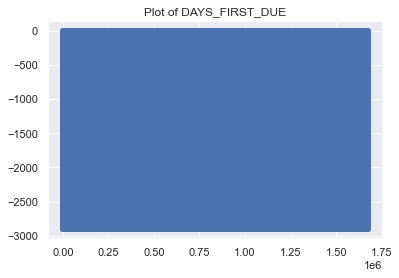

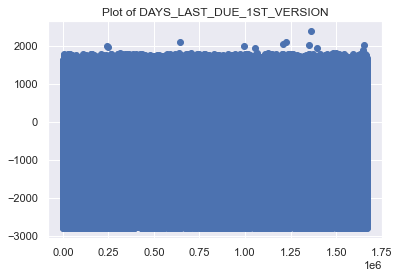

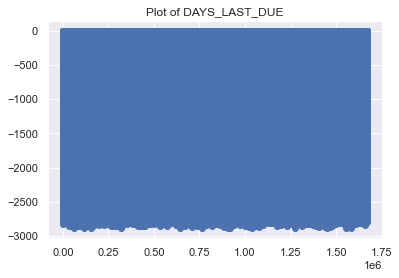

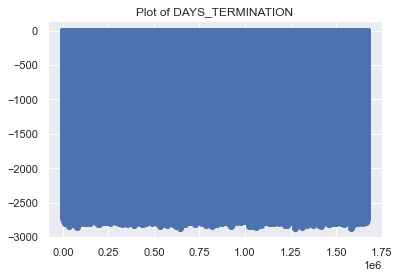

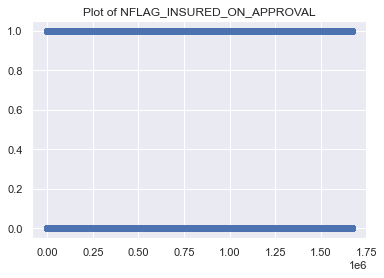

In [108]:
#Scatter plot for numerical data
for column in pre_numeric:
    title = "Plot of "+column
    plt.scatter(pre.index, pre[column])
    plt.title(title)
    plt.show()

Some columns that have outliers :-
    - AMT_CREDIT
    - AMT_GOODS_PRICE
    - AMT_DOWN_PAYMENT
    
These columns ahve outliers may be due to the fact that bank has allotted someone a big chunk (may be any big business man). Above 3 columns are correlated.    

### Univariate analysis by plotting distance plot and histogram

Plot of SK_ID_PREV


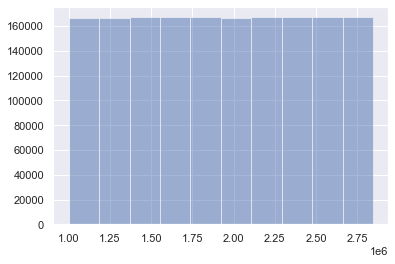

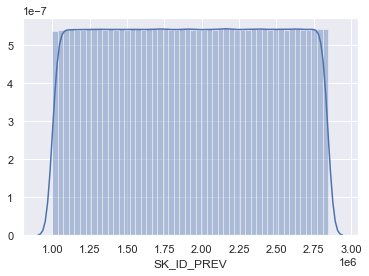

------------------------------------------------------------------------
Plot of SK_ID_CURR


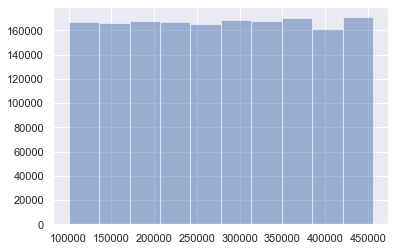

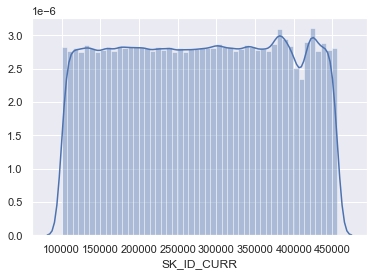

------------------------------------------------------------------------
Plot of AMT_ANNUITY


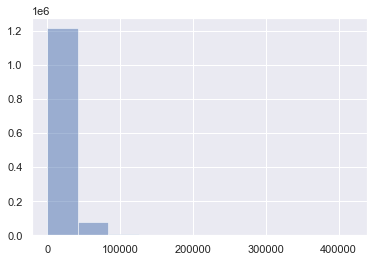

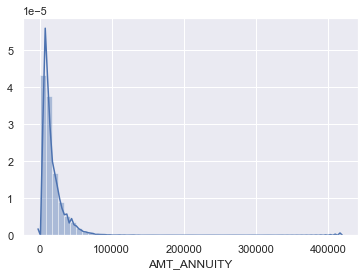

------------------------------------------------------------------------
Plot of AMT_APPLICATION


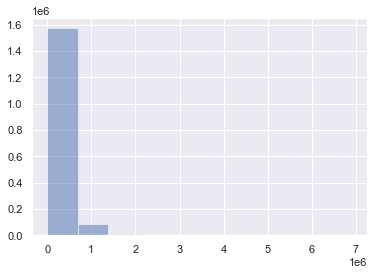

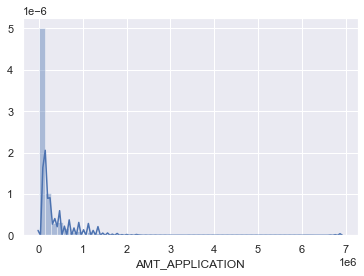

------------------------------------------------------------------------
Plot of AMT_CREDIT


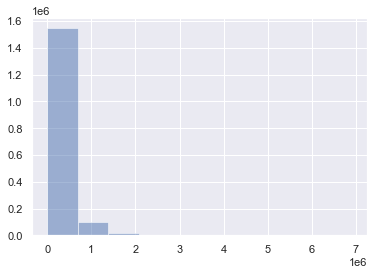

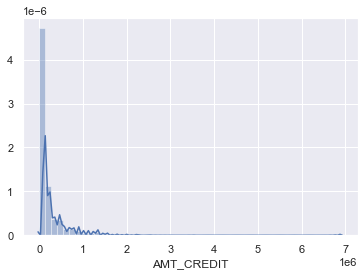

------------------------------------------------------------------------
Plot of AMT_DOWN_PAYMENT


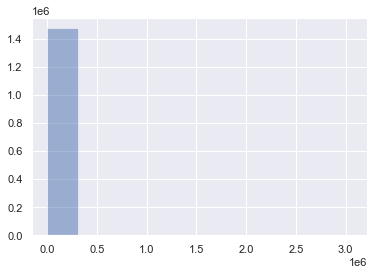

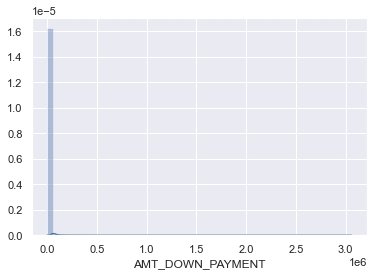

------------------------------------------------------------------------
Plot of AMT_GOODS_PRICE


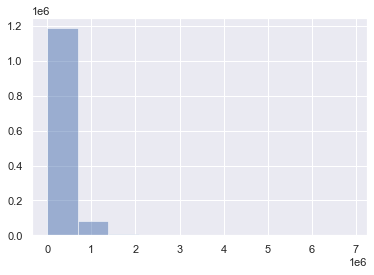

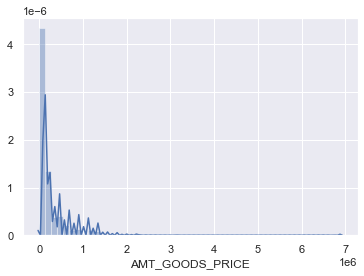

------------------------------------------------------------------------
Plot of HOUR_APPR_PROCESS_START


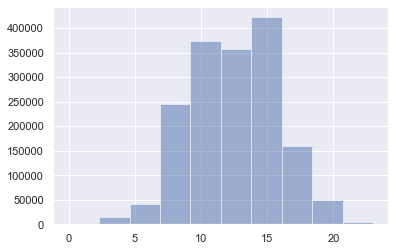

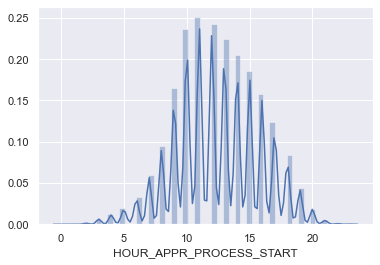

------------------------------------------------------------------------
Plot of NFLAG_LAST_APPL_IN_DAY


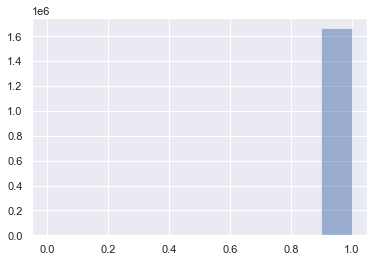

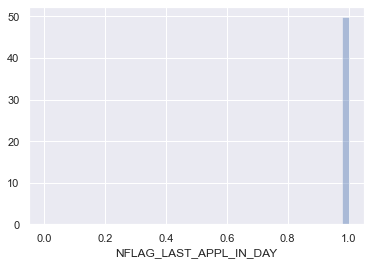

------------------------------------------------------------------------
Plot of RATE_DOWN_PAYMENT


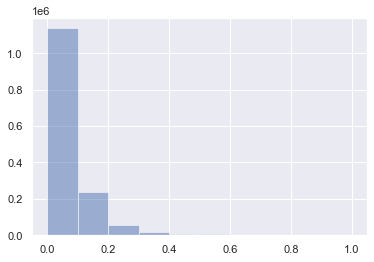

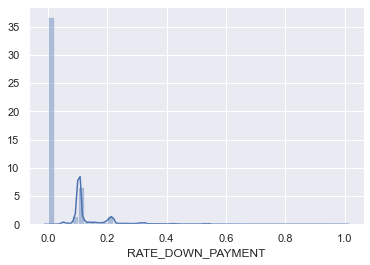

------------------------------------------------------------------------
Plot of DAYS_DECISION


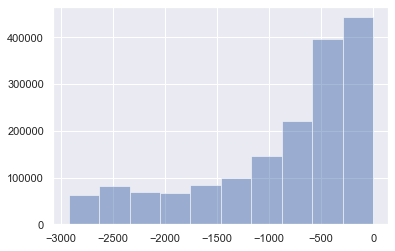

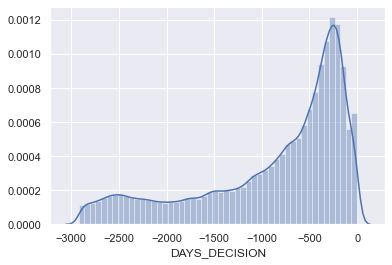

------------------------------------------------------------------------
Plot of SELLERPLACE_AREA


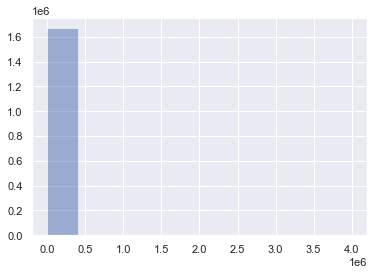

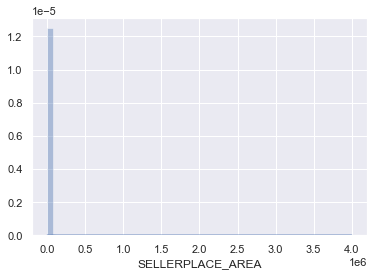

------------------------------------------------------------------------
Plot of CNT_PAYMENT


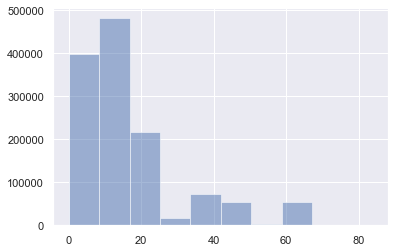

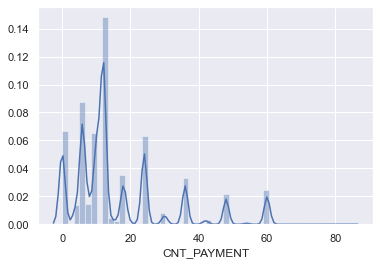

------------------------------------------------------------------------
Plot of DAYS_FIRST_DRAWING


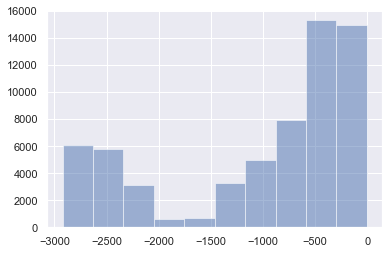

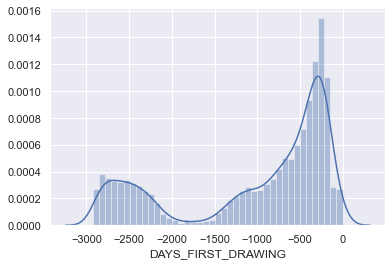

------------------------------------------------------------------------
Plot of DAYS_FIRST_DUE


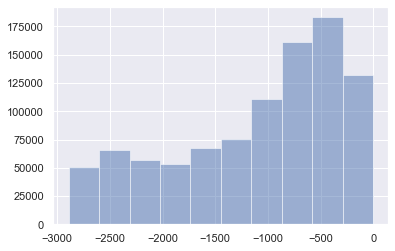

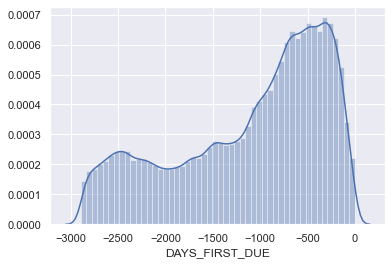

------------------------------------------------------------------------
Plot of DAYS_LAST_DUE_1ST_VERSION


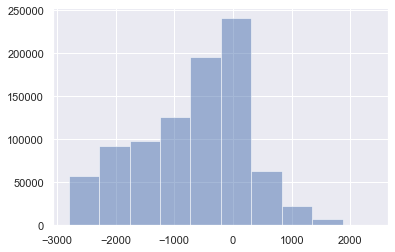

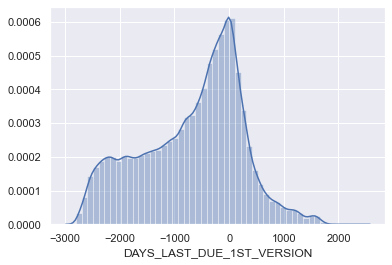

------------------------------------------------------------------------
Plot of DAYS_LAST_DUE


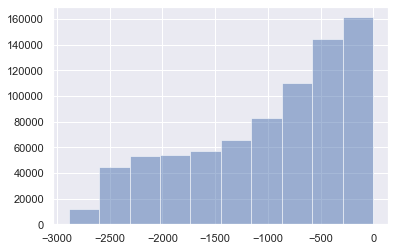

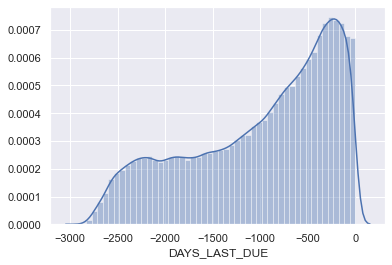

------------------------------------------------------------------------
Plot of DAYS_TERMINATION


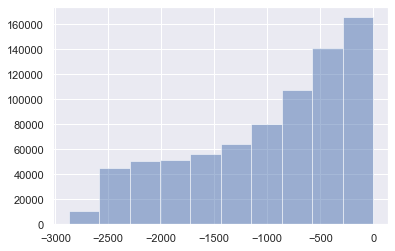

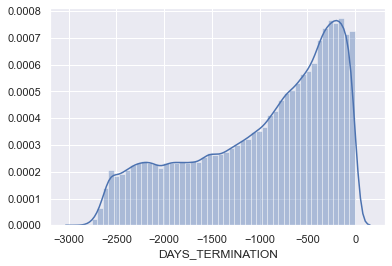

------------------------------------------------------------------------
Plot of NFLAG_INSURED_ON_APPROVAL


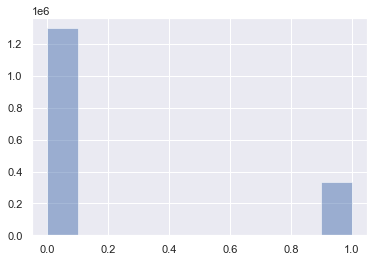

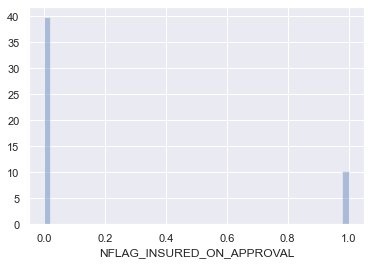

------------------------------------------------------------------------


In [109]:
for column in pre_numeric:
    title = "Plot of "+column
    print(title)
    plt.hist(pre[column], alpha=0.5, label='0')
    plt.show()
    
    sns.distplot(pre[column].dropna(), label='0')
    plt.show()
    
    print("------------------------------------------------------------------------")

## Univariate analysis of categorical columns of previous application


In [110]:
#Extracting categorical data of previous application dataset
pre_categorical = pre.select_dtypes(include=['object']).columns


#### Here, we will use 3 different plots for analysis : -
- Pie plot : For plotting the all the values present in a column in terms of percentage. So, the sum of those data types in percentage terms will be 100. 
- Countplot : Here, we will plot the count of the different categories with respect to NAME_CONTRACT_STATUS


In [111]:
def plotter(pre, column):
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    pre[column].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'NAME_CONTRACT_STATUS', data = pre, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    plt.tight_layout() # Or equivalently, we can use "fig.tight_layout()" also
    plt.show()

Plotting  NAME_CONTRACT_TYPE


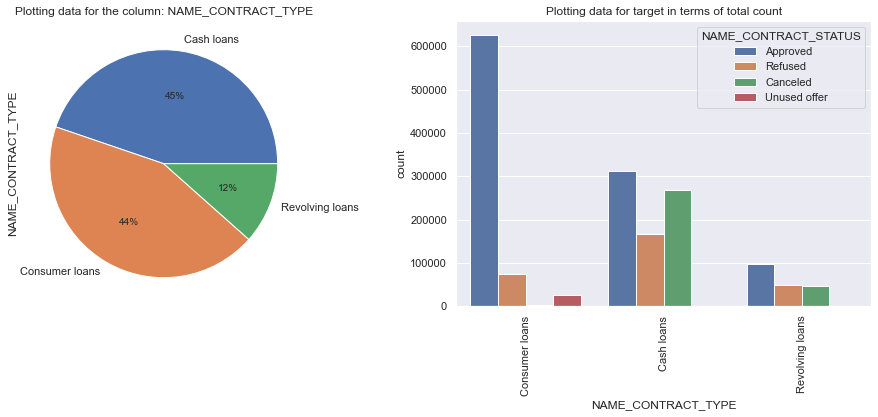

------------------------***************************************--------------------------
Plotting  WEEKDAY_APPR_PROCESS_START


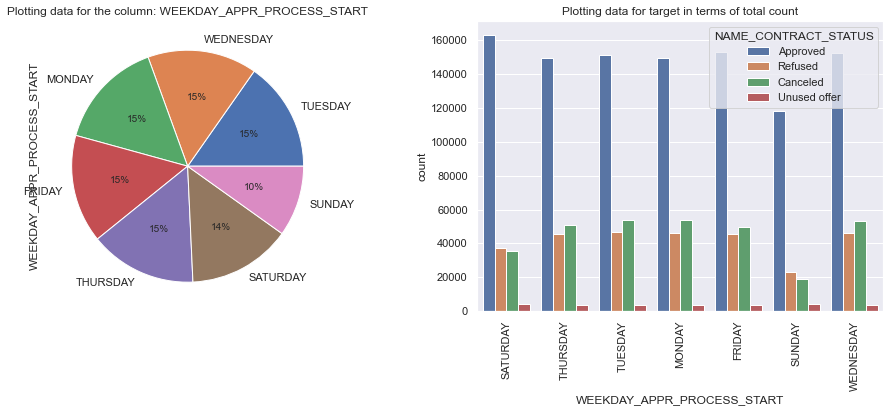

------------------------***************************************--------------------------
Plotting  FLAG_LAST_APPL_PER_CONTRACT


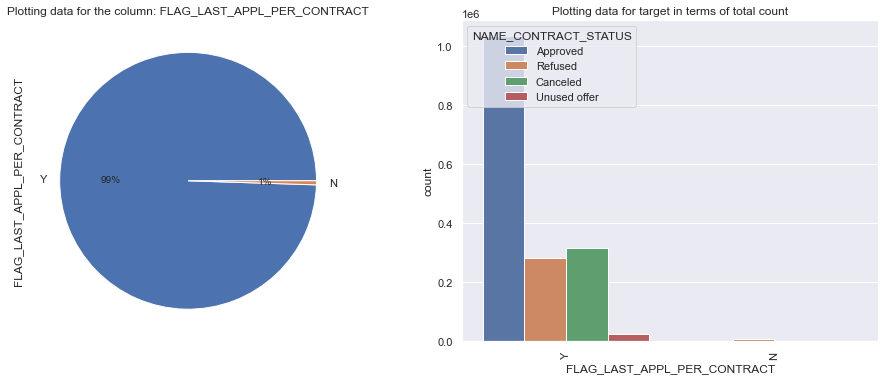

------------------------***************************************--------------------------
Plotting  NAME_CASH_LOAN_PURPOSE


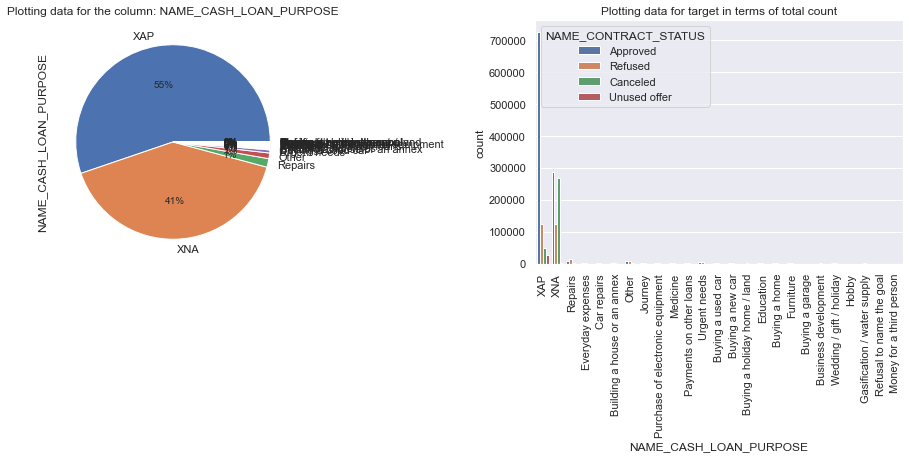

------------------------***************************************--------------------------
Plotting  NAME_CONTRACT_STATUS


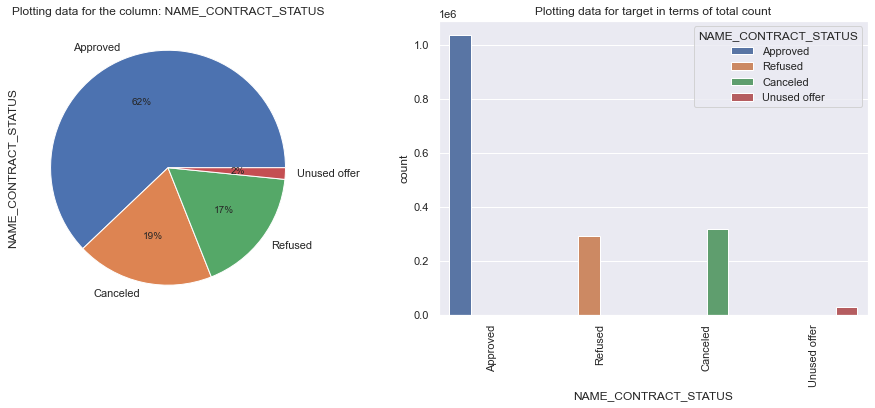

------------------------***************************************--------------------------
Plotting  NAME_PAYMENT_TYPE


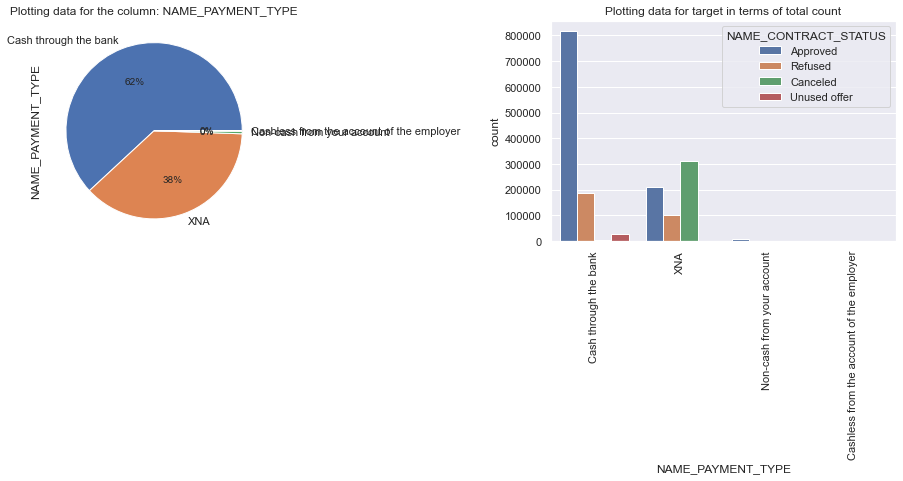

------------------------***************************************--------------------------
Plotting  CODE_REJECT_REASON


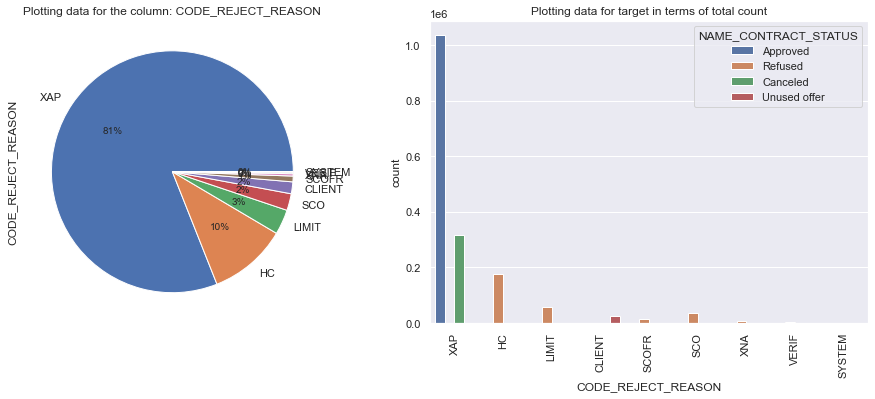

------------------------***************************************--------------------------
Plotting  NAME_TYPE_SUITE


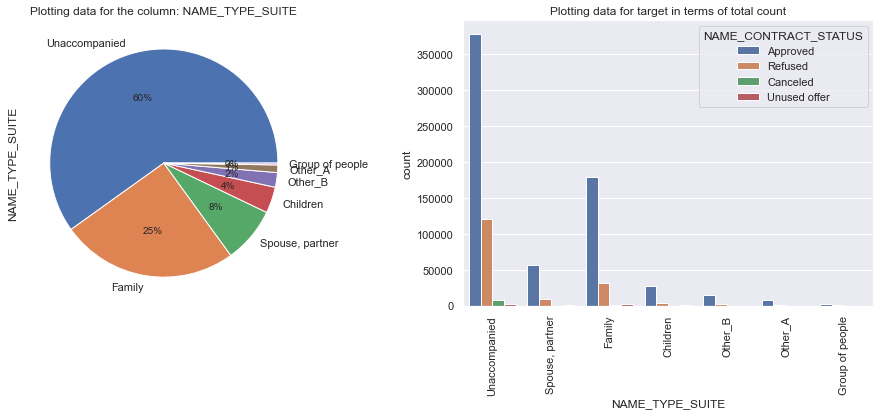

------------------------***************************************--------------------------
Plotting  NAME_CLIENT_TYPE


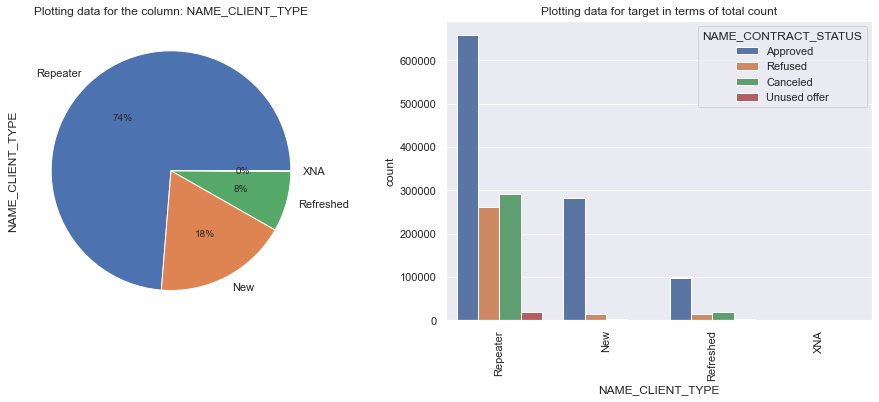

------------------------***************************************--------------------------
Plotting  NAME_GOODS_CATEGORY


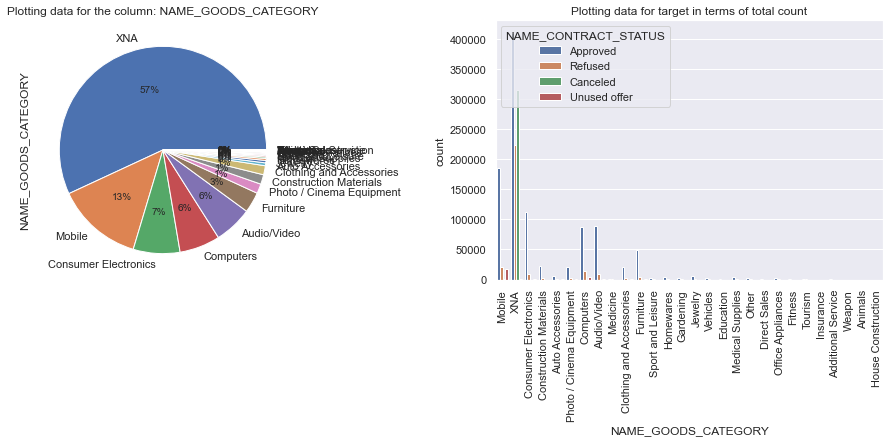

------------------------***************************************--------------------------
Plotting  NAME_PORTFOLIO


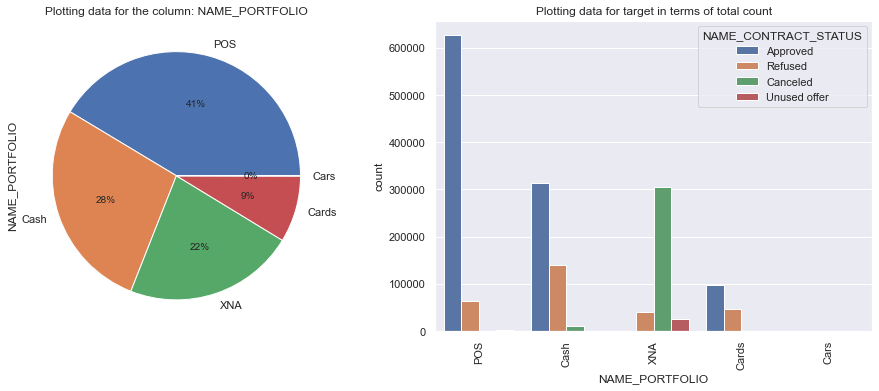

------------------------***************************************--------------------------
Plotting  NAME_PRODUCT_TYPE


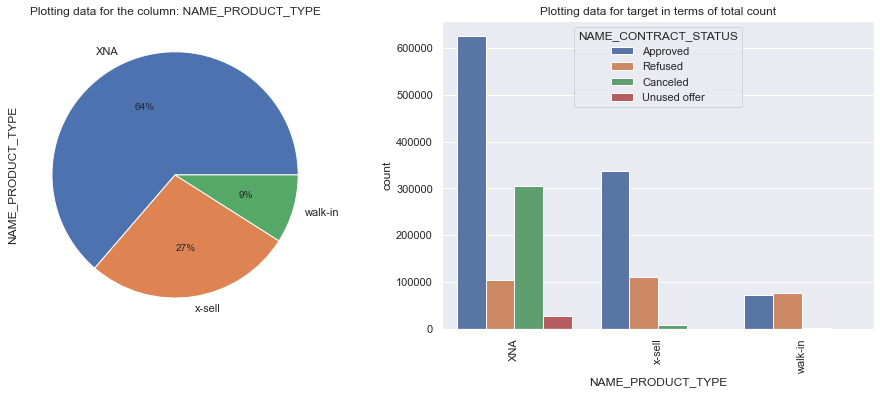

------------------------***************************************--------------------------
Plotting  CHANNEL_TYPE


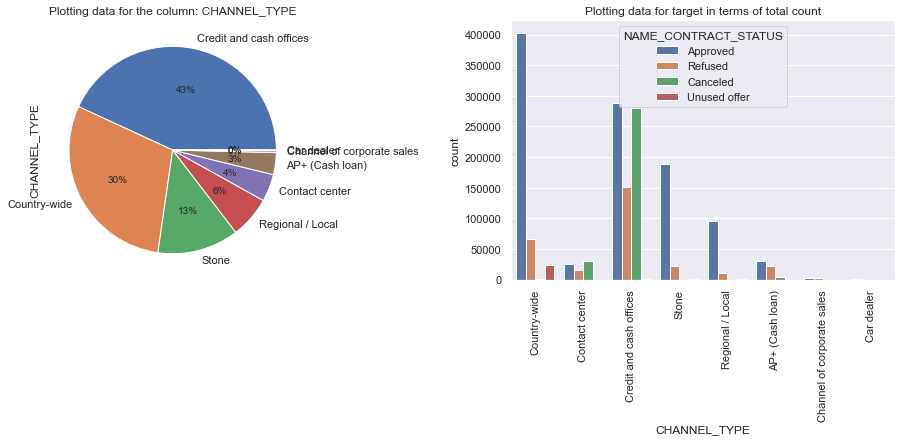

------------------------***************************************--------------------------
Plotting  NAME_SELLER_INDUSTRY


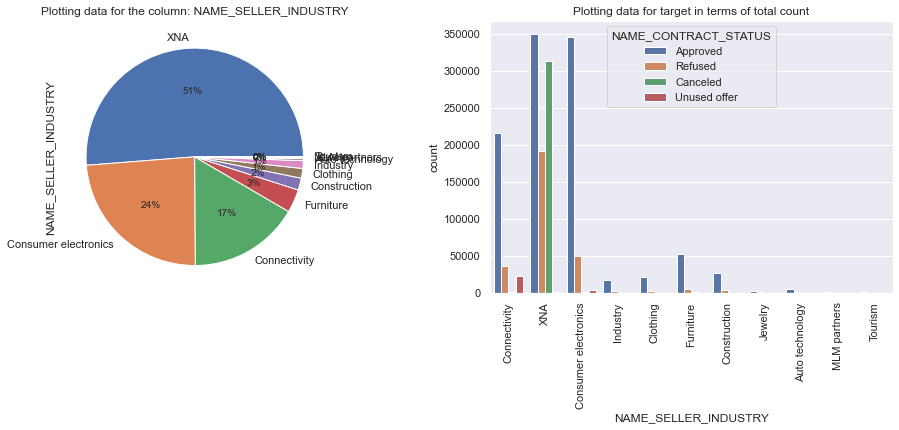

------------------------***************************************--------------------------
Plotting  NAME_YIELD_GROUP


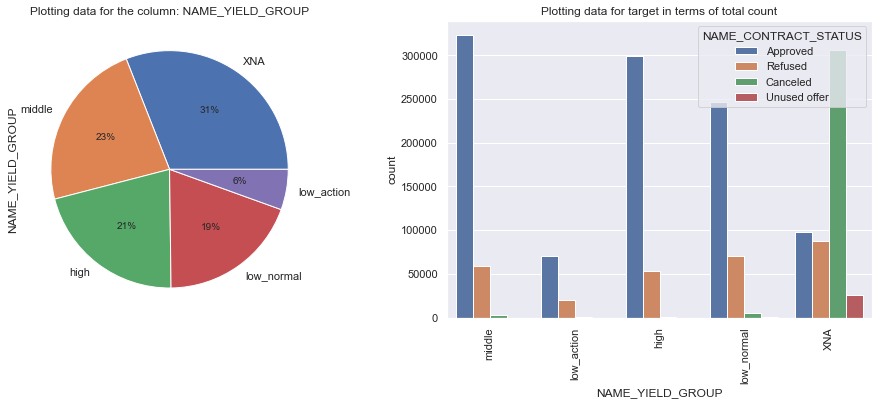

------------------------***************************************--------------------------
Plotting  PRODUCT_COMBINATION


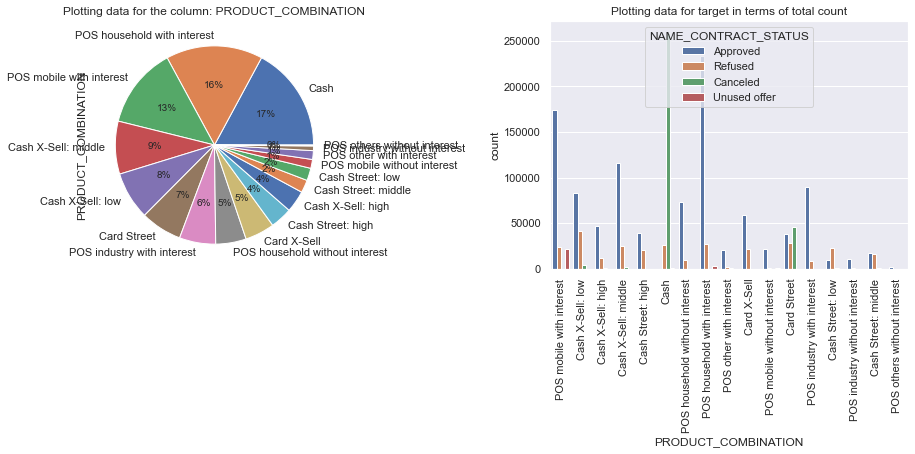

------------------------***************************************--------------------------


In [112]:
for column in pre_categorical:
    print("Plotting ", column)
    plotter(pre, column)
    print('------------------------***************************************--------------------------')

#### The variables which seem to be important are :-
- NAME_CONTRACT_TYPE : Consumer Loans are mostly approved
- NAME_TYPE_SUITE : Loans approved mostly for the persons who are unaccompanied
- NAME_CLIENT_TYPE : Persons who are taking loans repeatedly have higher chances of approval
- NAME_PORTFOLIO : Cash loans are rejected more than POS loans

    

### There are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times

In [113]:
pre.SK_ID_CURR.value_counts().head(20)

187868    77
265681    73
173680    72
242412    68
206783    67
156367    66
389950    64
382179    64
198355    63
345161    62
446486    62
238250    61
280586    61
133023    60
206862    60
227585    60
242431    59
401563    59
110899    58
235163    58
Name: SK_ID_CURR, dtype: int64

In [114]:
print(len(pre.SK_ID_CURR.value_counts()))

338857


In [115]:
print(len(pre.SK_ID_PREV.value_counts()))

1669868


As you can see above, the shape of previous application is (1670214, 37) and length of SK_ID_PREV is also (1670214), but length of SK_ID_CURR is (338857), which is less than length of SK_ID_PREV, which tells us that there are duplicate number of SK_ID_PREV.

## Let's merge dataframe: treat and previous application based on SK_ID_CURR


After merging both the dataframes, the new dataframe will also have duplicate number of SK_ID_PREV. This should not be a problem, as we are trying to figure out if any pattern is present by including the cases if a lender has previously taken loan more than once. 

In [116]:
#We are defining "pre_treat" as a merged datset
pre_treat = treat.merge(pre, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [117]:
#columns of merged dataset
pre_treat.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCI

In [118]:
pre.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)


### Segregating the dataset on Target=0 and Target=1 due to data imbalance

In [119]:
treat_0 = treat.loc[treat['TARGET'] == 0]
treat_1 = treat.loc[treat['TARGET'] == 1]

In [120]:
pre_treat_0 = pre_treat.loc[pre_treat['TARGET'] == 0]
pre_treat_1 = pre_treat.loc[pre_treat['TARGET'] == 1]

## Bivariate Analysis 

Here, we will plot following plots for bivariate analysis :-
- countplot for target = 0 and 1 for normal application dataset
- countplot for target = 0 and 1 for merged dataset

In [121]:
def plotter(column, hue):
    
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    treat[column].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((treat_0[column].value_counts())/len(treat_0))
    df['1']= ((treat_1[column].value_counts())/len(treat_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of percentage')


    ax3 = plt.subplot(223)
    sns.countplot(x=column, hue=hue, data=pre_treat_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of total count')

    ax4 = plt.subplot(224)
    sns.countplot(x=column, hue=hue, data=pre_treat_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of total count')



    fig.tight_layout()
    plt.show()

Here, plotting only for some columns, as plotting in loop for all columns will be pretty heavy for this size of dataset. 

### Plotting NAME_EDUCATION_TYPE & NAME_CONTRACT_STATUS

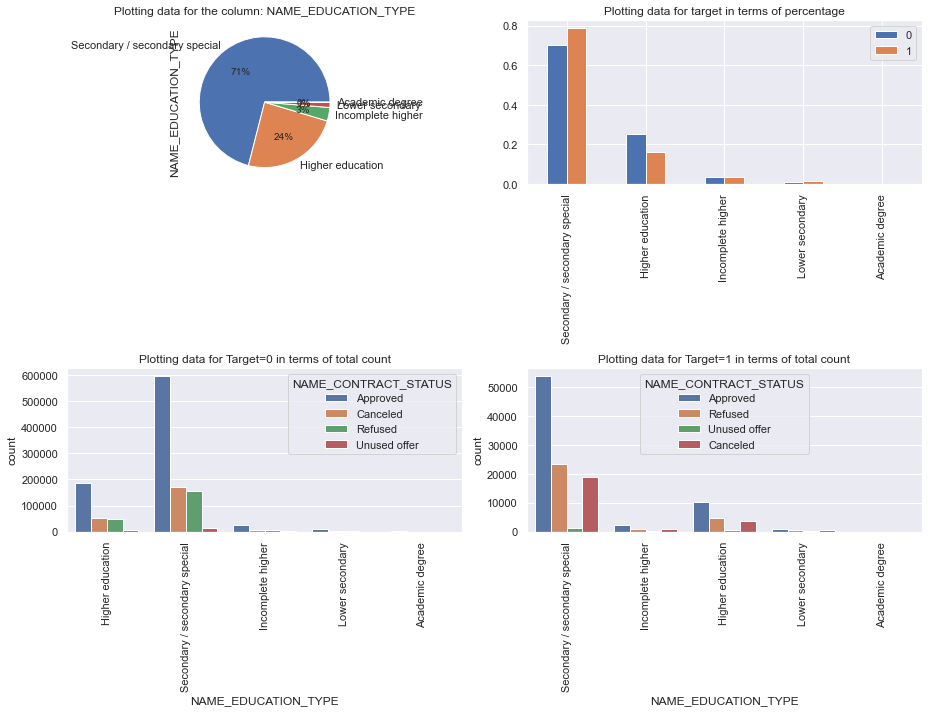

In [122]:
plotter('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')    

#### Insight : People tend to make more loan for 'Secondary special' and their loan is also approved. 

### Plotting NAME_FAMILY_STATUS & NAME_CONTRACT_STATUS

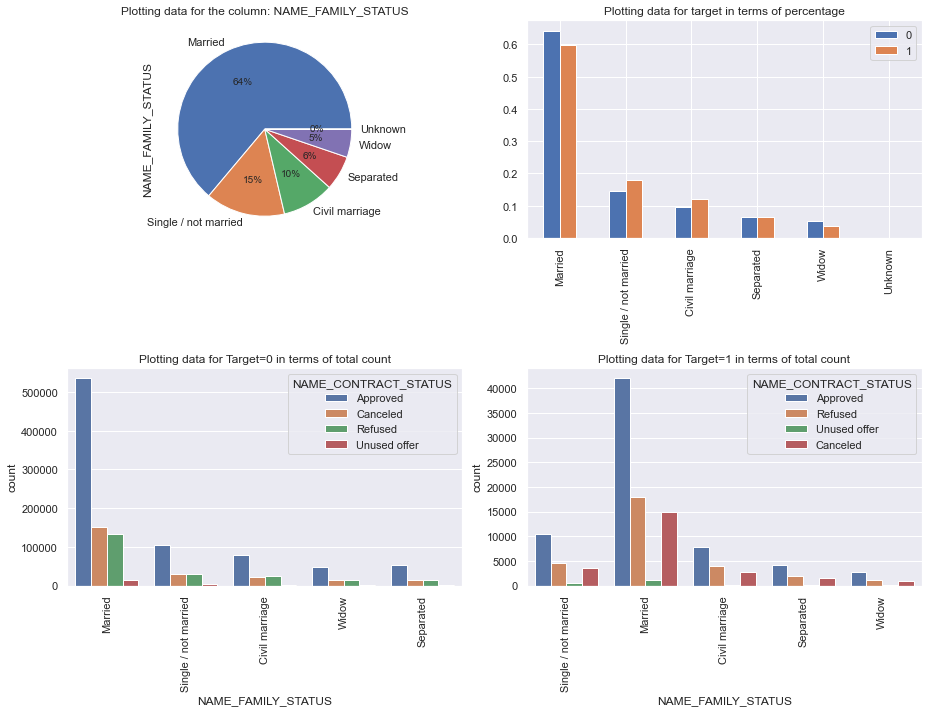

In [123]:
plotter('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')    

#### Insight : We can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: Married. Married people tends to pay loan on time than Singles.

### Plotting NAME_HOUSING_TYPE & NAME_CONTRACT_STATUS

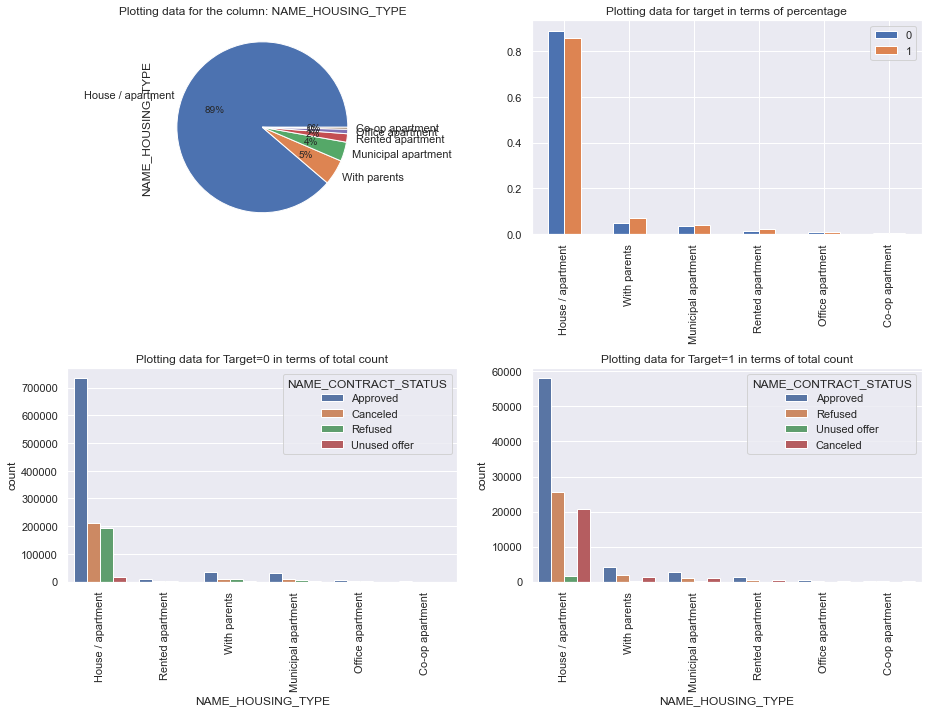

In [124]:
plotter('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')   

#### Insight : We can see, there is a clear difference for the categories for "Approved, Refused, Unused and Cancelled" for the category: House/apartment. People having house are first to get loan approved.

### Plotting ORGANIZATION_TYPE & NAME_CONTRACT_STATUS

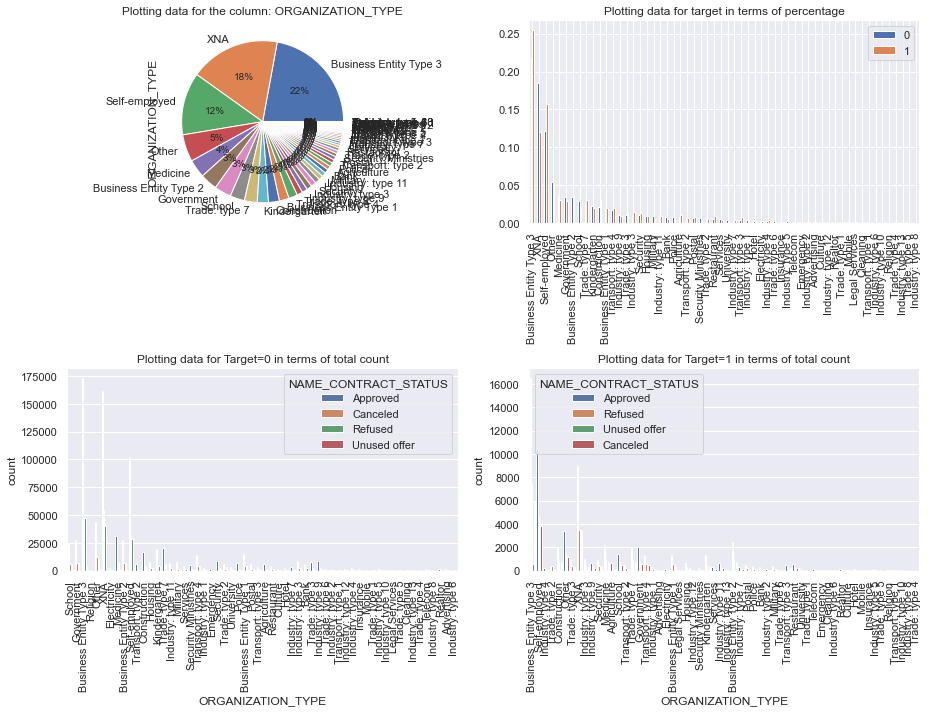

In [125]:
plotter('ORGANIZATION_TYPE','NAME_CONTRACT_STATUS')   

Since this sub-plot for ORGANIZATION_TYPE is too messy, so for clear graphics we'll plot these sub-plots individually

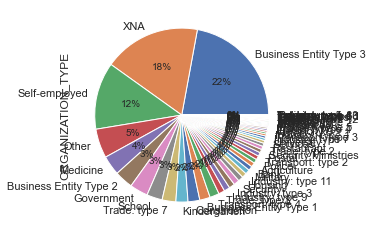

In [126]:
col = 'ORGANIZATION_TYPE'
treat[col].value_counts().plot.pie(autopct = "%1.0f%%")
plt.show()

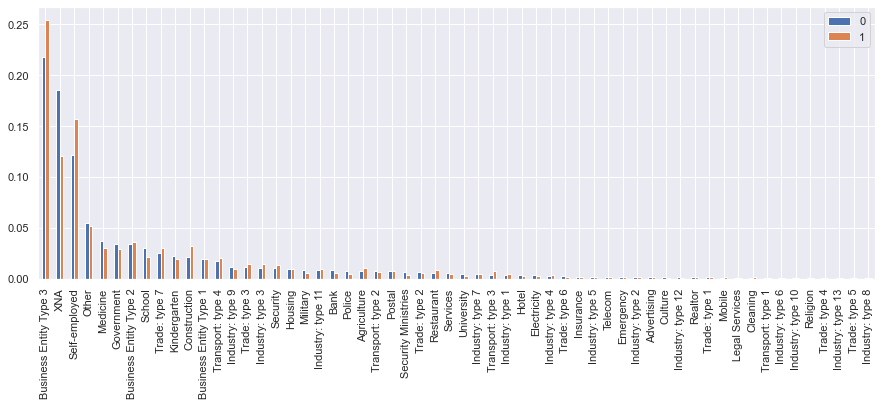

In [127]:
col = 'ORGANIZATION_TYPE'
df = pd.DataFrame()
df['0']= ((treat_0[col].value_counts())/len(treat_0))
df['1']= ((treat_1[col].value_counts())/len(treat_1))
sns.set(rc={'figure.figsize':(15,5)})
df.plot.bar()
plt.show()

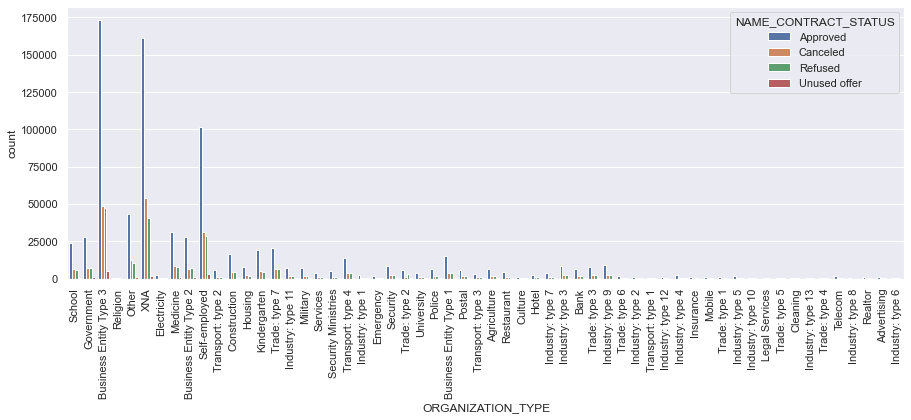

In [130]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=pre_treat_0)
plt.xticks(rotation=90)
plt.show()

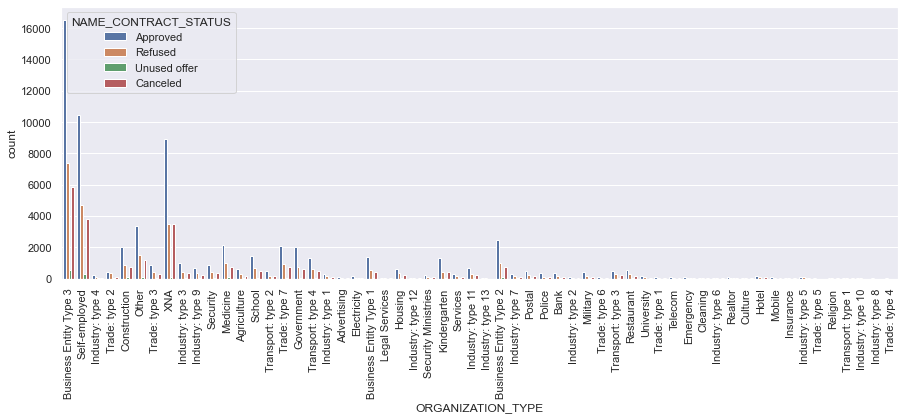

In [131]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=pre_treat_1)
plt.xticks(rotation=90)
plt.show()

#### Insight : This column seems to be most important. Bussiness Entity Type 3 and Self-employed tends to be the maxiumum defaulter. The univariate analysis of this dataset was more fruitful than bivariate analysis. 

### Plotting OCCUPATION_TYPE & NAME_CONTRACT_STATUS

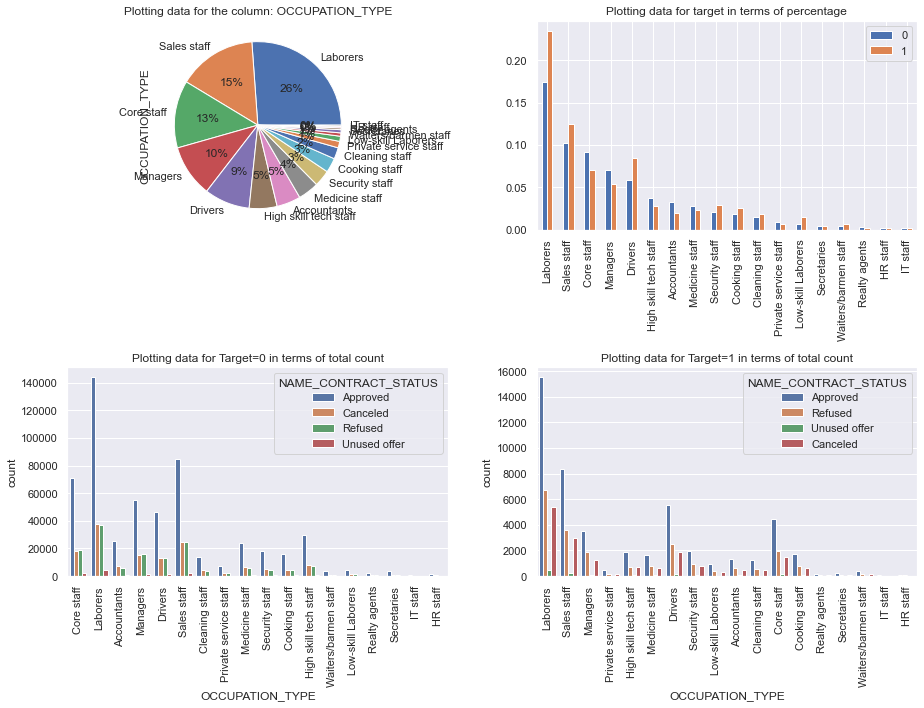

In [132]:
plotter('OCCUPATION_TYPE','NAME_CONTRACT_STATUS')   

#### Insight : This column provides a different picture. Laborers are the one who got the most loans approved. But, at the same time, Laborers are the one who default most. Since, OCCUPATION_TYPE column's mode is 'Laborers' that's why this skewed picture is coming up.


### Plotting countplot of NAME_CONTRACT_STATUS in merged dataset

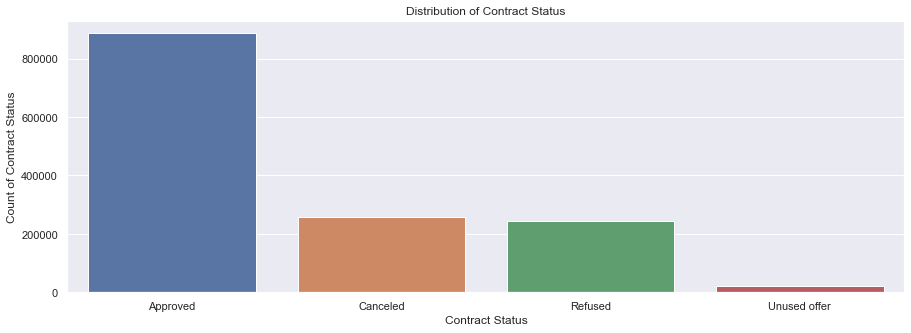

In [133]:
sns.countplot(pre_treat.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

### Dividing merged data set into 4 categories



In [134]:
approved=pre_treat[pre_treat.NAME_CONTRACT_STATUS=='Approved']
refused=pre_treat[pre_treat.NAME_CONTRACT_STATUS=='Refused']
canceled=pre_treat[pre_treat.NAME_CONTRACT_STATUS=='Canceled']
unused=pre_treat[pre_treat.NAME_CONTRACT_STATUS=='Unused Offer']

### Plotting NAME_CONTRACT_STATUS with TARGET variable

In [135]:
def plotter(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

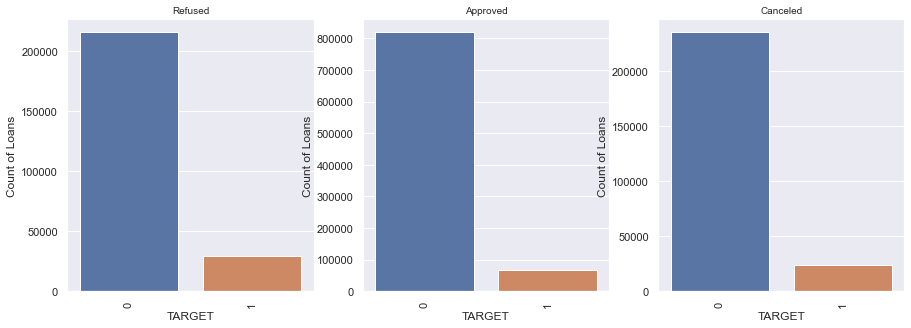

In [136]:
plotter('TARGET')


In [137]:
refused.TARGET.value_counts(normalize=True)

0    0.88005
1    0.11995
Name: TARGET, dtype: float64

In [138]:
approved.TARGET.value_counts(normalize=True)


0    0.924113
1    0.075887
Name: TARGET, dtype: float64

In [139]:
canceled.TARGET.value_counts(normalize=True)


0    0.90838
1    0.09162
Name: TARGET, dtype: float64

### Insight : Loans which were previously refused or cancelled have a higher default rate



### Plotting AMT_APPLICATION & AMT_INCOME_TOTAL with refused and approved loans

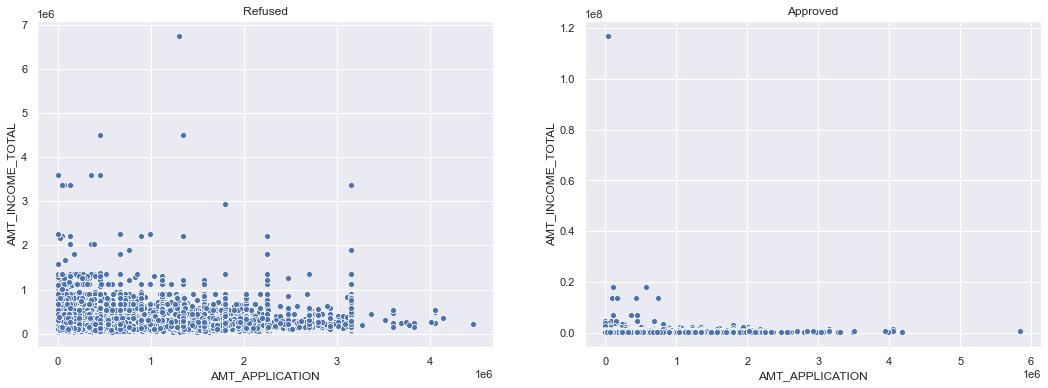

In [142]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=refused)
plt.title('Refused')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=approved)
plt.title('Approved')
plt.show()

### Insight : Loan rejection rate was much lower if the income was higher than 300k.

## Correlation Matrix to see how variables are correlated with Target variable in merged dataset

In [143]:
cat = pre_treat.select_dtypes("object").columns
for i in cat:
    pre_treat["_"+i+"_"] = pre_treat[i].astype('category').cat.codes

In [144]:
pre_treat.corrwith(pre_treat["TARGET"]).sort_values(ascending = False)

TARGET                            1.000000
DAYS_FIRST_DRAWING                0.095723
REGION_RATING_CLIENT_W_CITY       0.059702
DAYS_LAST_PHONE_CHANGE            0.059701
REGION_RATING_CLIENT              0.056937
_NAME_CONTRACT_STATUS_            0.052948
_CODE_GENDER_                     0.052789
REG_CITY_NOT_WORK_CITY            0.049289
FLAG_EMP_PHONE                    0.048741
_NAME_EDUCATION_TYPE_             0.047783
_NAME_INCOME_TYPE_                0.047211
FLAG_DOCUMENT_3                   0.041948
_OCCUPATION_TYPE_                 0.041780
REG_CITY_NOT_LIVE_CITY            0.040604
DAYS_DECISION                     0.039854
_NAME_HOUSING_TYPE_               0.034507
LIVE_CITY_NOT_WORK_CITY           0.032730
DEF_30_CNT_SOCIAL_CIRCLE          0.031863
CNT_PAYMENT                       0.030480
_NAME_GOODS_CATEGORY_             0.030165
DAYS_LAST_DUE_1ST_VERSION         0.029501
DAYS_FIRST_DUE                    0.029025
DEF_60_CNT_SOCIAL_CIRCLE          0.028520
FLAG_WORK_P

### Top 10 correlation variables with TARGET :-
 - DAYS_FIRST_DRAWING               
 - REGION_RATING_CLIENT_W_CITY       
 - DAYS_LAST_PHONE_CHANGE            
 - REGION_RATING_CLIENT              
 - _NAME_CONTRACT_STATUS_            
 - _CODE_GENDER_                     
 - REG_CITY_NOT_WORK_CITY            
 - FLAG_EMP_PHONE                    
 - _NAME_EDUCATION_TYPE_             
 - _NAME_INCOME_TYPE_                

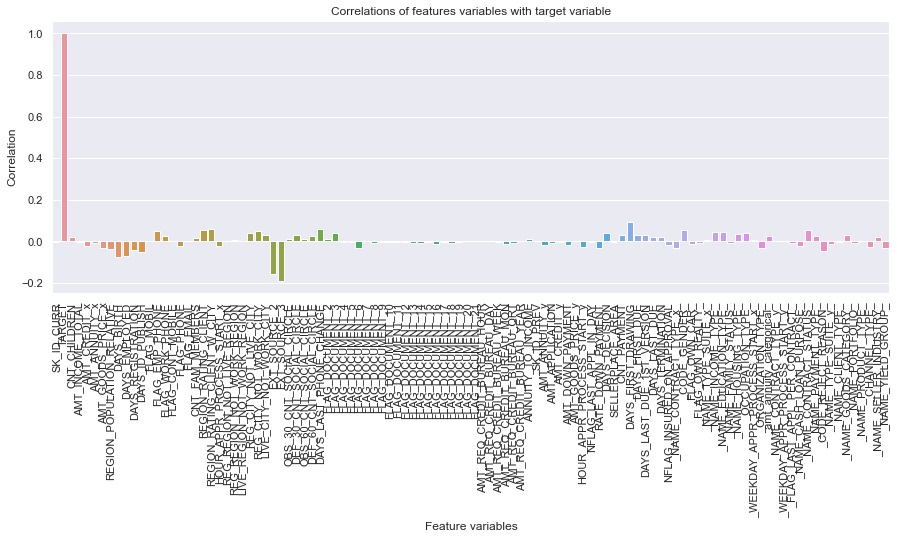

In [145]:
correlations = pre_treat.corr()['TARGET'][:-1]
sns.barplot(x = correlations.index, y = correlations.values)
plt.title('Correlations of features variables with target variable')
plt.ylabel('Correlation')
plt.xlabel('Feature variables')
plt.xticks(rotation = 90)
plt.show()

# THANKS